# Business Objective

The objective is to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Goal:

The company wants to know:

* Which variables are significant in predicting the price of a house, and

* How well those variables describe the price of a house.

In [67]:
# Importing the libararies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import datetime
import warnings
warnings.filterwarnings('ignore')

In [68]:
df = pd.read_csv("train.csv")

In [69]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


There are many categorical features which have NA as option to which code is detecting as missing value. Therefore, changing the option value.
Also, changing the encoded carater value to its actual option to understand better.

In [70]:
df['MSSubClass'] = df['MSSubClass'].replace({20:'1-STORY 1946 & NEWER ALL STYLES',30:"1-STORY 1945 & OLDER",40:"1-STORY W/FINISHED ATTIC ALL AGES",45:"1-1/2 STORY - UNFINISHED ALL AGES",50:"1-1/2 STORY FINISHED ALL AGES",60:"2-STORY 1946 & NEWER",
                                         70:"2-STORY 1945 & OLDER",75:'2-1/2 STORY ALL AGES',80:"SPLIT OR MULTI-LEVEL",85:'SPLIT FOYER',
                                         90:'DUPLEX - ALL STYLES AND AGES',120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
                                        150:"1-1/2 STORY PUD - ALL AGES",160:"2-STORY PUD - 1946 & NEWER",180:"PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",190:"2 FAMILY CONVERSION - ALL STYLES AND AGES"})

df['MSZoning'] = df['MSZoning'].replace({'A': 'Agriculture','C': 'Commercial','FV':'Floating Village Residential','I':'Industrial','RH':'Residential High Density','RL':'Residential Low Density'
                  ,'RP':'Residential Low Density Park','RM':'Residential Medium Density'})

df['Street'] = df['Street'].replace({'Grvl':'Gravel','Pave':'Paved'})
df['Alley'] = df['Alley'].replace({'Grvl':'Gravel','Pave':'Paved','NA': 'No alley', np.nan: 'No alley'})
df['SaleCondition'] = df['SaleCondition'].replace({'Normal': 'Normal Sale','Abnorml':'Abnormal Sale -  trade, foreclosure, short sale','AdjLand':'Adjoining Land Purchase','Alloca':'Allocation - two linked properties with separate deeds',
                                                    'Family':'Sale between family members','Partial':'Home was not completed when last assessed'})
df['SaleType'] = df['SaleType'].replace({'WD':'Warranty Deed - Conventional','CWD':'Warranty Deed - Cash','VWD':'Warranty Deed - VA Loan','New':'Home just constructed and sold',
                                            'COD':'Court Officer Deed/Estate','Con':'Contract 15% Down payment regular terms',
                                         'ConLw':'Contract Low Down payment and low interest','ConLI':'Contract Low Interest','ConLD':'Contract Low Down','Oth':'Other'})


df['GarageCond'] = df['GarageCond'].replace({'Ex': 'Excellent','Gd':'Good','TA':'Average','Fa':'Fair',
                                                    'NA':'No Garage',np.nan: 'No Garage' })
df['GarageQual'] = df['GarageQual'].replace({'Ex': 'Excellent','Gd':'Good','TA':'Average','Fa':'Fair',
                                                    'NA':'No Garage',np.nan: 'No Garage'})
df['PavedDrive'] = df['PavedDrive'].replace({'Y':'Paved','N':'Dirt/Gravel','P':'Partial Pavement'})
df['GarageFinish'] = df['GarageFinish'].replace({'Fin': 'Finished','RFn':'Rough Finished','Unf':'Unfinished','NA':'No Garage', np.nan: 'No Garage'})
df['GarageType'] = df['GarageType'].replace({'2Types': 'More than one type of garage','NA':'No Garage',np.nan: 'No Garage' })

df['Functional'] = df['Functional'].replace({'Typ': 'Typical Functionality','Min1':'Minor Deductions 1','Min2':'Minor Deductions 2',
                                                   'Mod':'Moderate Deductions',
                                                    'Maj1':'Major Deductions 1','Maj2':'Major Deductions 2','Sev':'Severely Damaged',"Sal":'Salvage only'})

df['Electrical'] = df['Electrical'].replace({'SBrkr': 'Standard Circuit Breakers','FuseA':'Fuse Box over 60 AMP and all Romex wiring','FuseF':'60 AMP Fuse Box and mostly Romex wiring',
                                                   'FuseP':'60 AMP Fuse Box and mostly knob & tube wiring'})
df['HeatingQC'] = df['HeatingQC'].replace({'Ex': 'Excellent','Gd':'Good','TA':'Average','Fa':'Fair','Po': 'Poor'})

df['Heating'] = df['Heating'].replace({'Floor': 'Floor Furnace','GasA':'Gas forced warm air furnace','GasW':'Gas hot water or steam heat',
                                            'Grav':'Gravity furnace', 'OthW':'Other','Wall':'Wall furnace'})
df['BsmtCond'] = df['BsmtCond'].replace({'Ex': 'Excellent','Gd':'Good','TA':'Average','Fa':'Fair','Po':'Poor',
                                                    'NA':'No Basement', np.nan: 'No Fireplace'})

df['BsmtFinType2'] = df['BsmtFinType2'].replace({'GLQ': 'Good','ALQ':'Average','BLQ':'Below Average',
                                            'Rec':'Average Rec Room', 'LwQ':'Low Quality','NA':'No Basement','Unf':'Unfinshed',  np.nan: 'No Basement'})
df['BsmtFinType1'] = df['BsmtFinType1'].replace({'GLQ': 'Good','ALQ':'Average','BLQ':'Below Average',
                                            'Rec':'Average Rec Room', 'LwQ':'Low Quality','NA':'No Basement','Unf':'Unfinshed', np.nan: 'No Basement'})
df['BsmtExposure'] = df['BsmtExposure'].replace({'No': 'No Exposure','Gd':'Good Exposure','Av':'Average Exposure','Mn':'Mimimum Exposure','NA': 'No Basement',  np.nan: 'No Basement'})
df['BsmtCond'] = df['BsmtCond'].replace({'Ex': 'Excellent','Gd':'Good','TA':'Average','Fa':'Fair','Po':'Poor',
                                                    'NA':'No Basement', np.nan: 'No Basement'})
df['BsmtQual'] = df['BsmtQual'].replace({'Ex': 'Excellent','Gd':'Good','TA':'Typical','Fa':'Fair','Po':'Poor',
                                                    'NA':'No Basement', np.nan: 'No Basement'})

df['Foundation'] = df['Foundation'].replace({'BrkTil': 'Brick & Tile','CBlock':'Cinder Block','PConc':'Poured Contrete'})
df['ExterCond'] = df['ExterCond'].replace({'Ex': 'Excellent','Gd':'Good','TA':'Typical','Fa':'Fair','Po':'Poor'})
df['ExterQual'] = df['ExterQual'].replace({'Ex': 'Excellent','Gd':'Good','TA':'Typical','Fa':'Fair','Po':'Poor'})
df['MasVnrType'] = df['MasVnrType'].replace({'BrkCmn': 'Brick Common','BrkFace':'Brick Face','CBlock':'Cinder Block',np.nan: 'None'})
df['OverallCond'] = df['OverallCond'].replace({1:'Very Poor',2:"Poor",3:"Fair",4:"Below Average",5:"Average",6:"Above Average",
                                         7:"Good",8:"Very Good",
                                         9:'Excellent',10:'Very Excellent'})
df['OverallQual'] = df['OverallQual'].replace({1:'Very Poor',2:"Poor",3:"Fair",4:"Below Average",5:"Average",6:"Above Average",
                                         7:"Good",8:"Very Good",
                                         9:'Excellent',10:'Very Excellent'})
df['HouseStyle'] = df['HouseStyle'].replace({'1Story': 'One story','1.5Fin':'One and one-half story','1.5Unf':'One and one-half story Unfinished',
                                                '2Story':'Two story','2.5Fin':'Two and one-half story','2.5Unf':'Two and one-half story Unfinished','SFoyer':'Split Foyer',
                                                'SLvl':'Split Level'})
df['BldgType'] = df['BldgType'].replace({'1Fam': 'Single-family Detached','2FmCon':'Two-family Conversion','TwnhsE':'Townhouse End Unit',
                                                'TwnhsI':'Townhouse Inside Unit'})
df['LandSlope'] = df['LandSlope'].replace({'Gtl': 'Gentle','Mod':'Moderate','Sev':'Severe'})
df['LotConfig'] = df['LotConfig'].replace({'Inside': 'Inside lot','Corner':'Corner lot','CulDSac':'Cul-de-sac',
                                                'FR2':'Frontage on 2 sidest', 'FR3':'Frontage on 3 sides'})
df['Utilities'] = df['Utilities'].replace({'AllPub': 'All public Utilities','NoSewr':'Electricity, Gas, and Water','NoSeWa':'Electricity and Gas Only',
                                                'ELO':'Electricity only'})
df['LandContour'] = df['LandContour'].replace({'Lvl': 'Near Flat/Level','Bnk':'Banked','HLS':'Hillside',
                                                'Low':'Depression'})
df['LotShape'] = df['LotShape'].replace({'IR1': 'Slightly irregular','IR2':'Moderately Irregular','IR3':'Irregular',
                                                'Reg':'Regular'})
df['PoolQC'] = df['PoolQC'].replace({'Ex': 'Excellent','Gd':'Good','TA':'Average','Fa':'Fair','NA': 'No Pool', np.nan: 'No Pool'})
df['Fence'] = df['Fence'].replace({'GdPrv': 'Good Privacy','MnPrv':'Minimum Privacy','GdWo':'Good Wood','MnWw':'Minimum Wood/Wire','NA': 'No Fence', np.nan: 'No Fence'})
df['MiscFeature'] = df['MiscFeature'].replace({'Elev': 'Elevator','Gar2':'2nd Garage','TenC':'Tennis Court','Othr':'Other','NA': 'None', np.nan: 'None'})
df['FireplaceQu'] = df['FireplaceQu'].replace({'Ex': 'Excellent','Gd':'Good','TA':'Average','Fa':'Fair','NA': 'No Fireplace', np.nan: 'No Fireplace', 'Po': 'Poor'})



In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

From above it is visible that there are still columns present with missing value

### Handling Missing Value

In [72]:
ls= []
for i in df.columns:
  if df[i].isnull().sum() != 0:
    ls.append(i)
    print(i, df[i].dtype)

LotFrontage float64
MasVnrArea float64
Electrical object
GarageYrBlt float64


#### Handling Missing value for numerical feagture

In [73]:
for i in ['LotFrontage','MasVnrArea','GarageYrBlt']:
  #print(df[i].median())
  df[i]= df[i].fillna(df[i].median())

#### Handling missing values for categorical feature

In [74]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

Checking for null values

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

Dropping Id column due to unquiue value

In [76]:
df = df.drop('Id', axis =1)

## EDA

#### Analysis on Categorical features

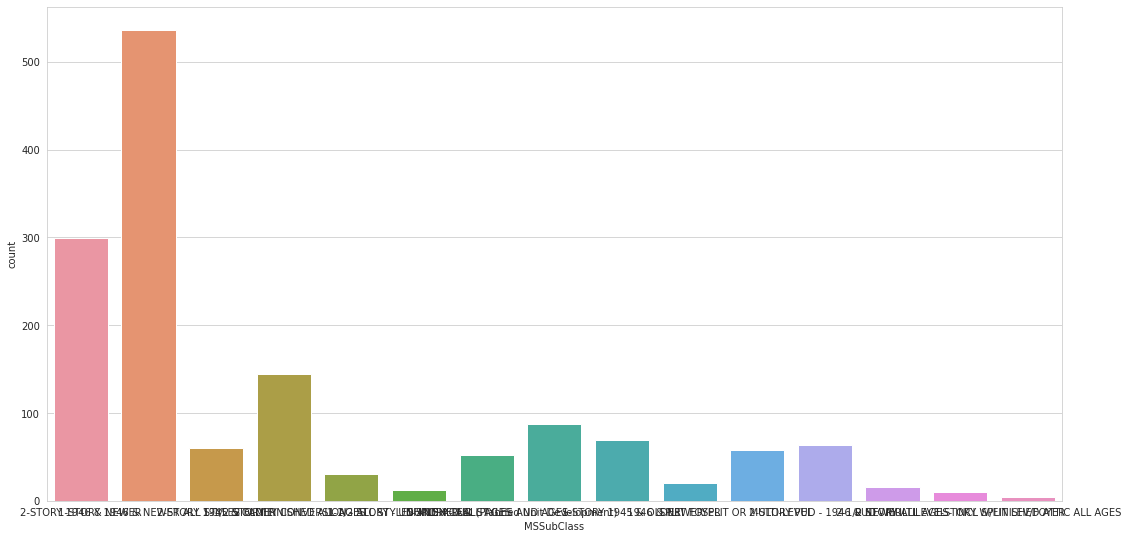

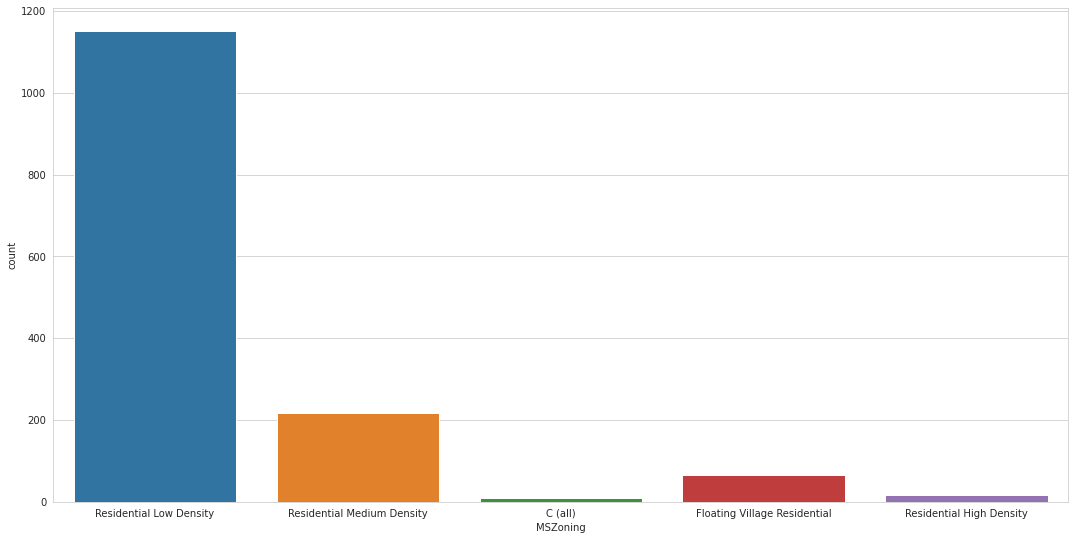

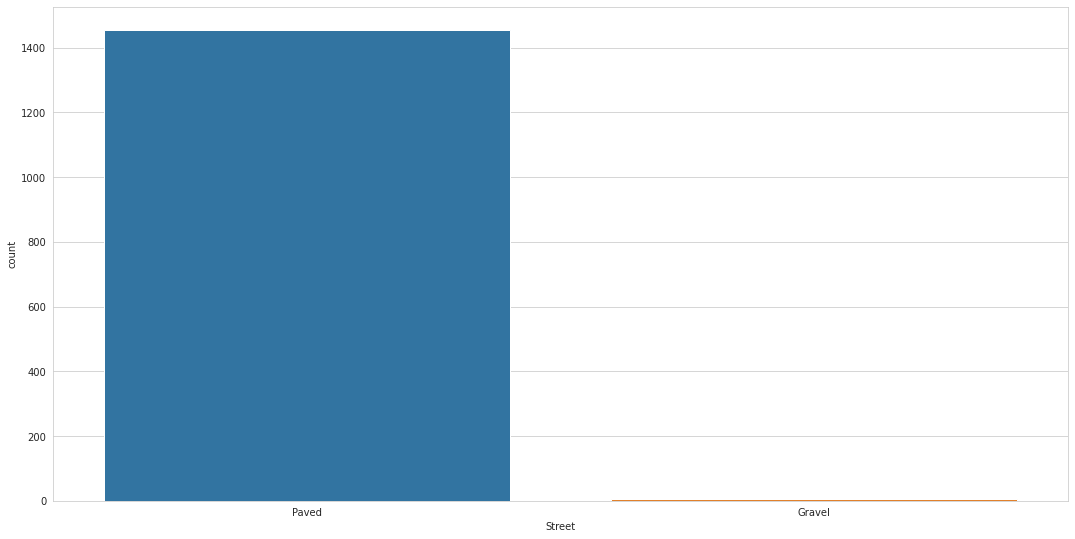

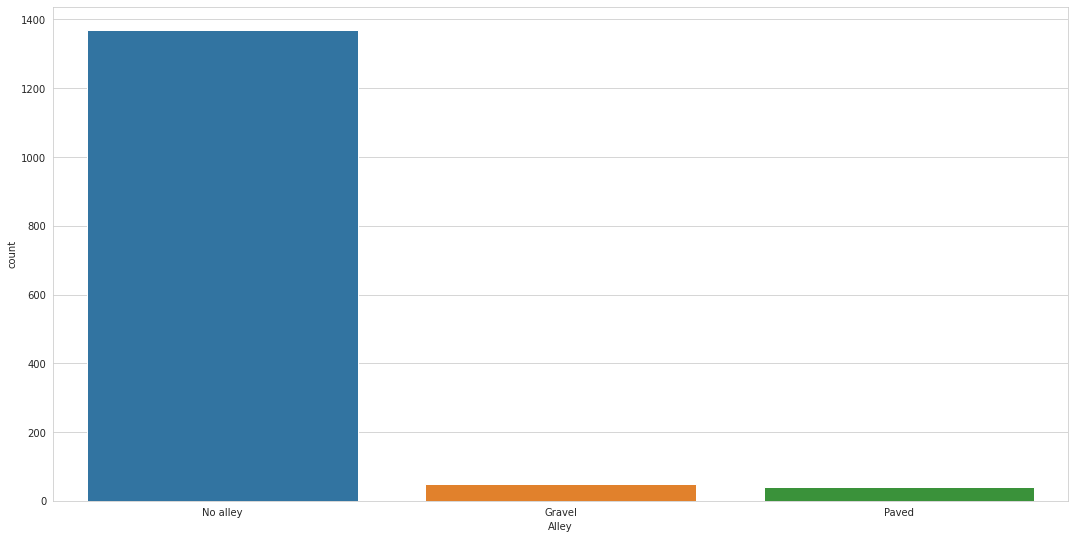

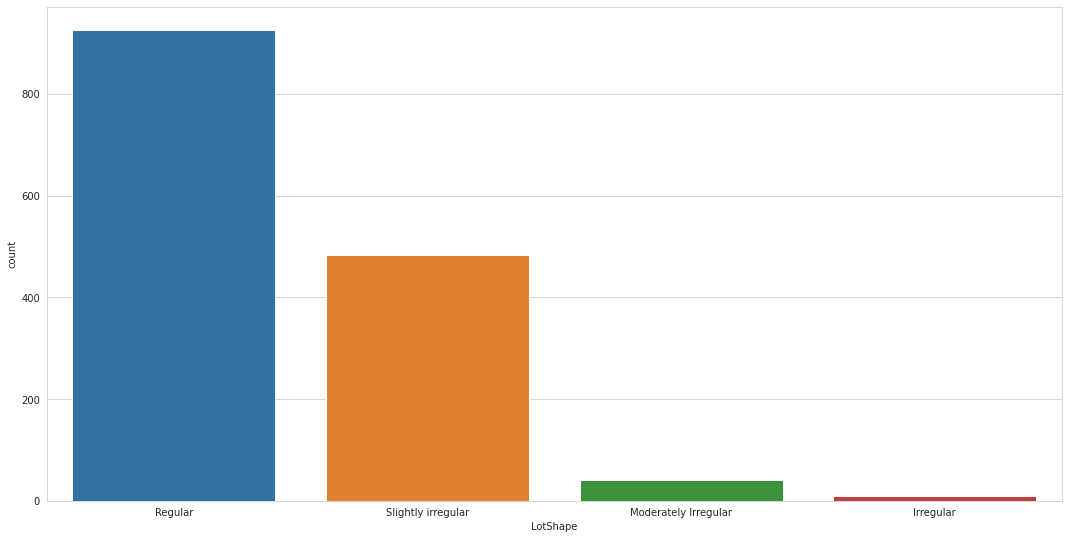

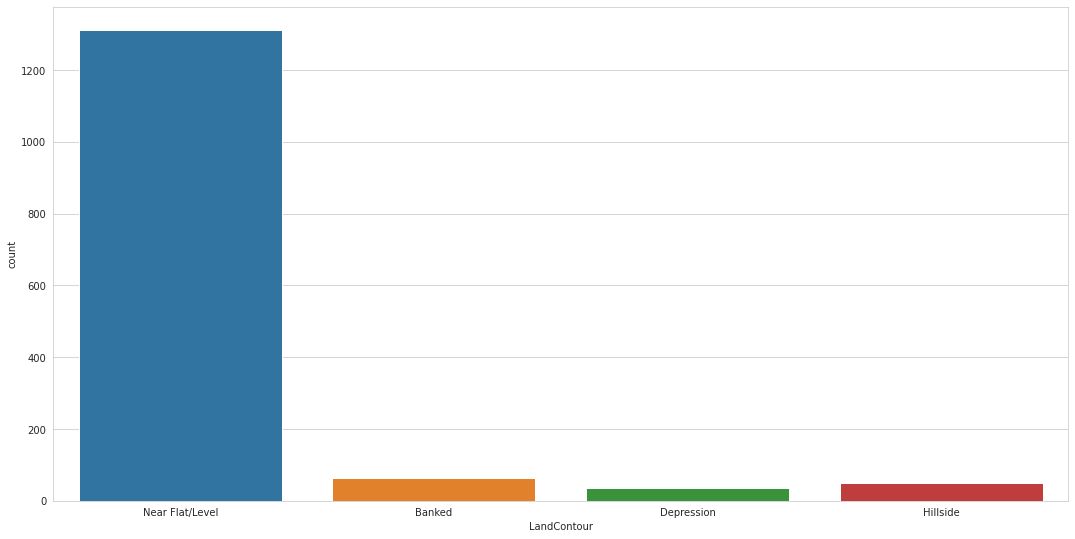

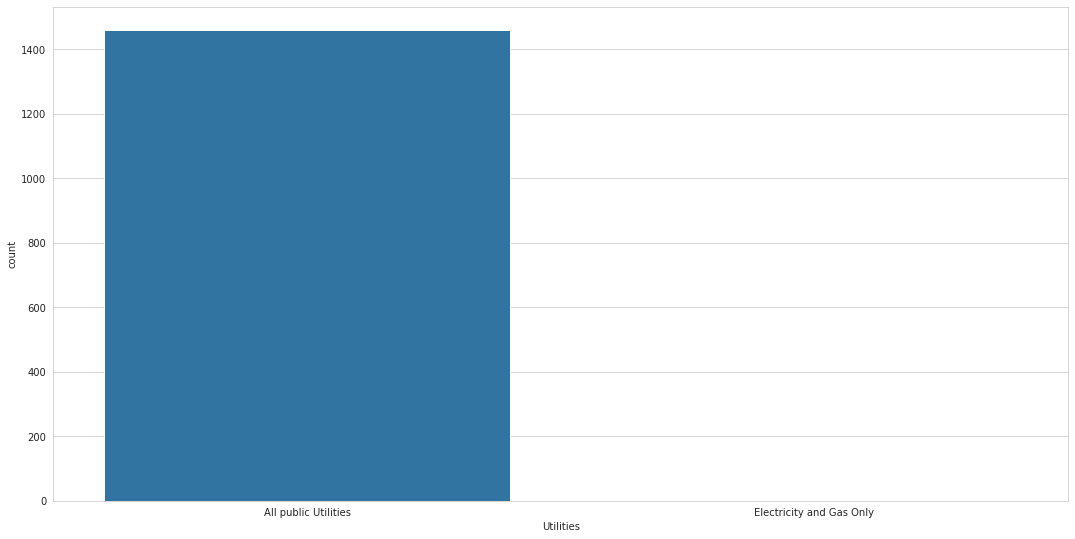

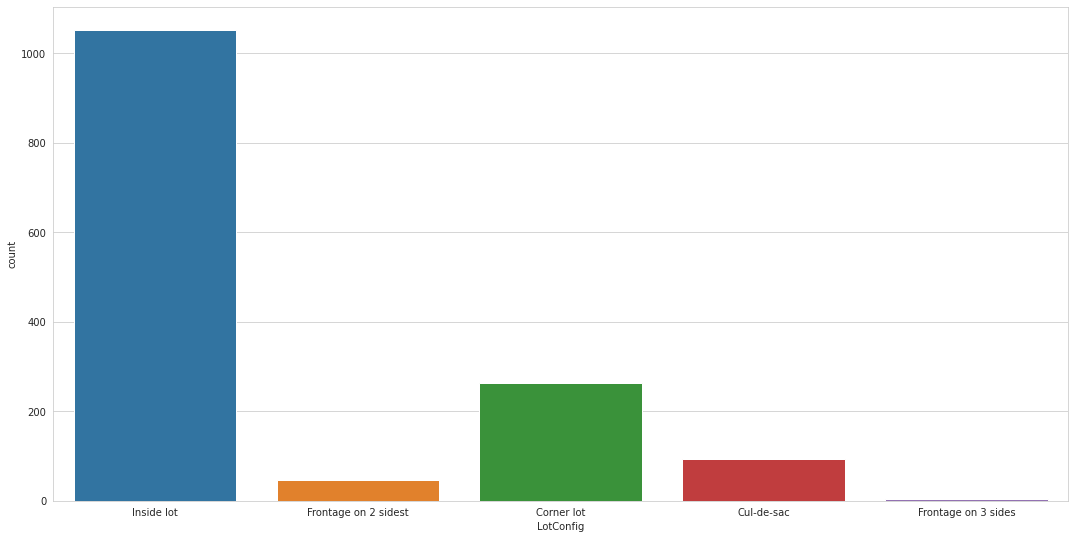

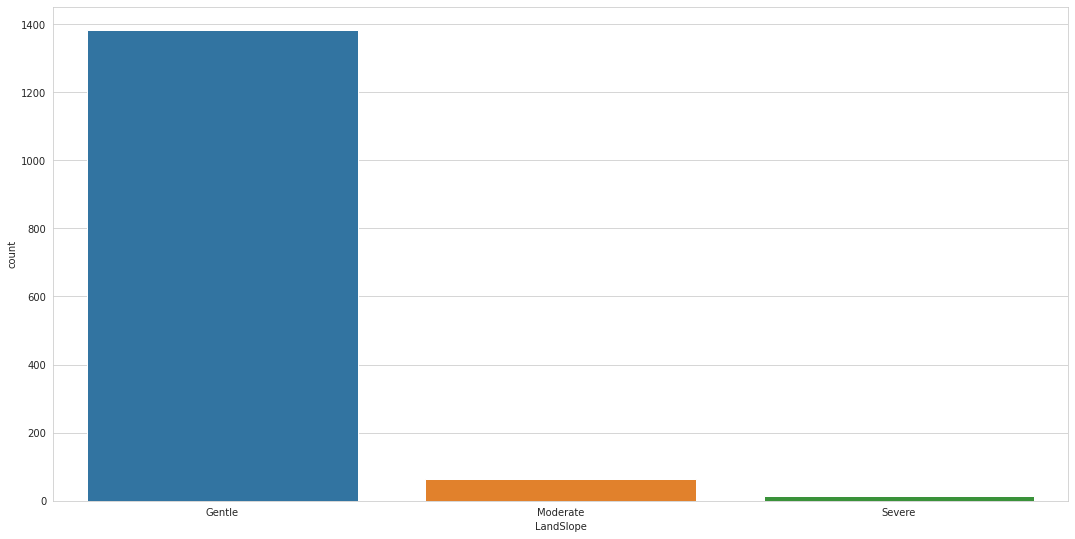

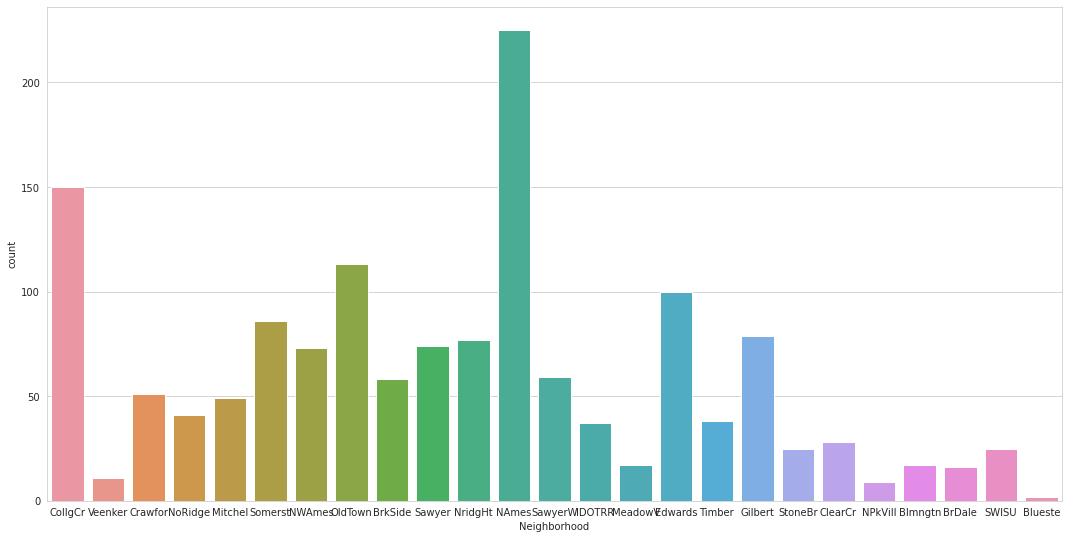

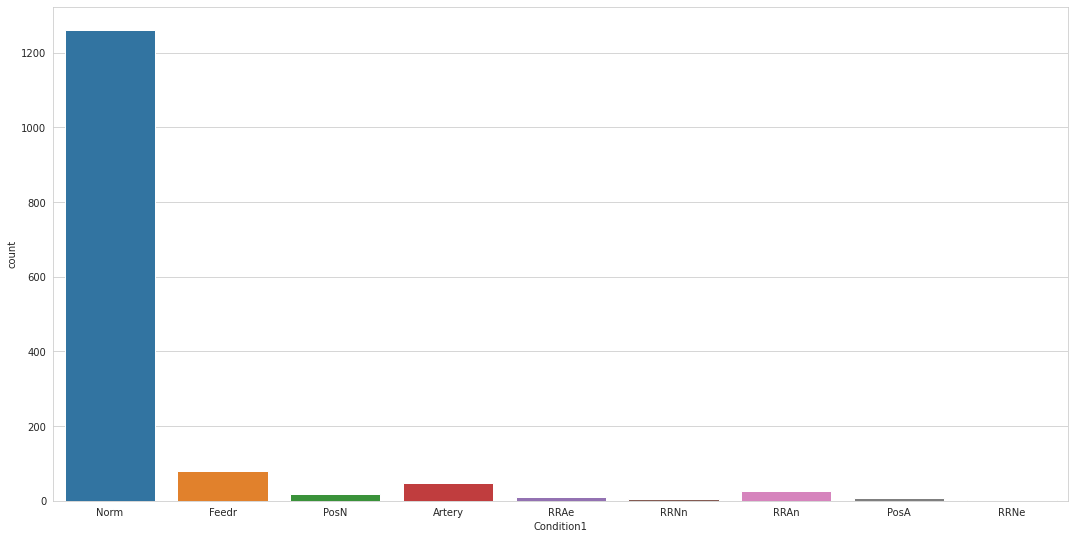

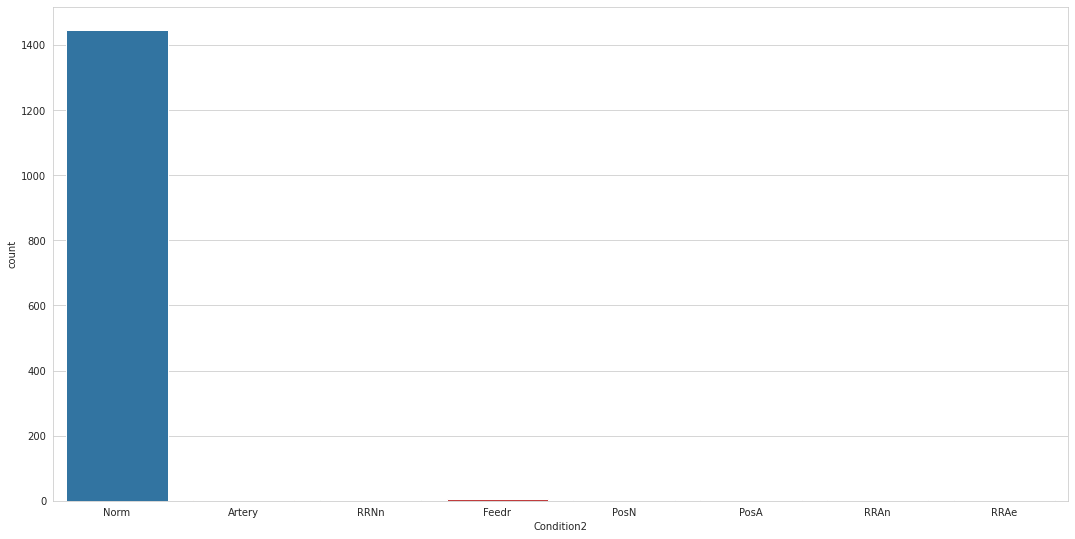

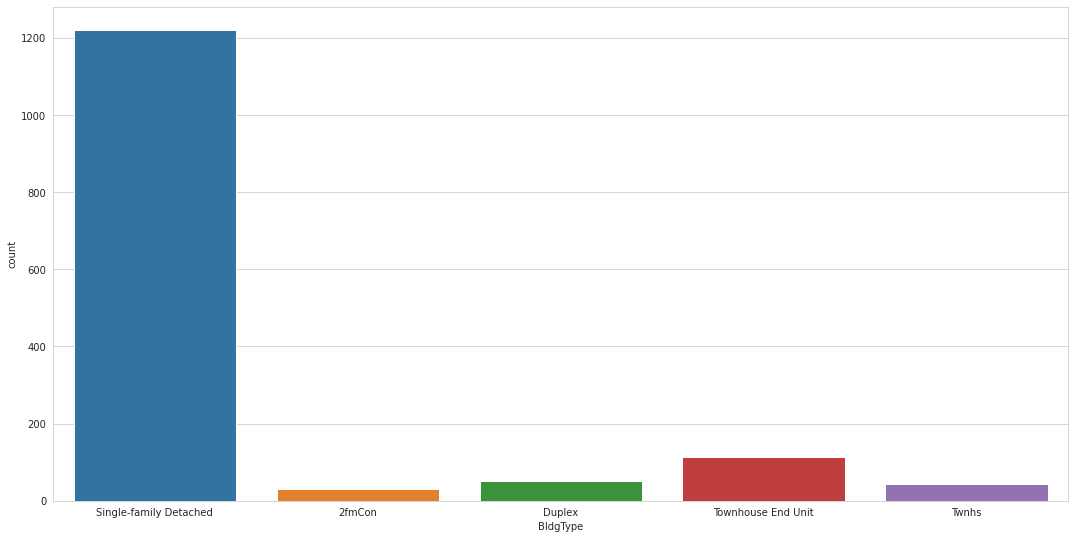

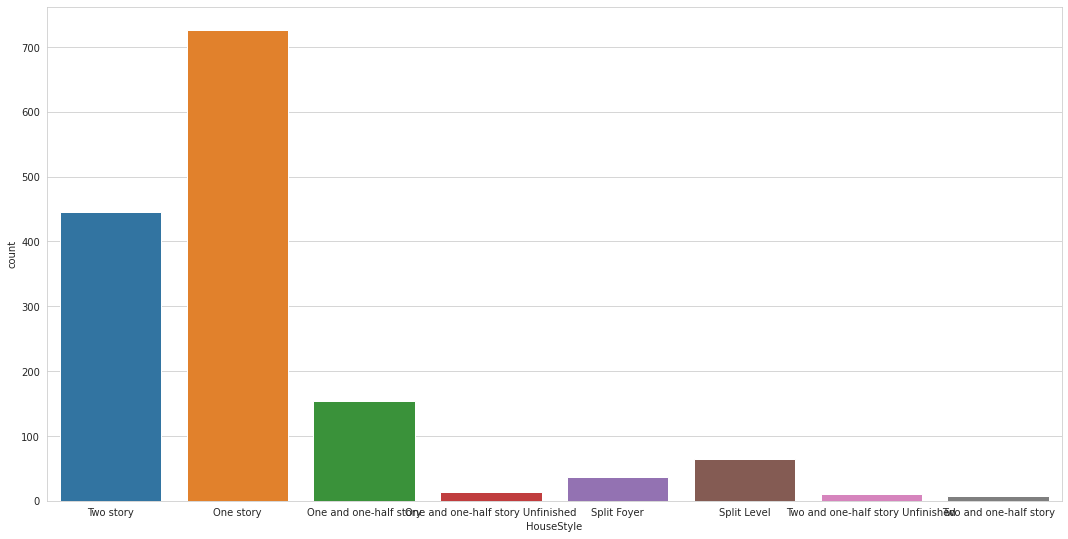

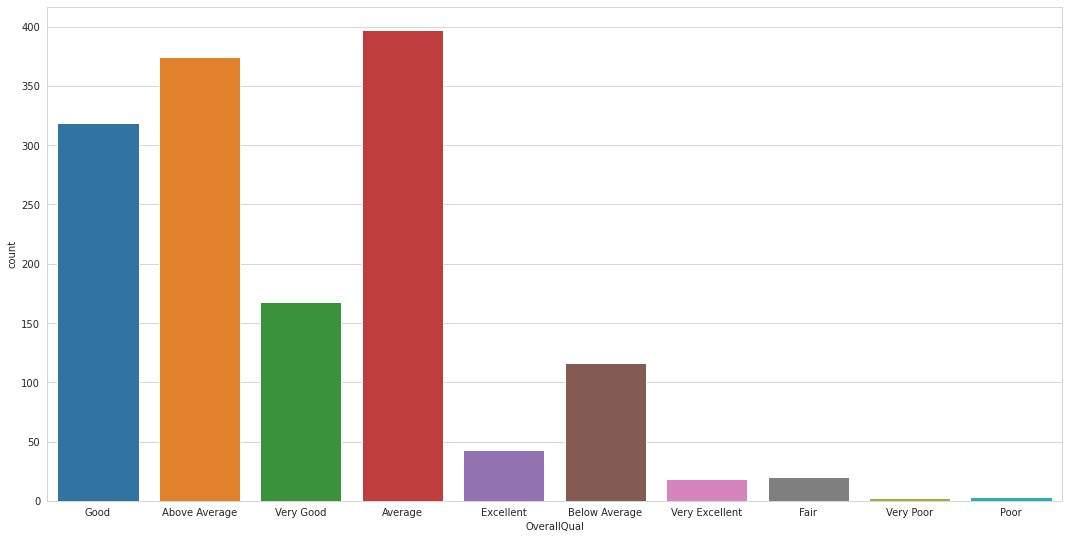

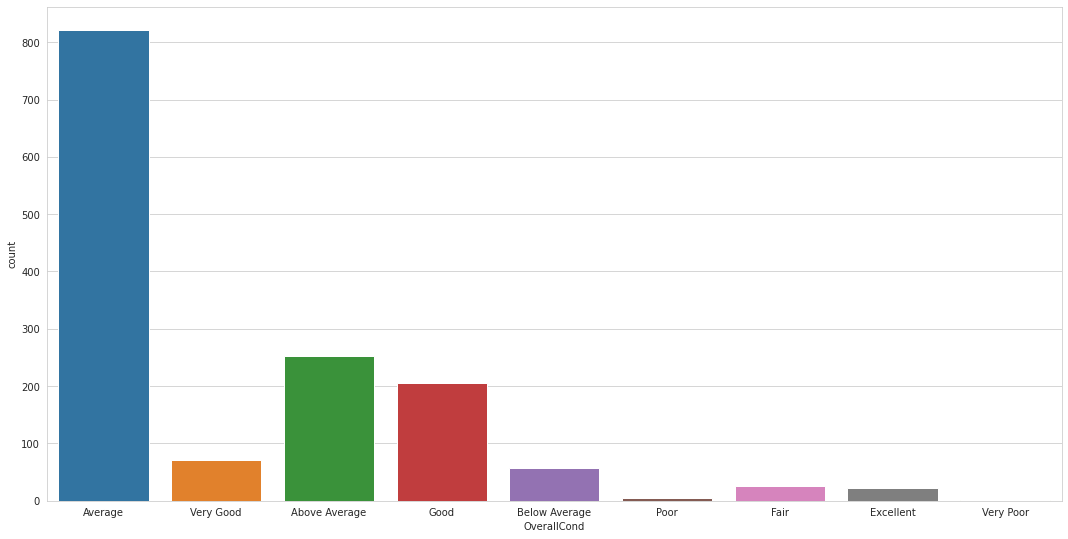

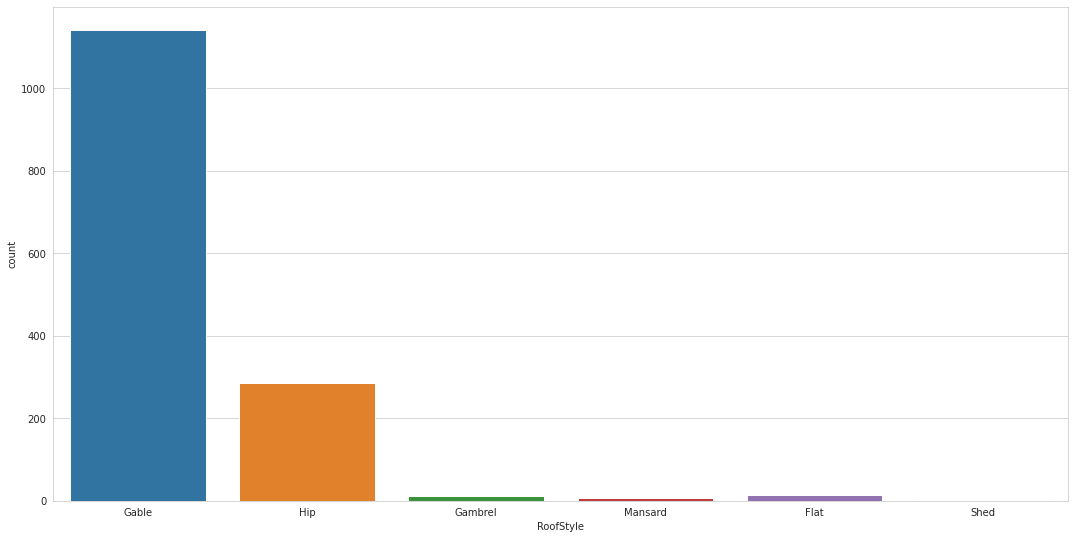

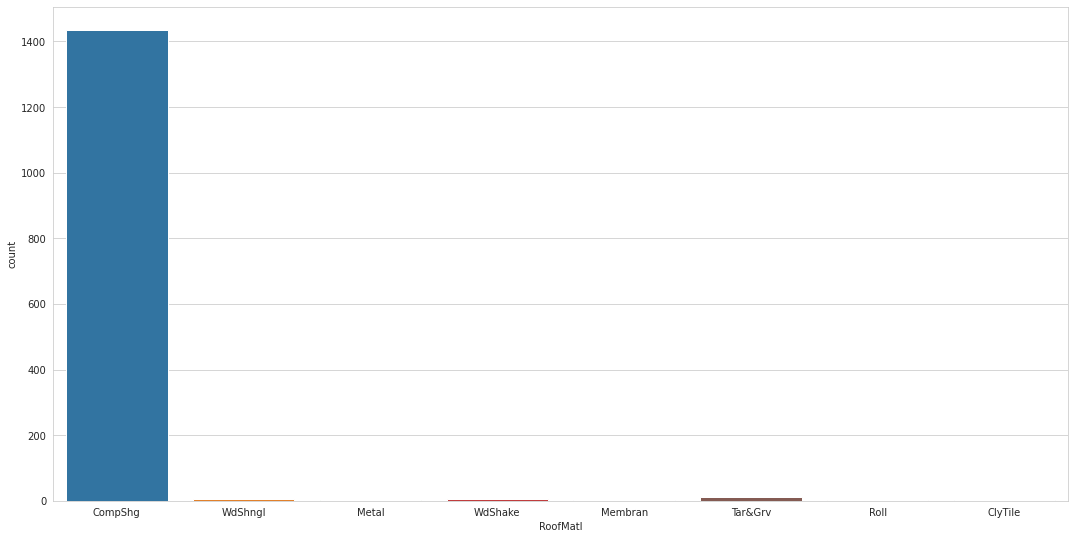

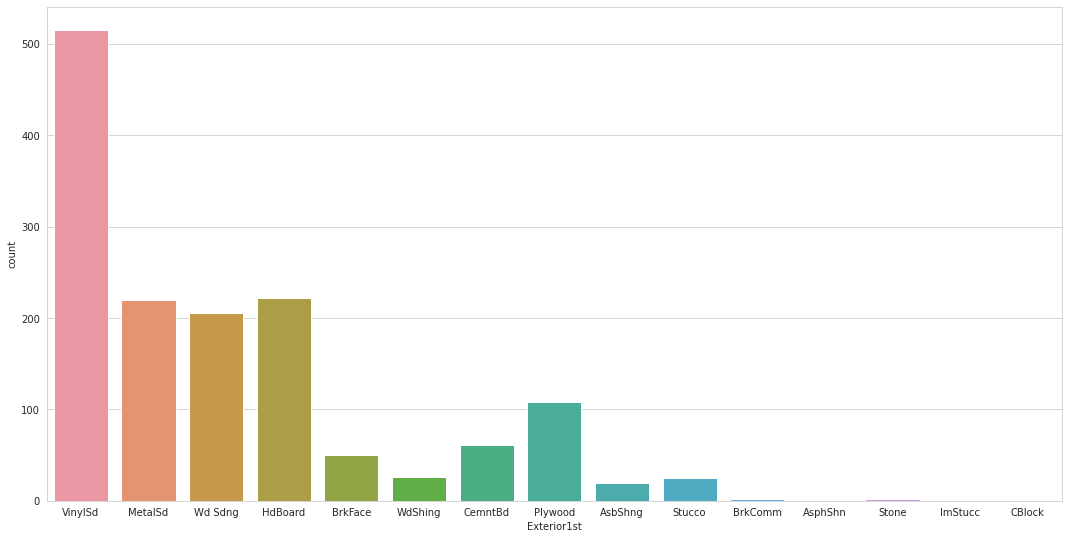

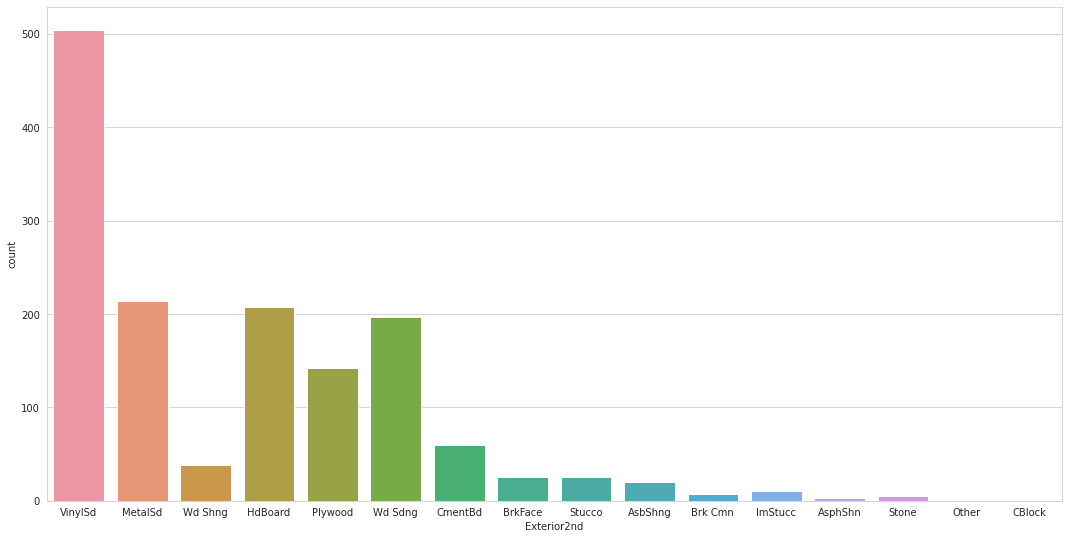

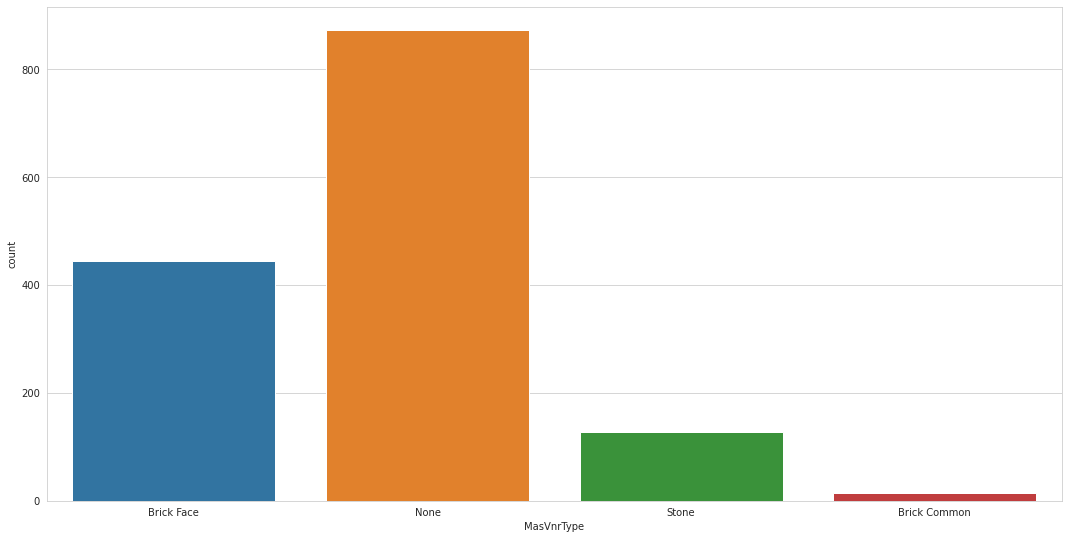

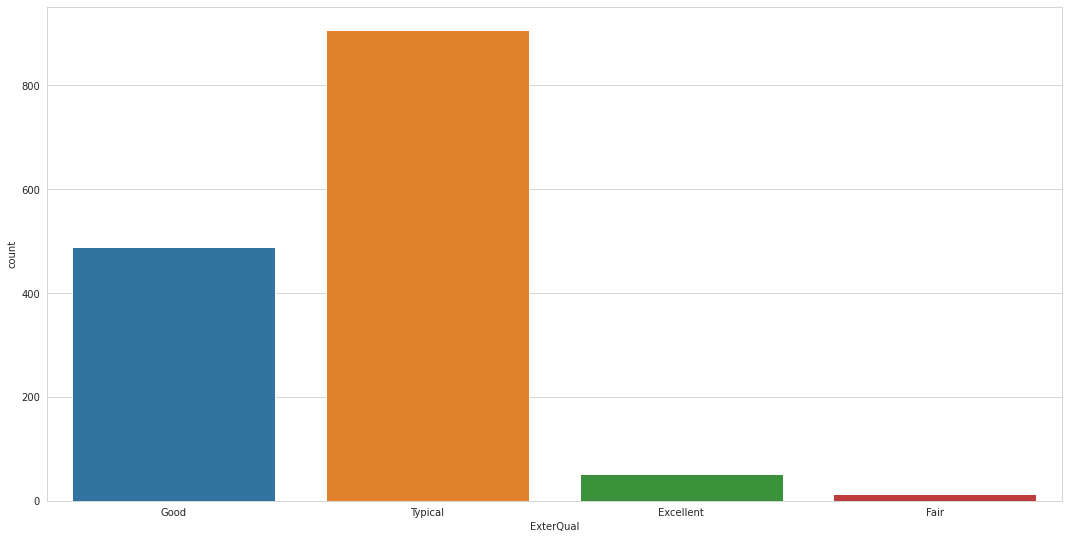

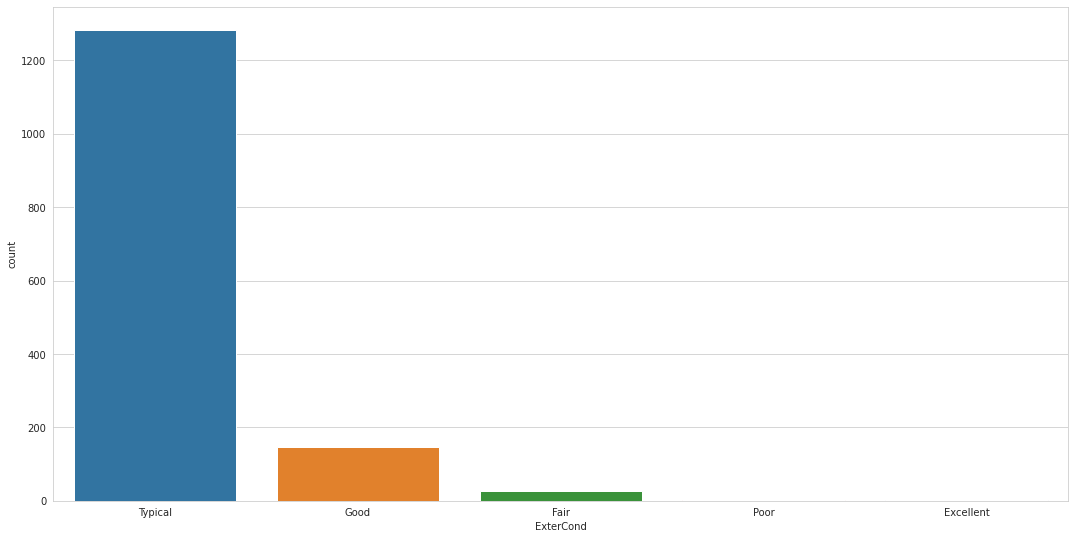

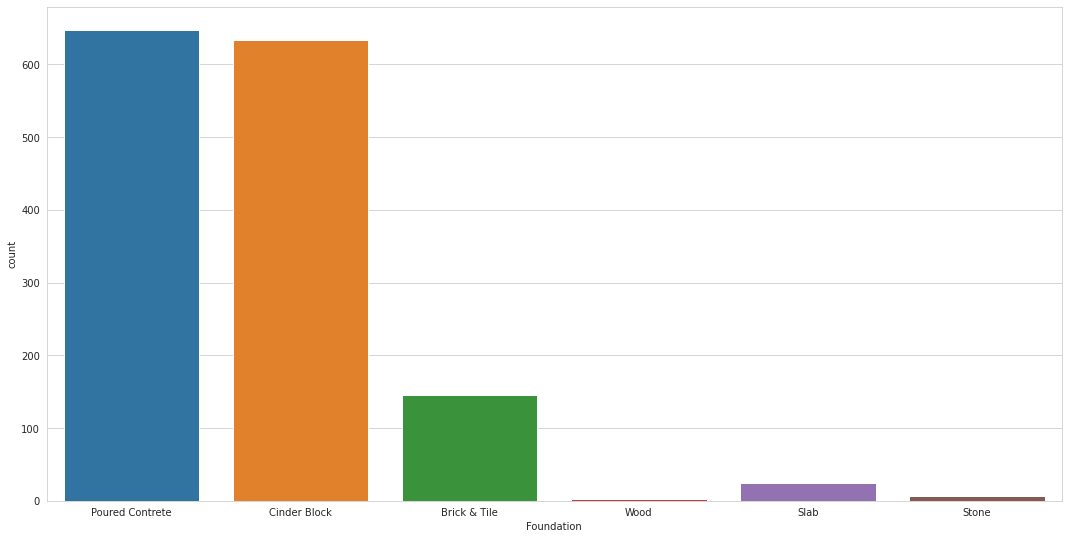

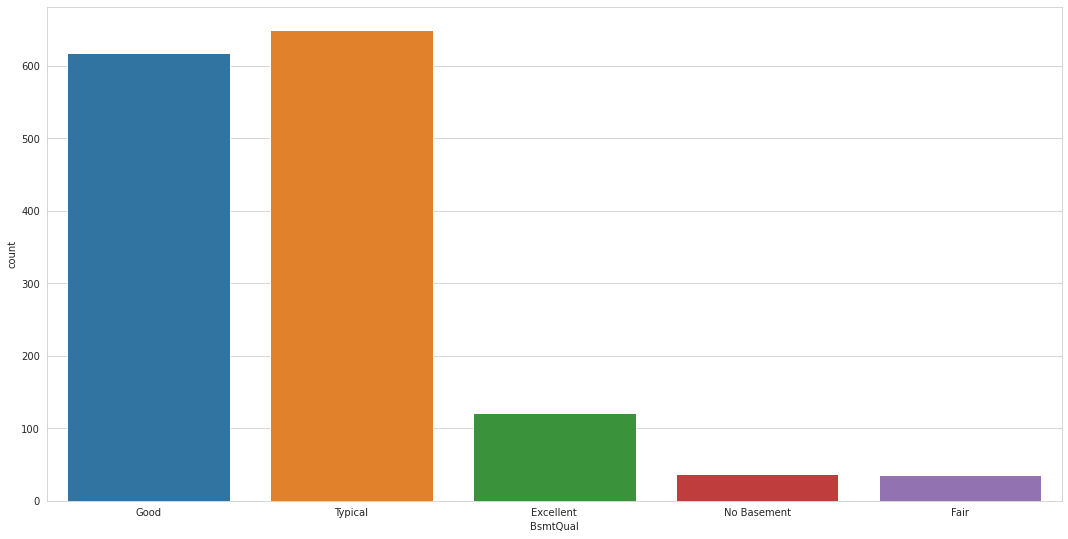

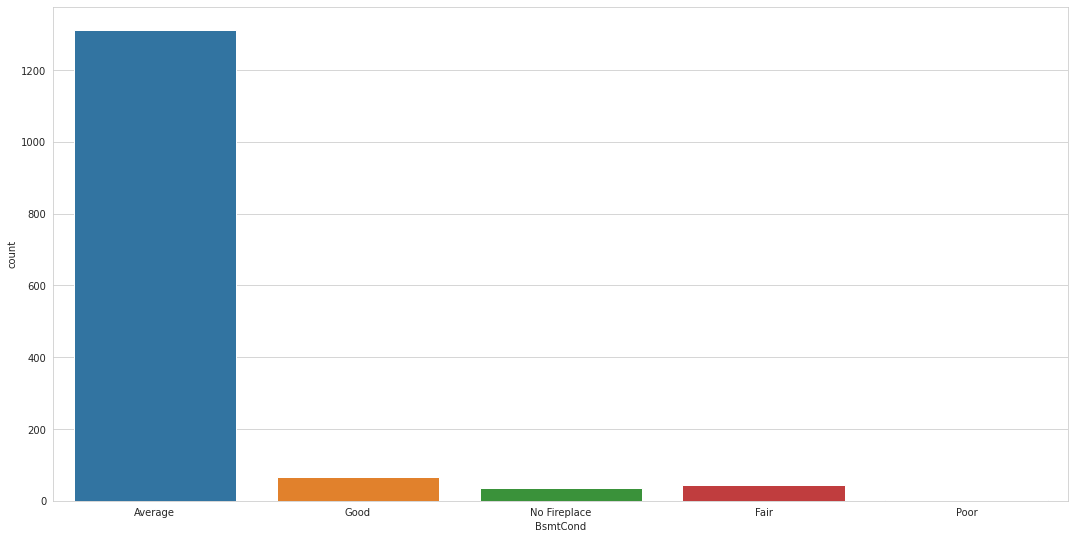

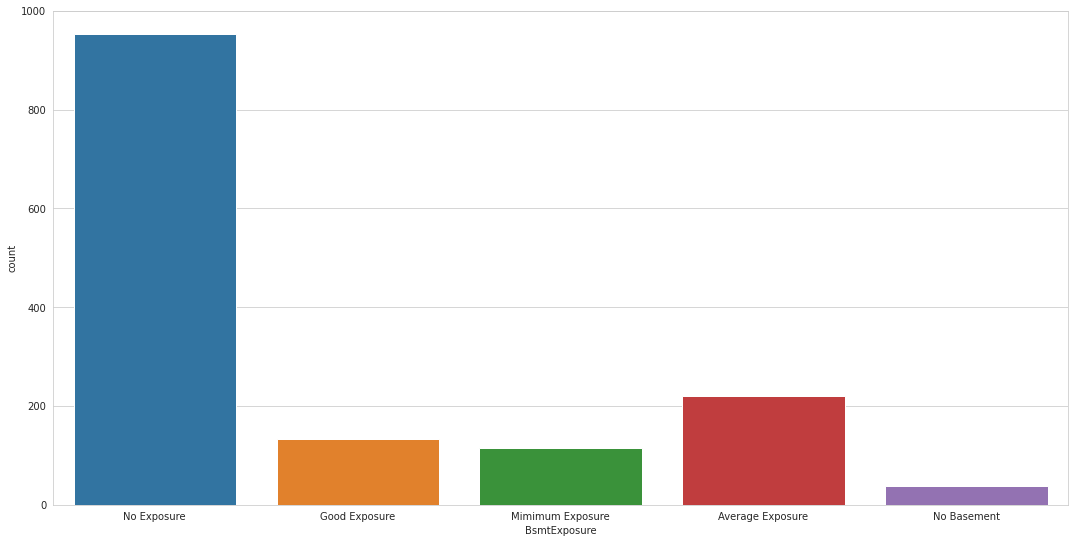

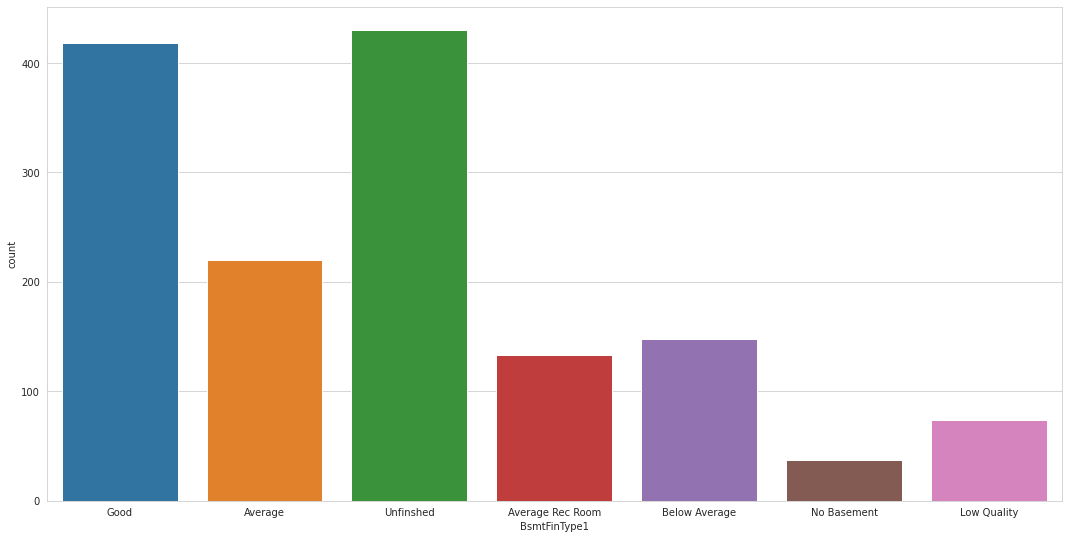

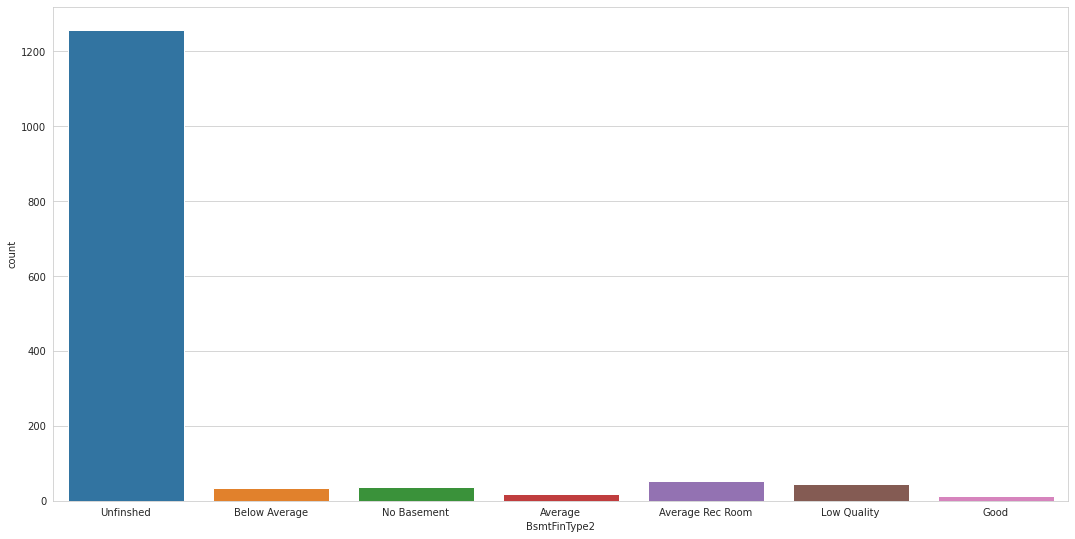

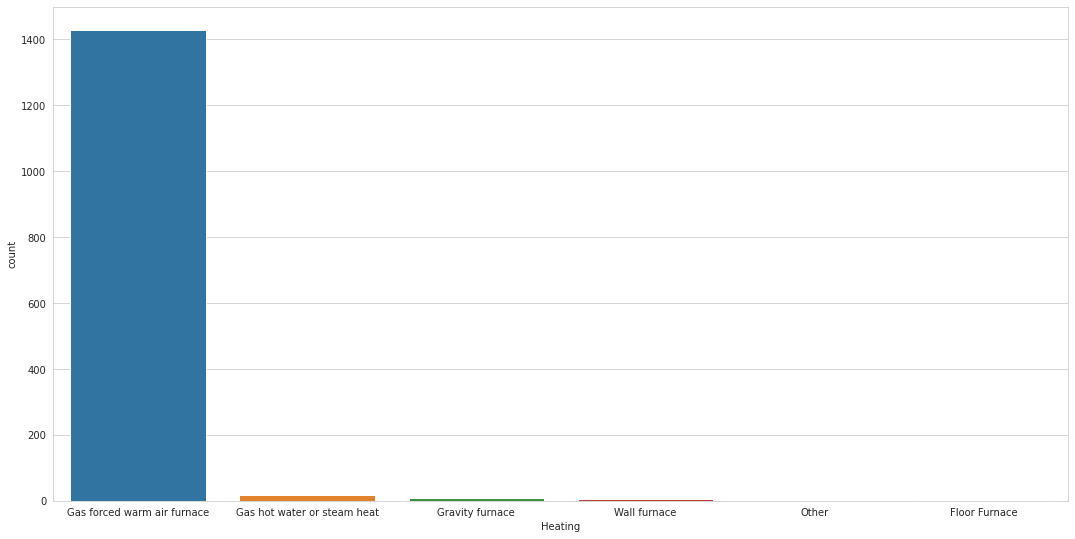

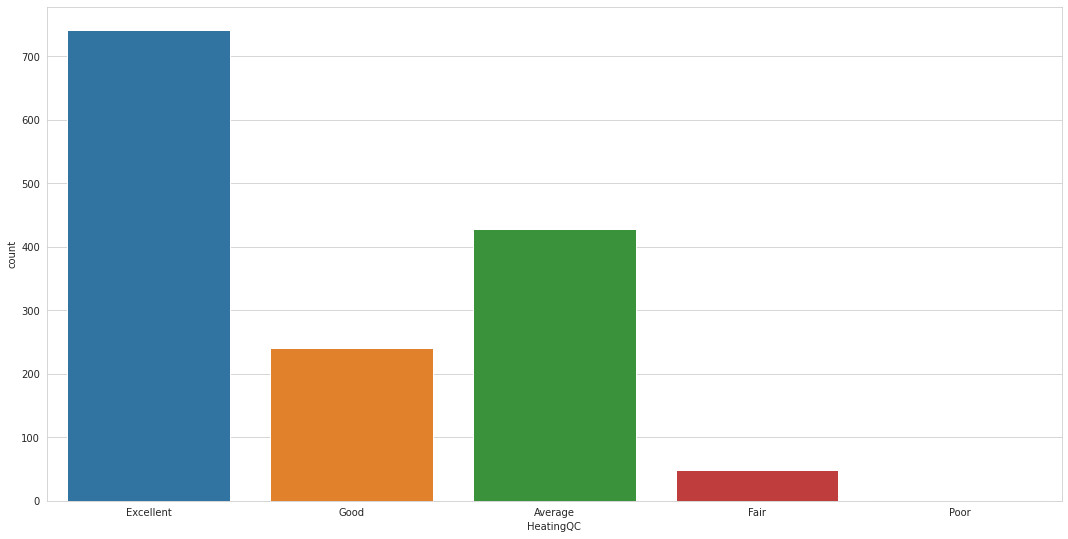

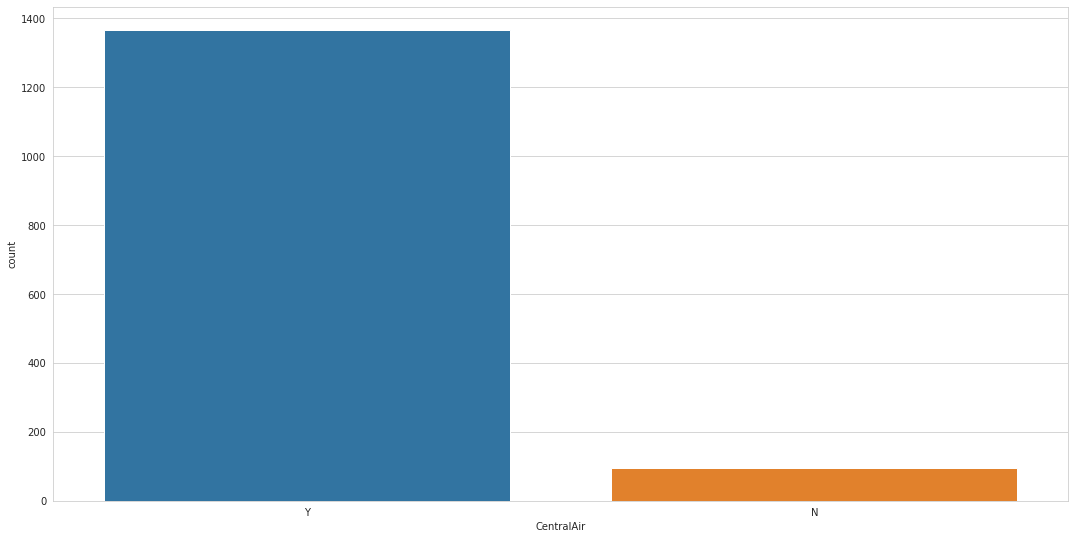

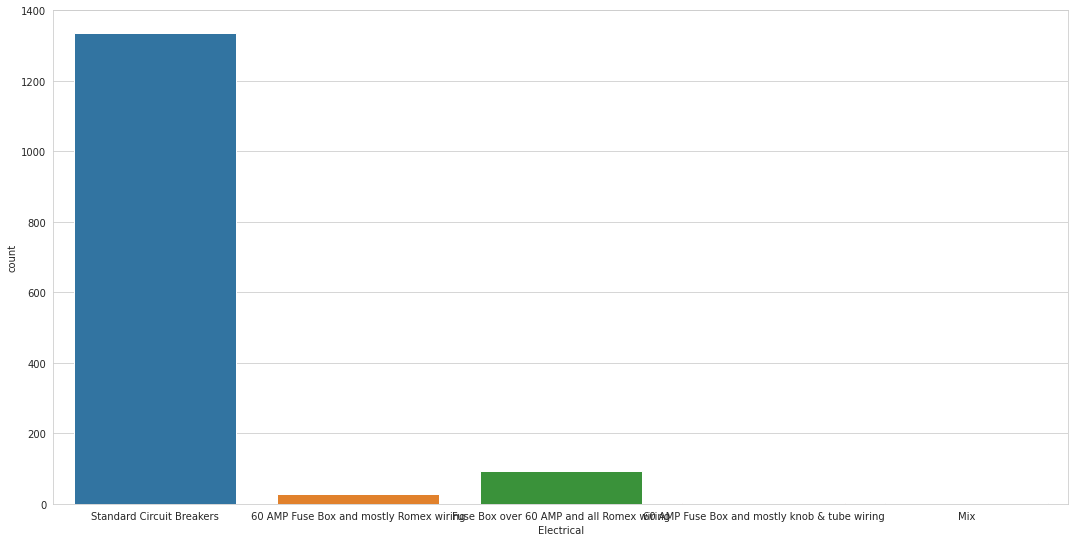

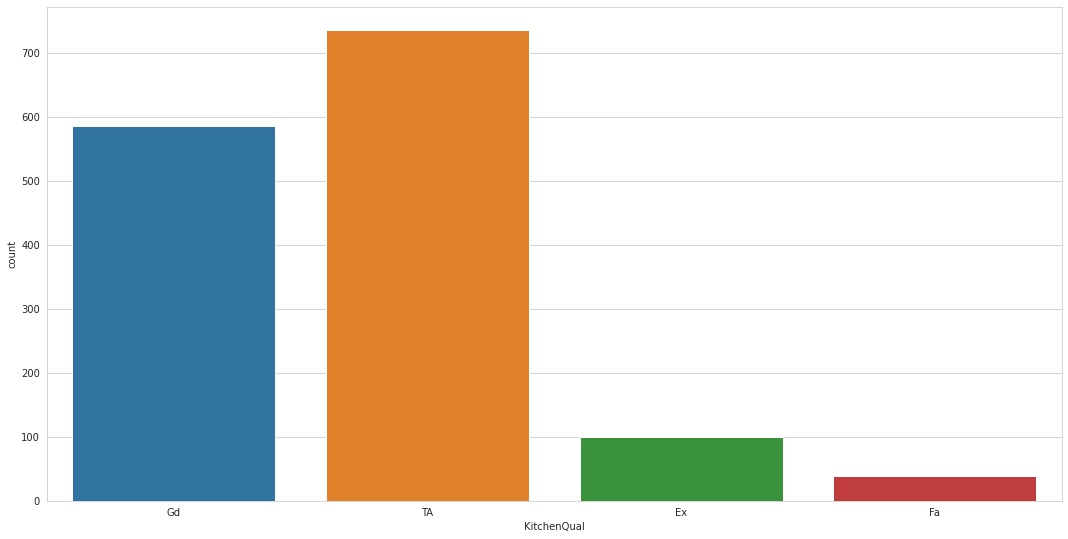

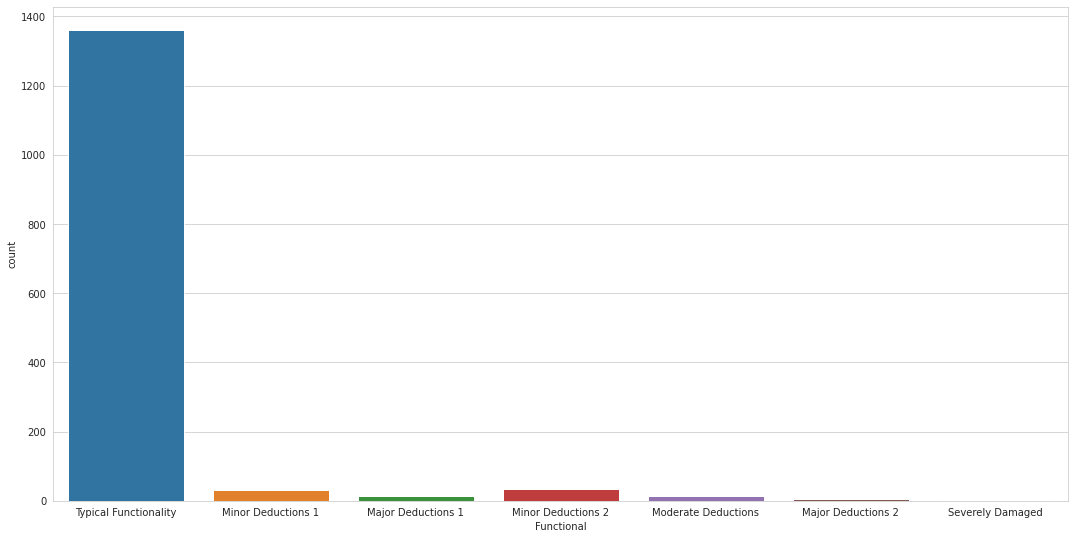

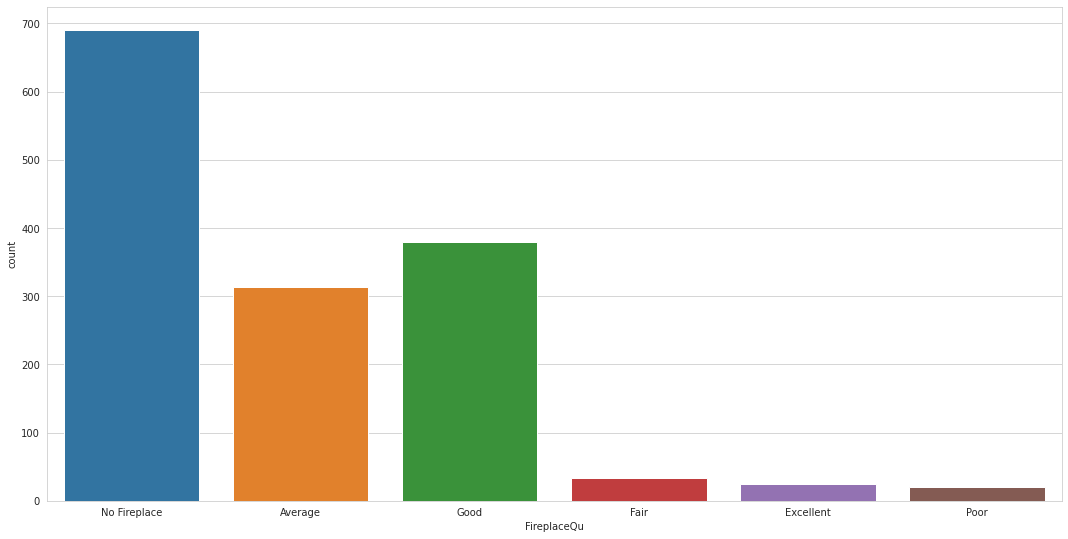

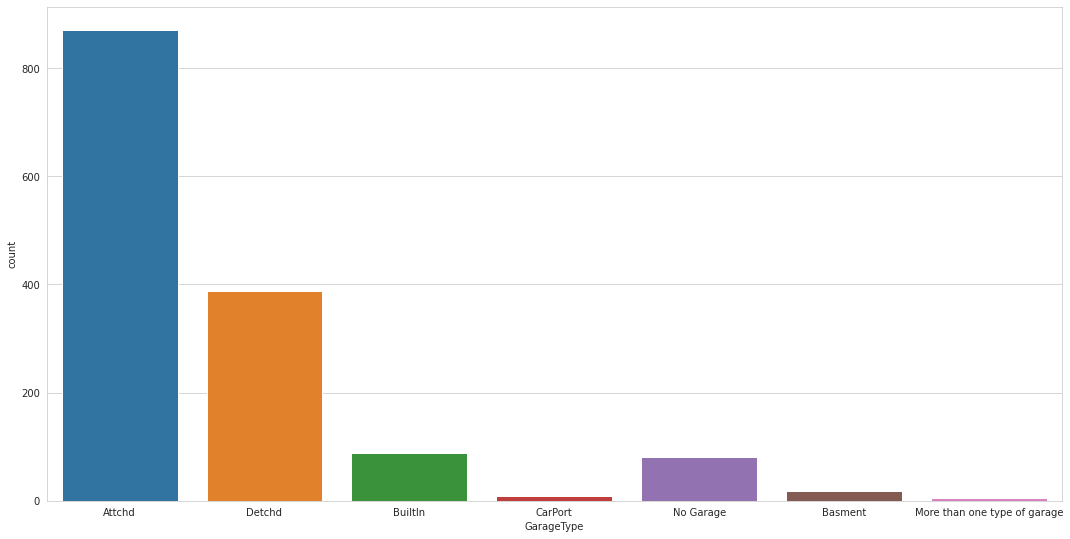

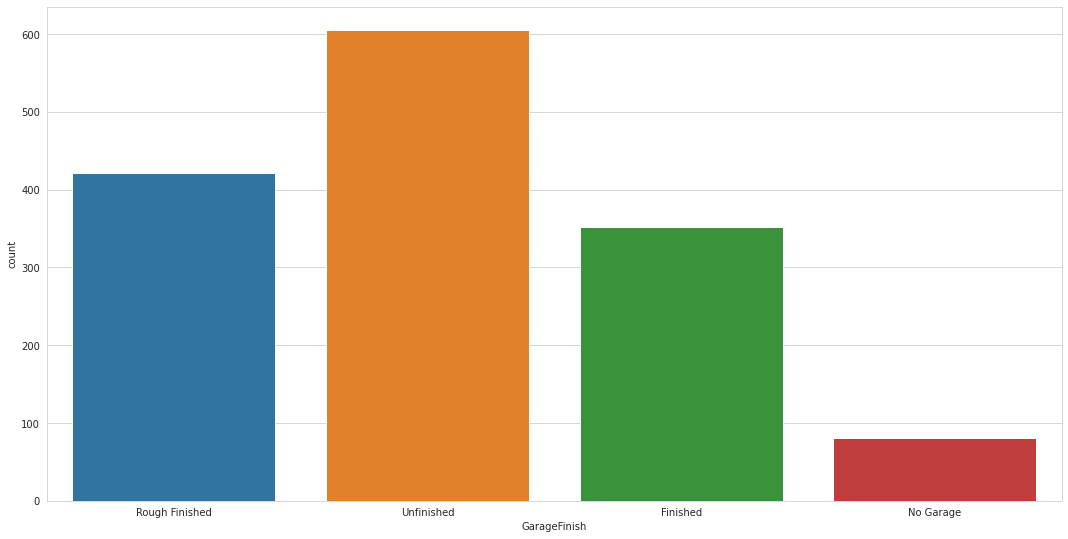

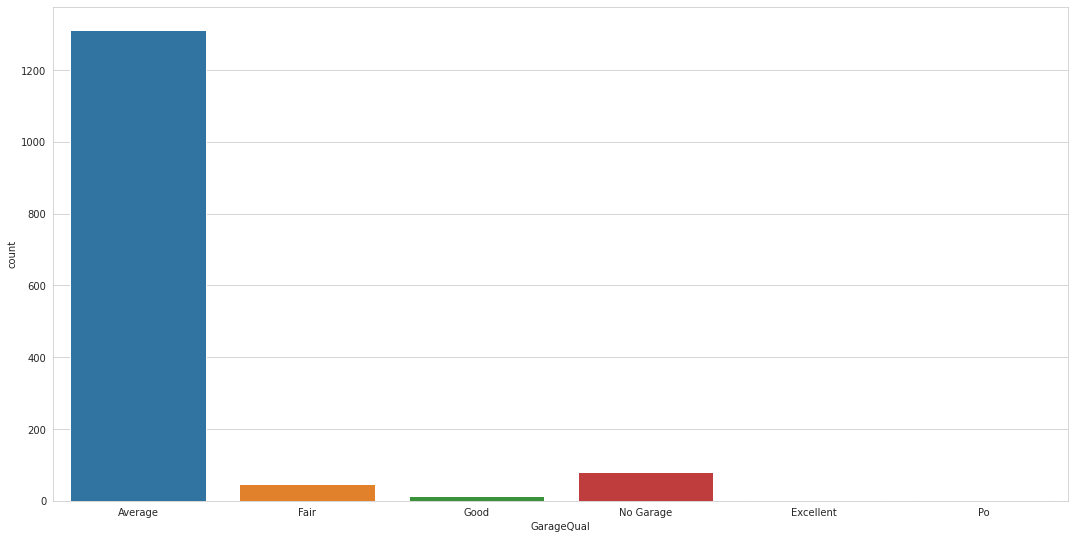

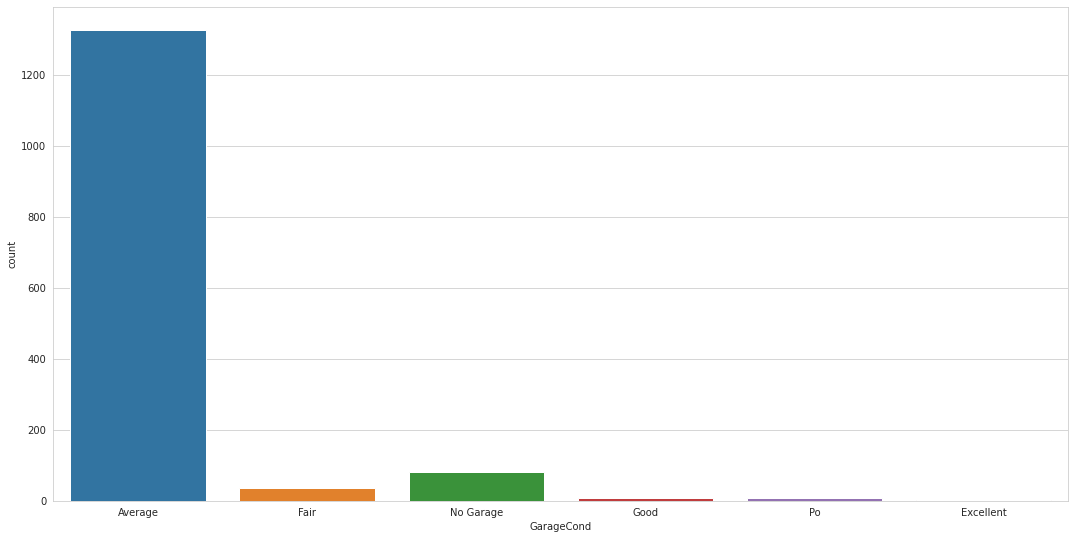

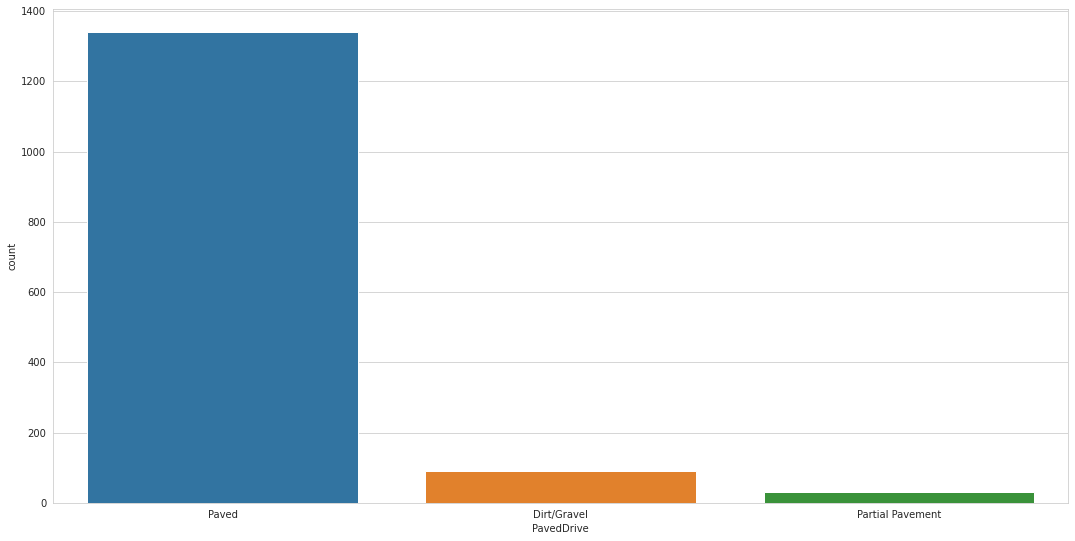

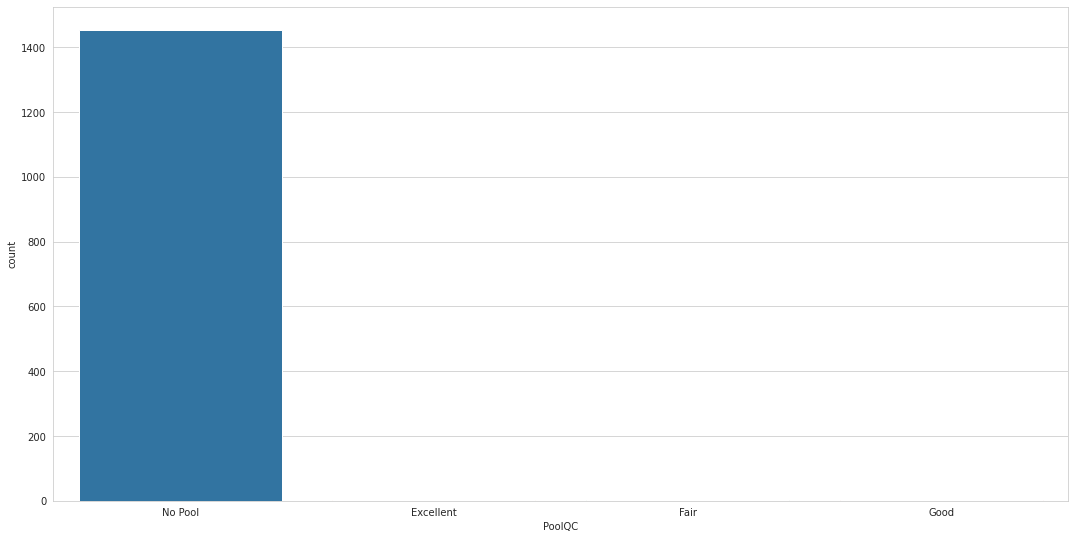

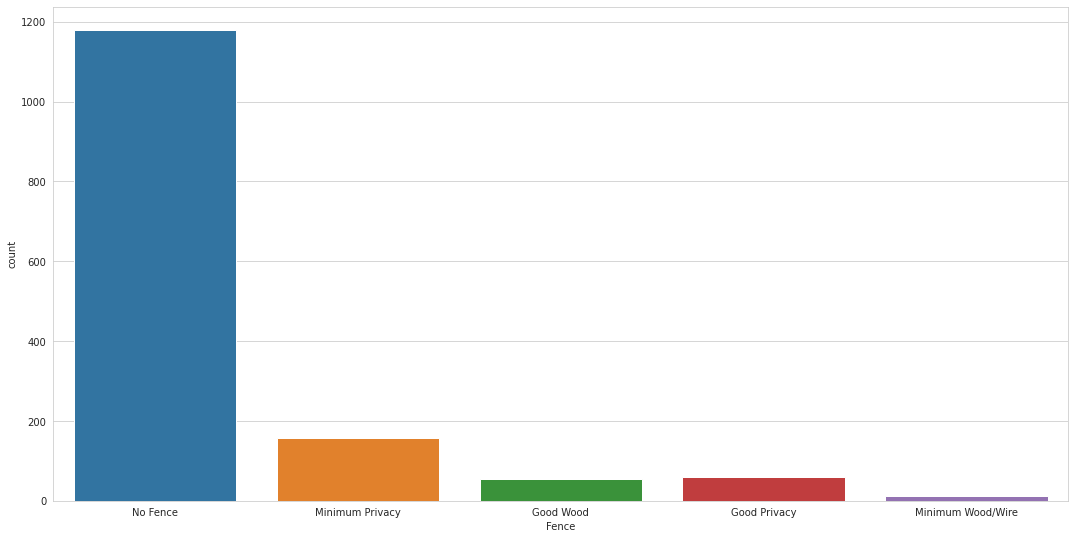

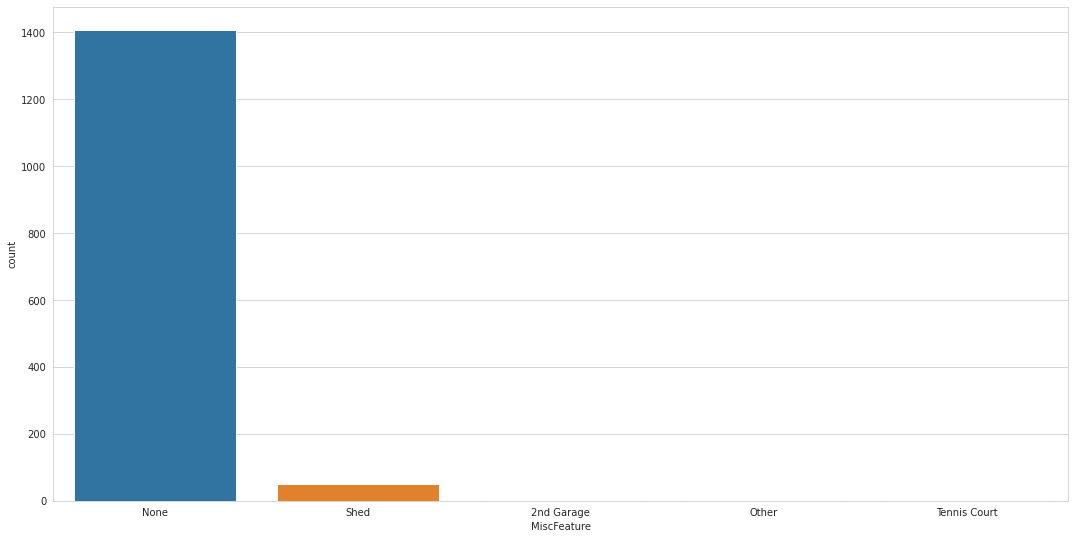

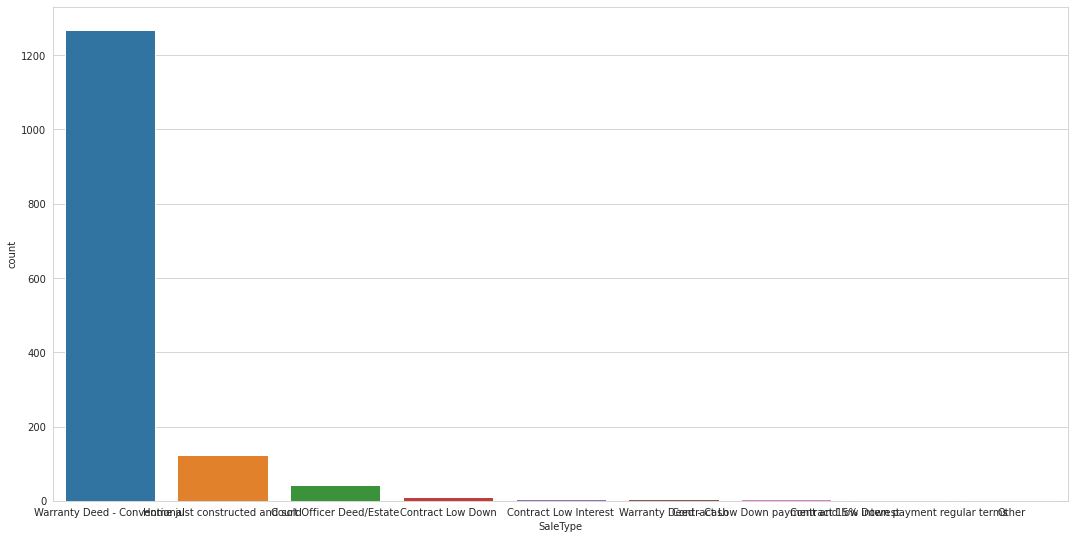

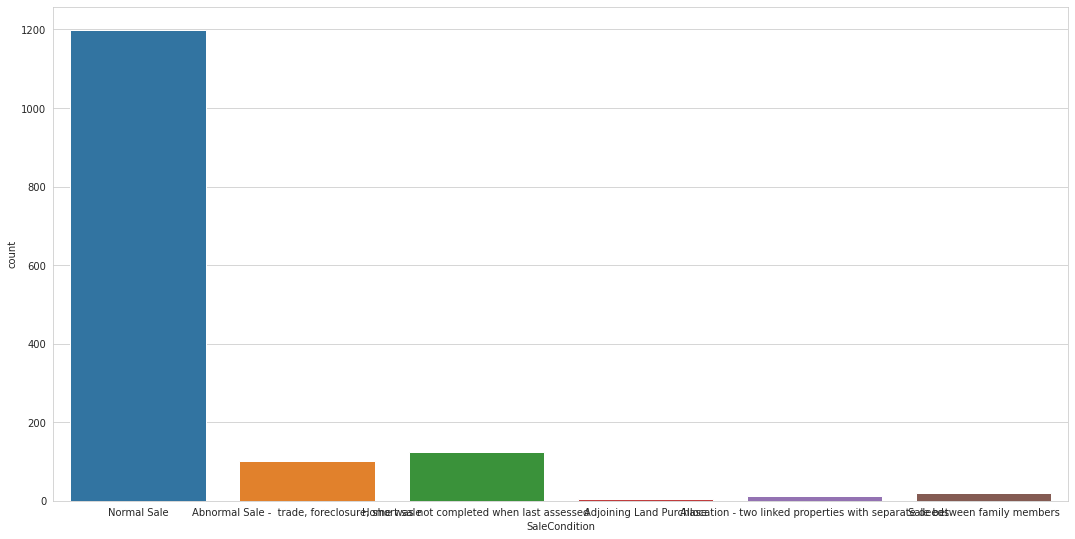

In [77]:
for i in df.columns:
  x = df[i].dtypes
  if x == 'object':
    #print('yes')
    plt.figure(figsize=(40, 20))
    plt.subplot(2,2,1)
    sns.countplot(data= df,x= i)
    plt.show()

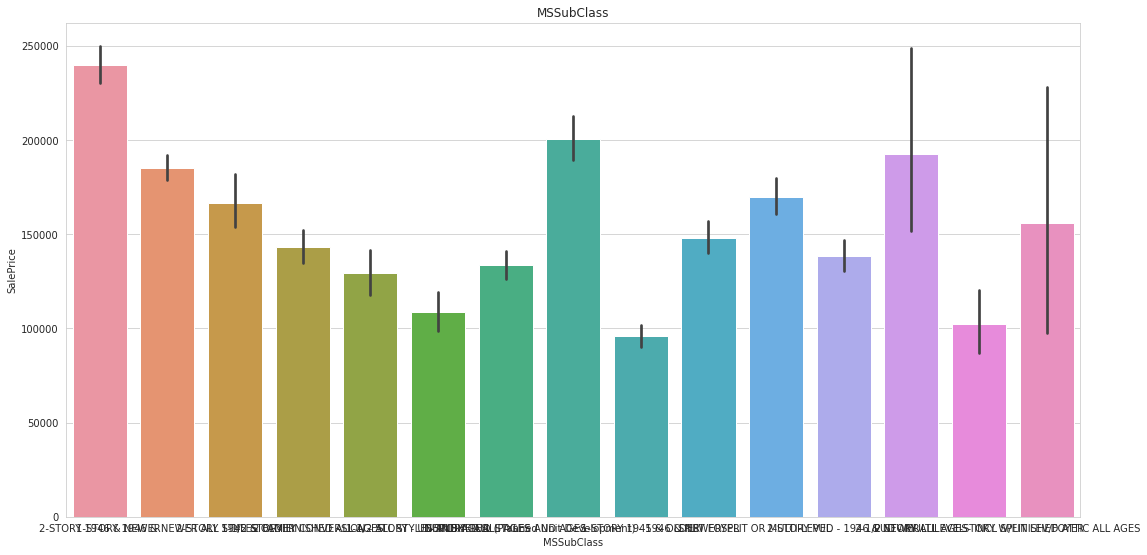

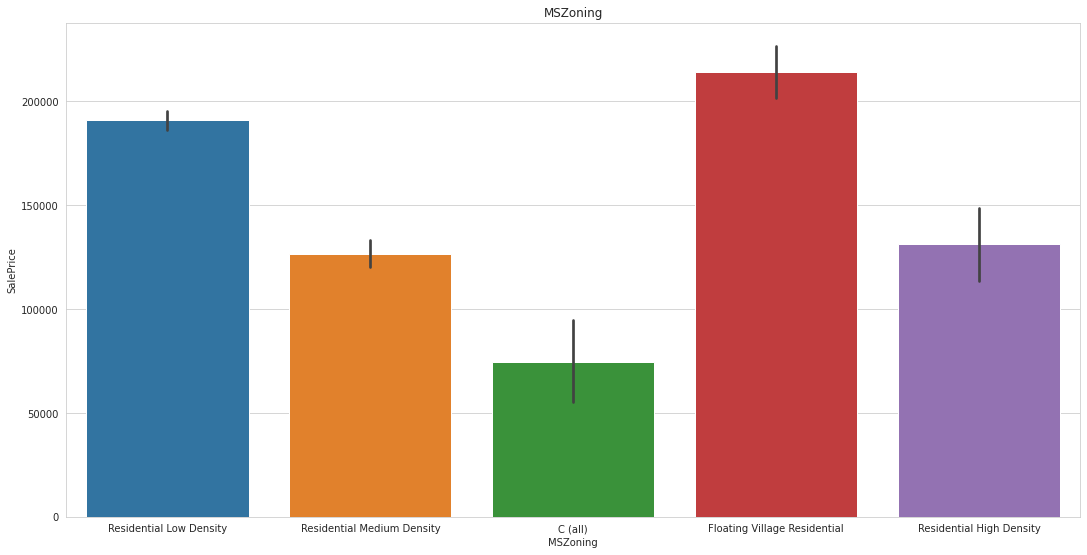

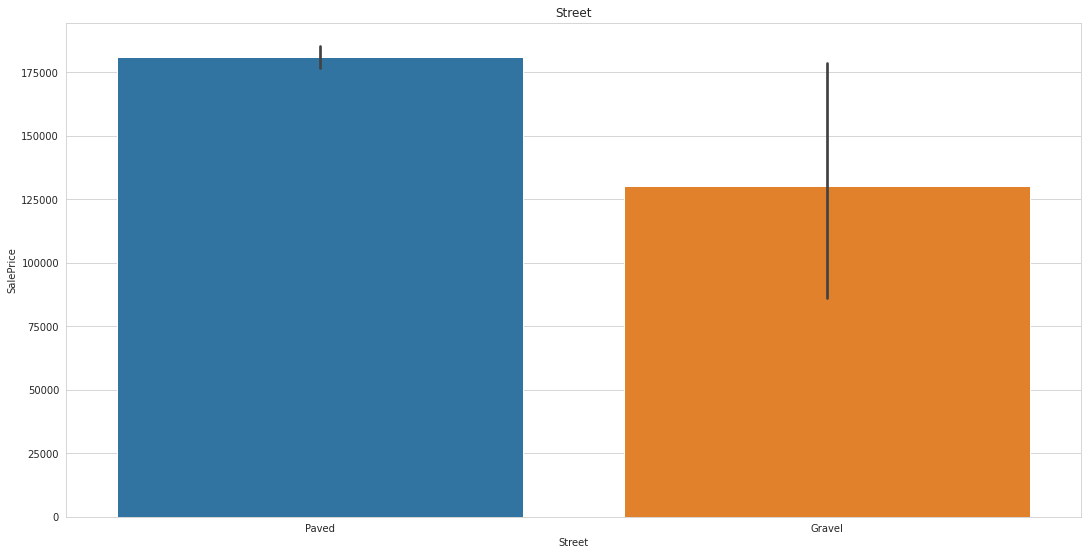

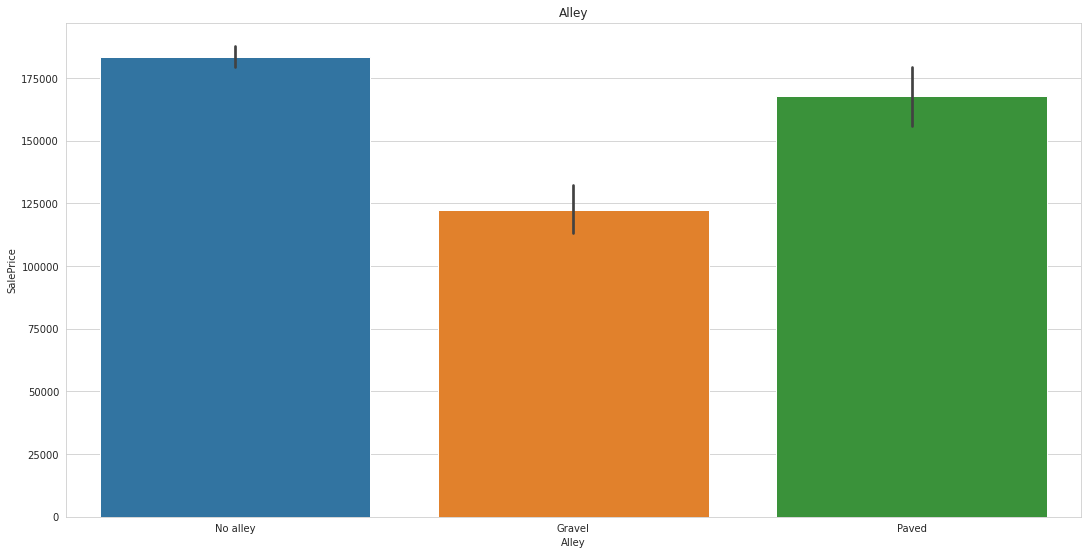

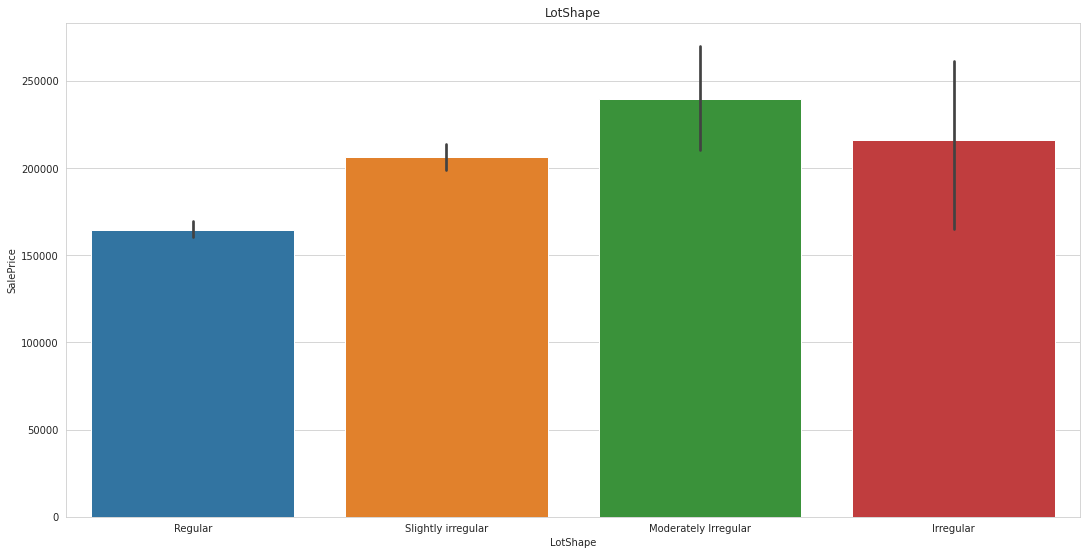

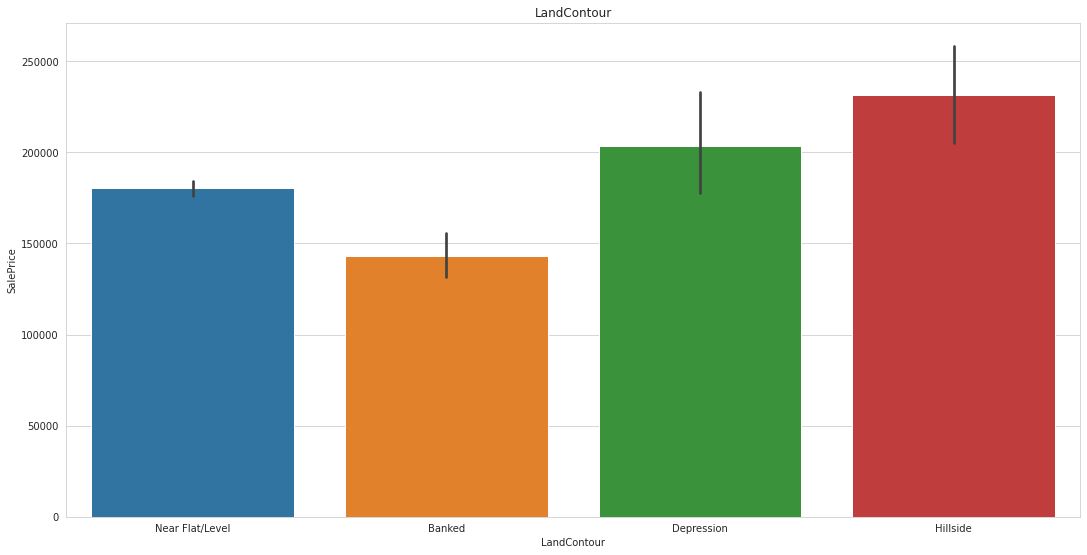

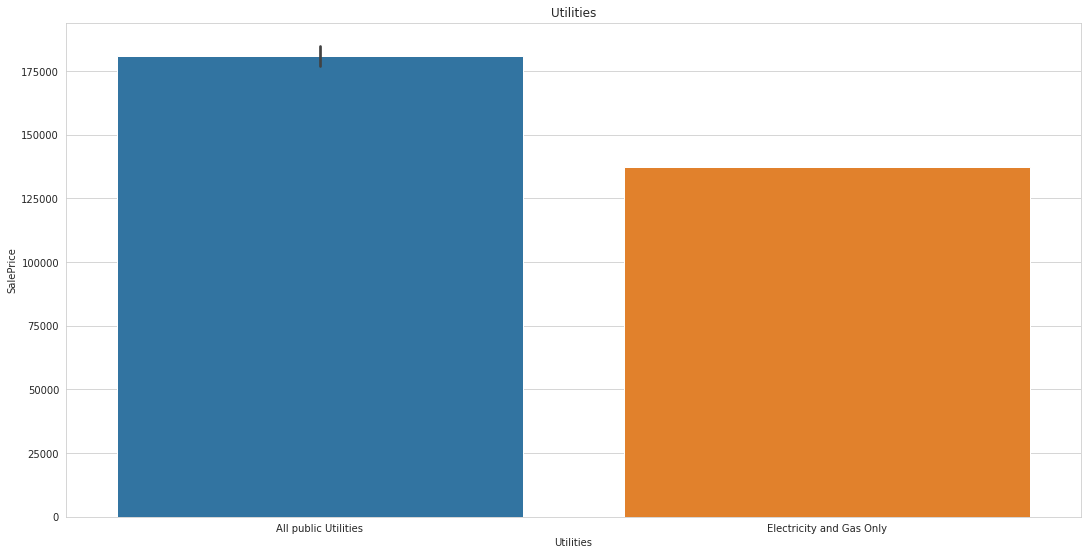

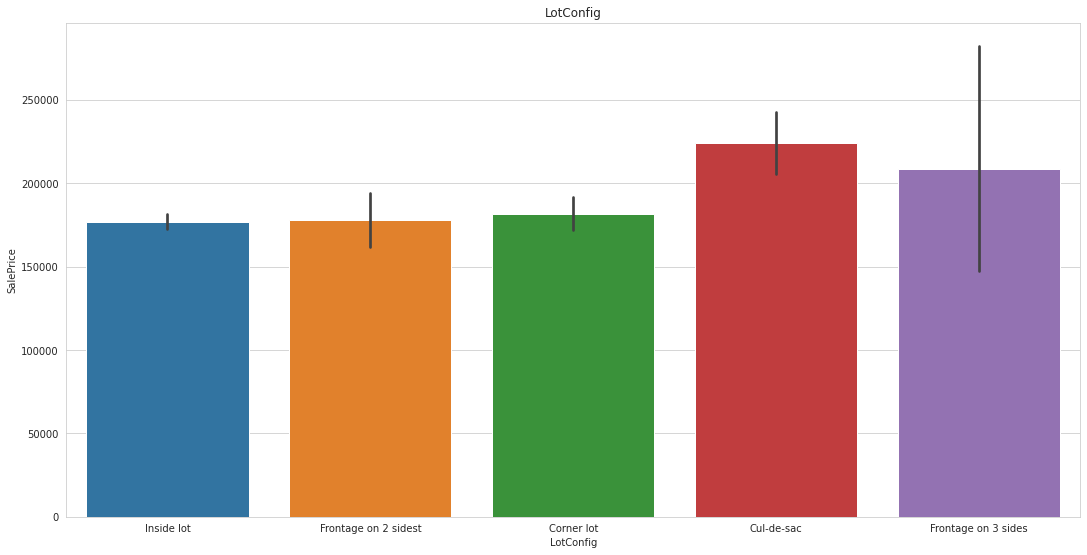

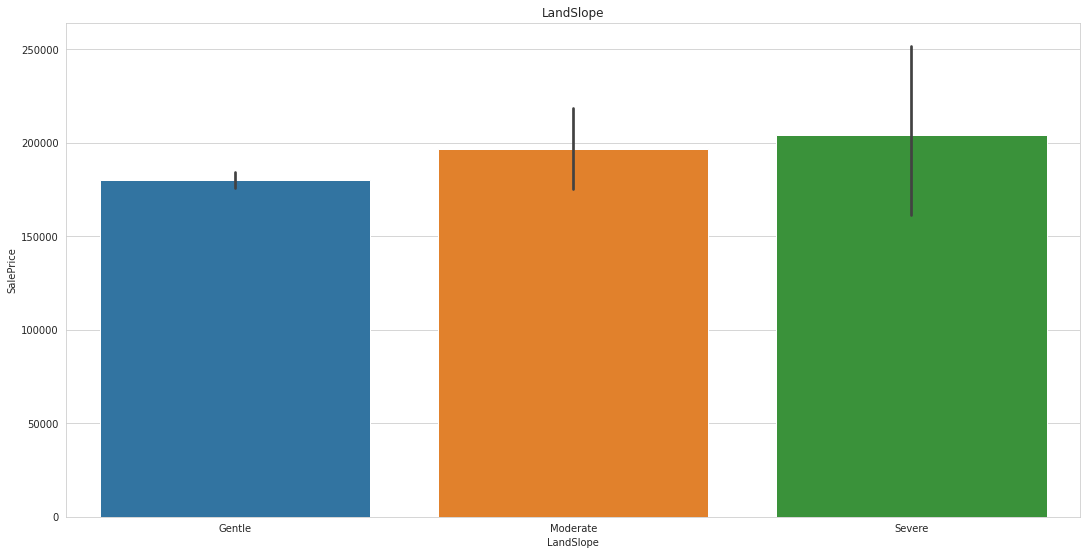

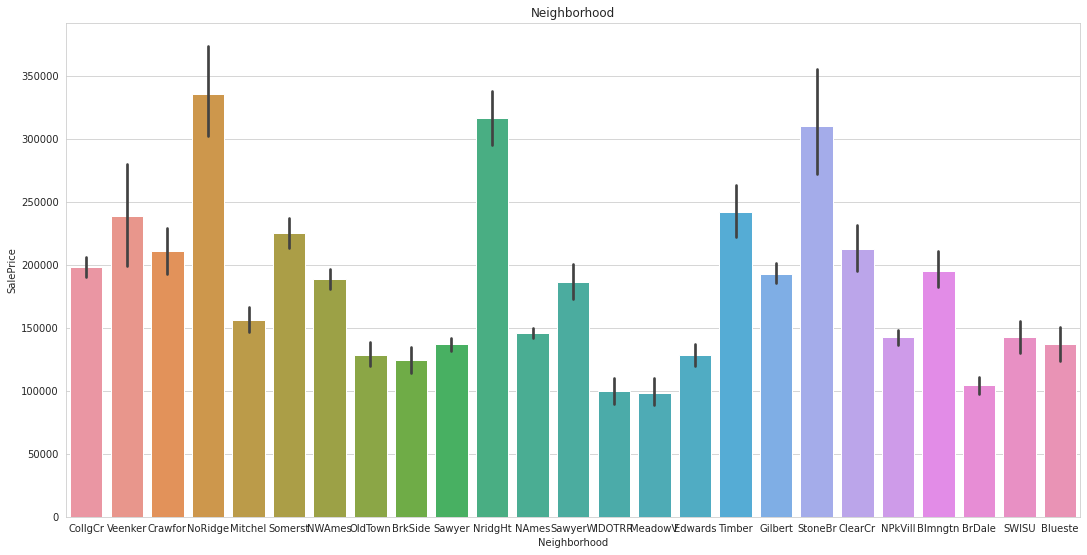

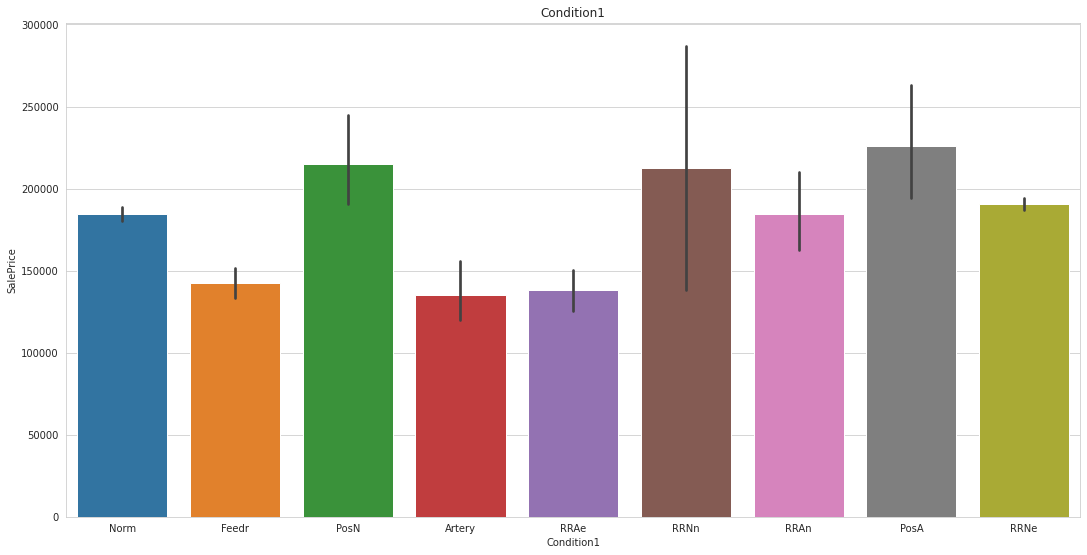

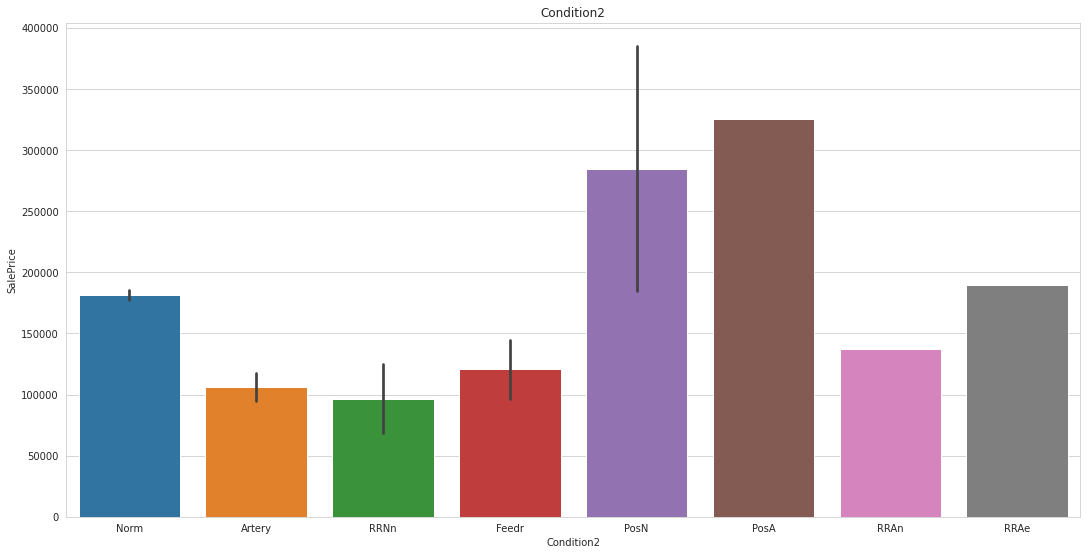

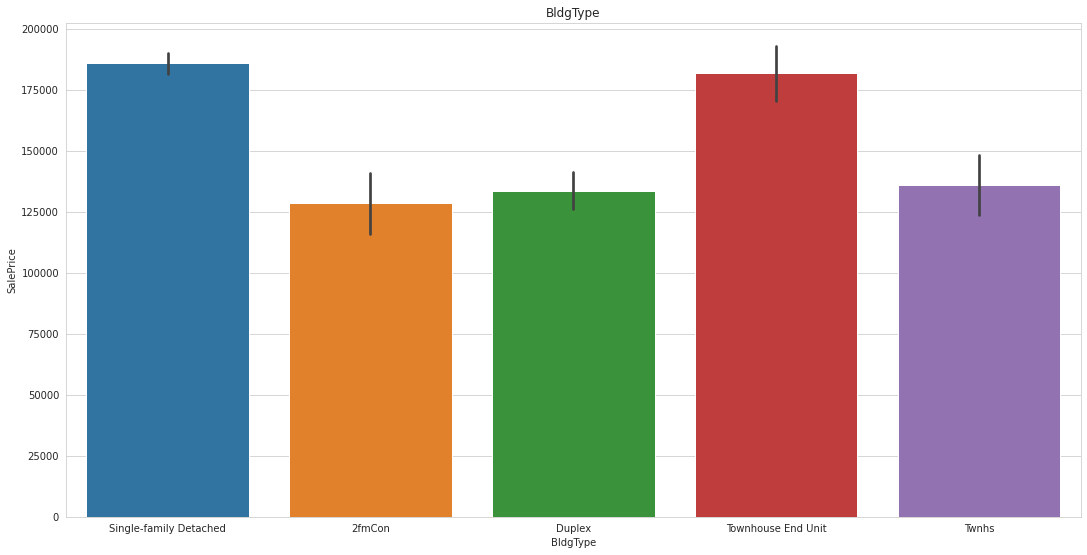

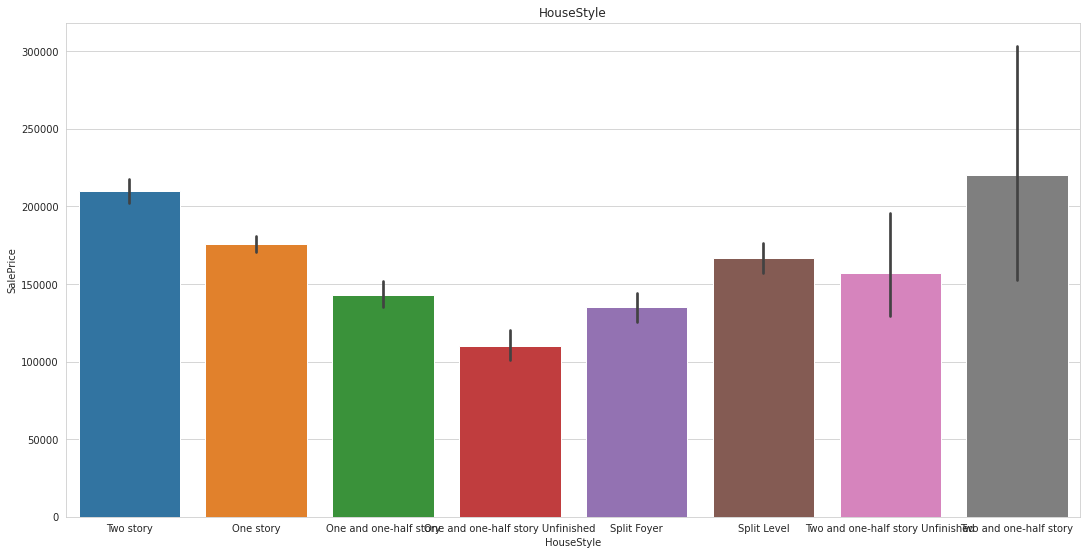

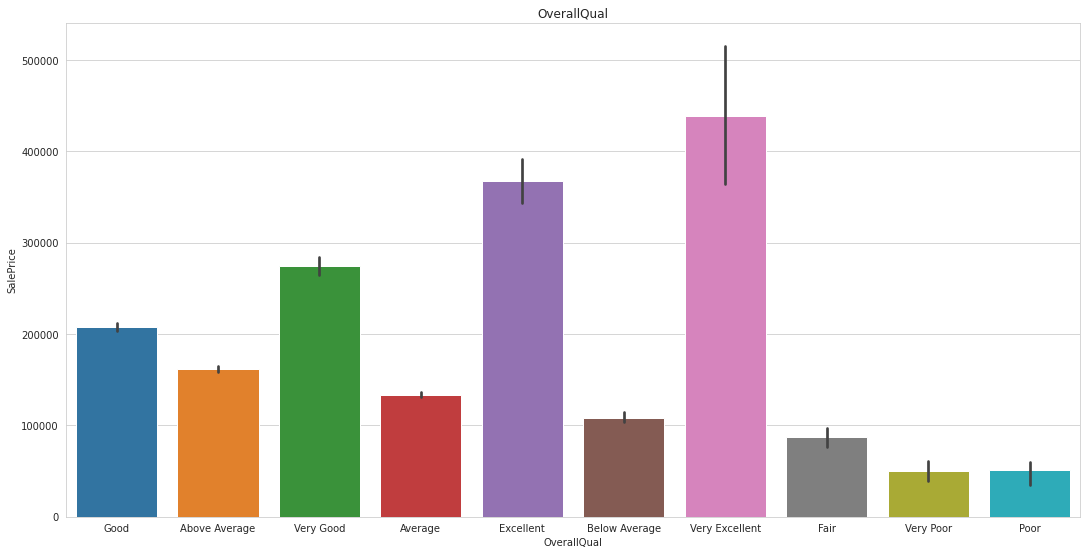

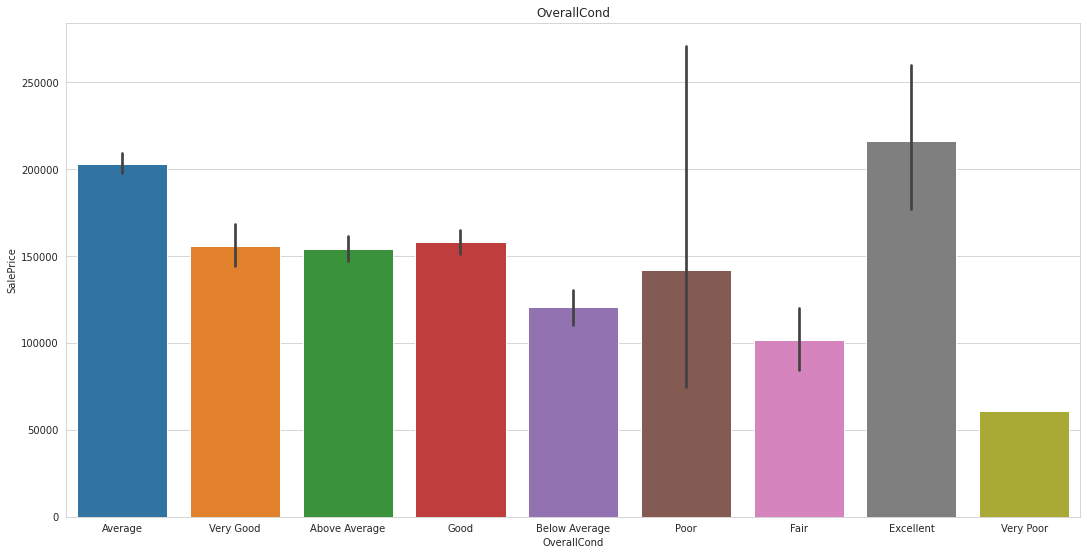

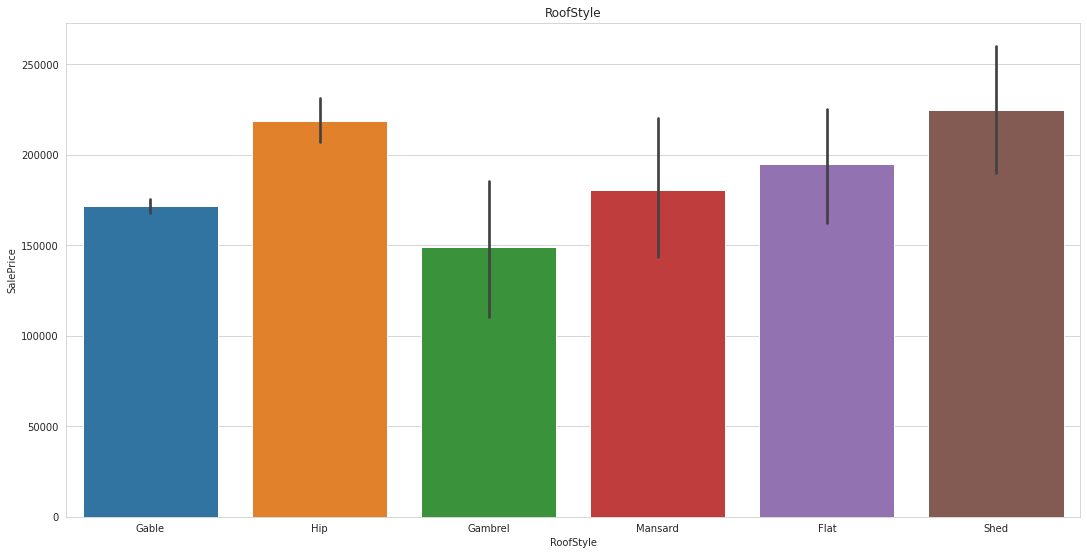

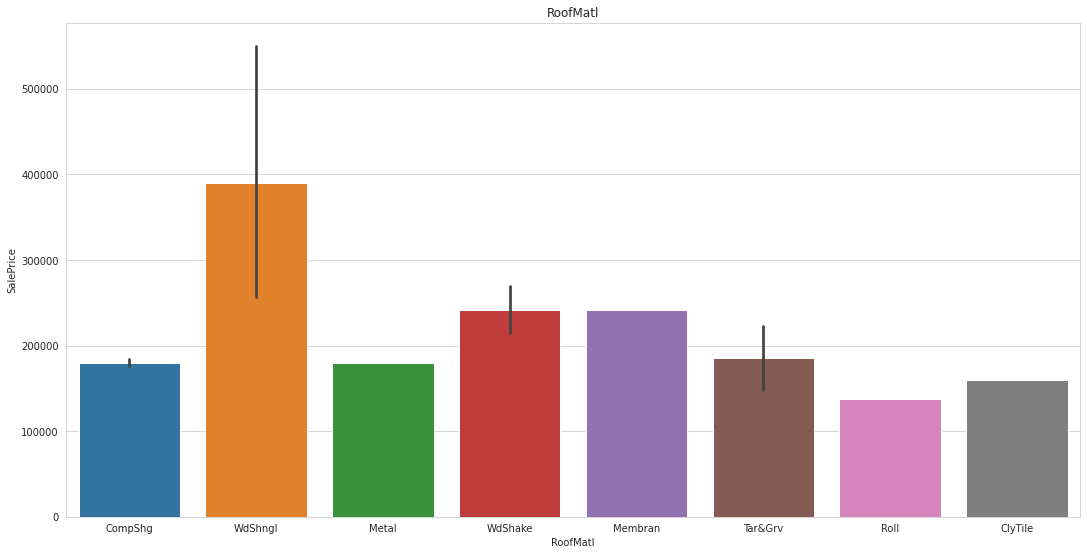

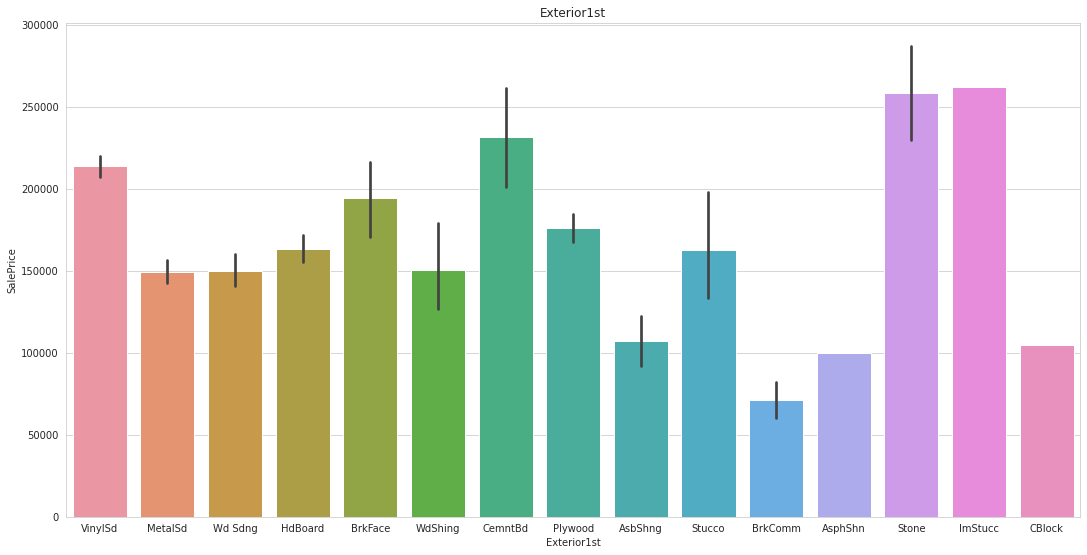

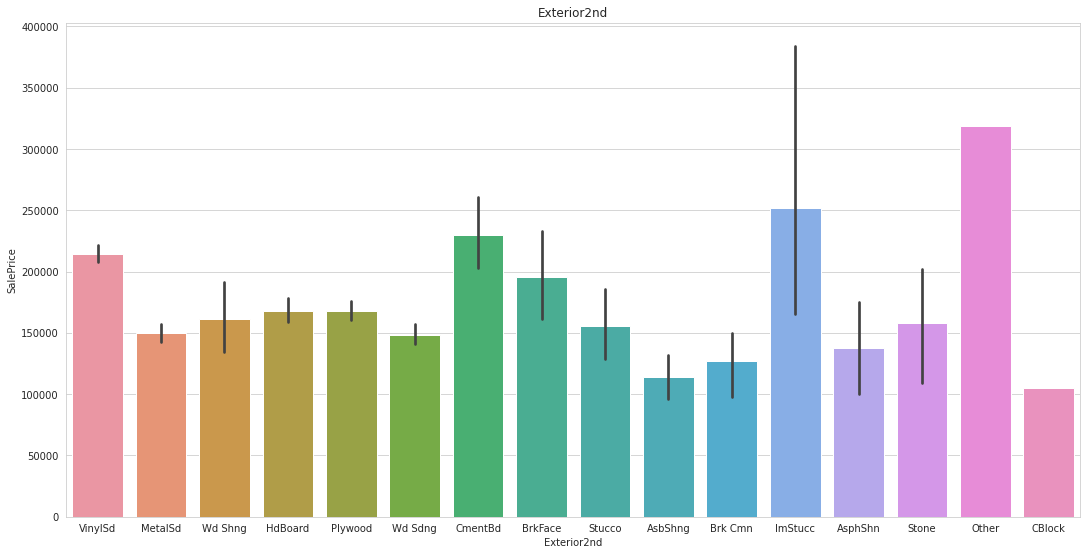

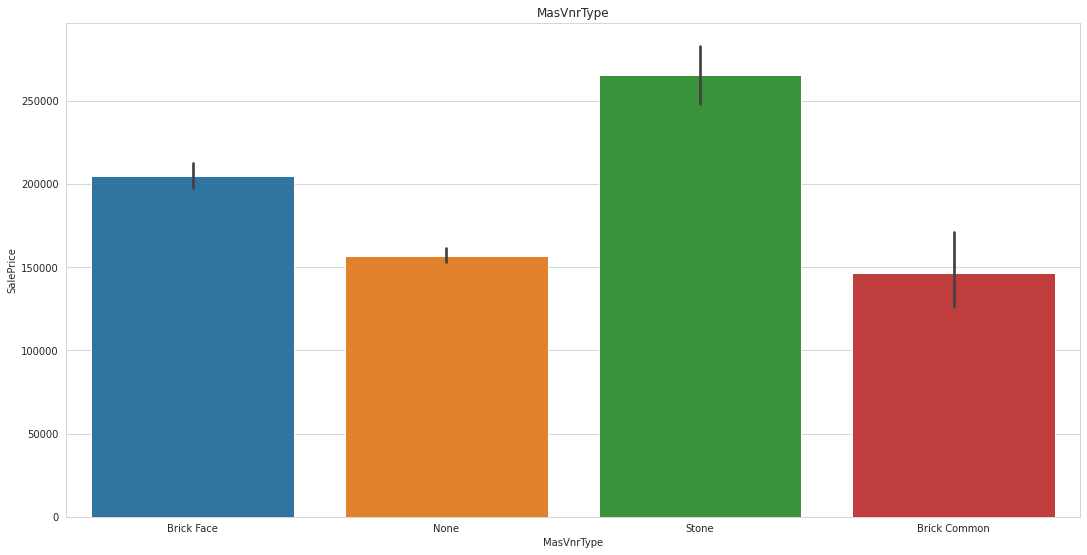

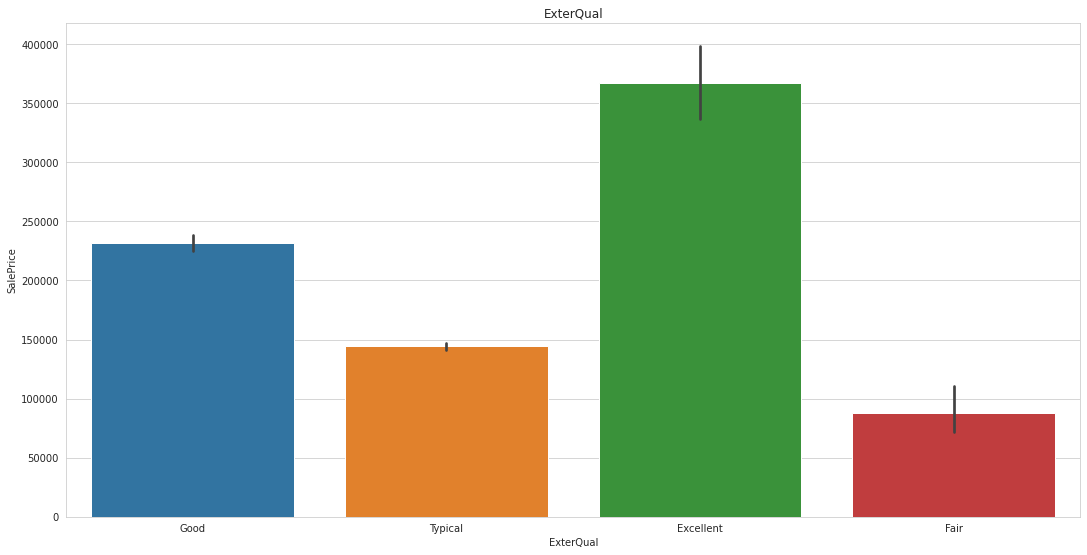

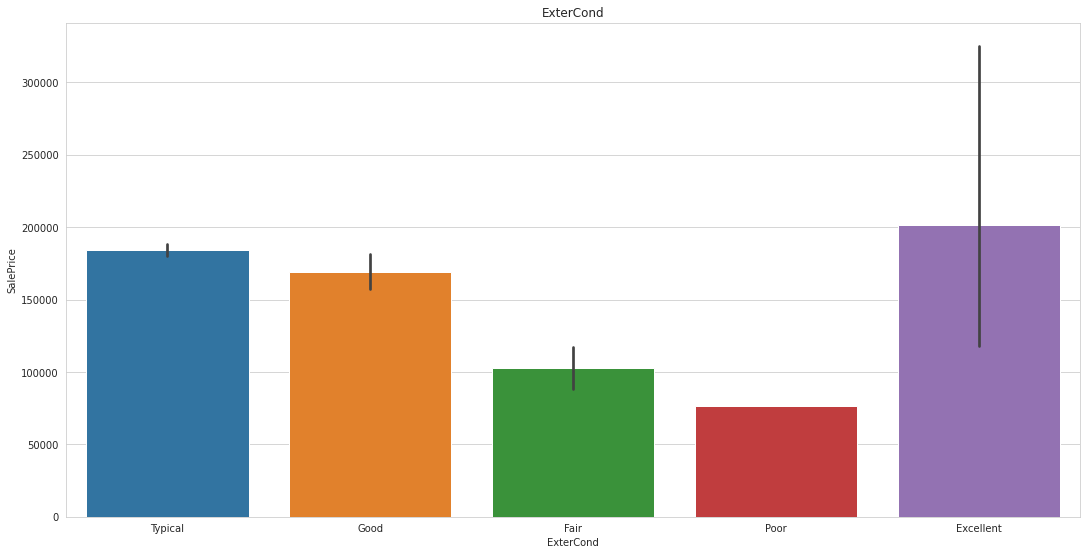

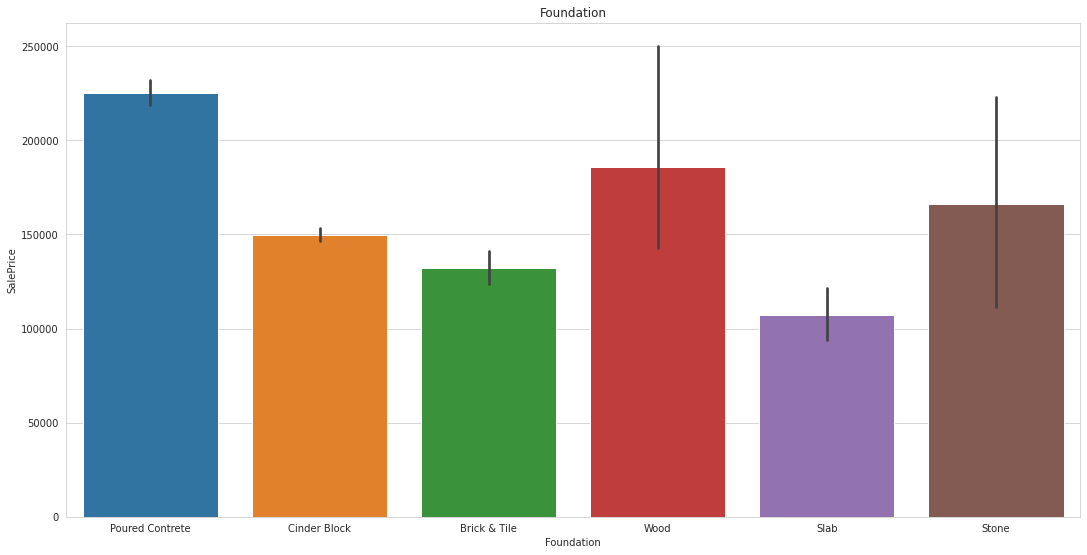

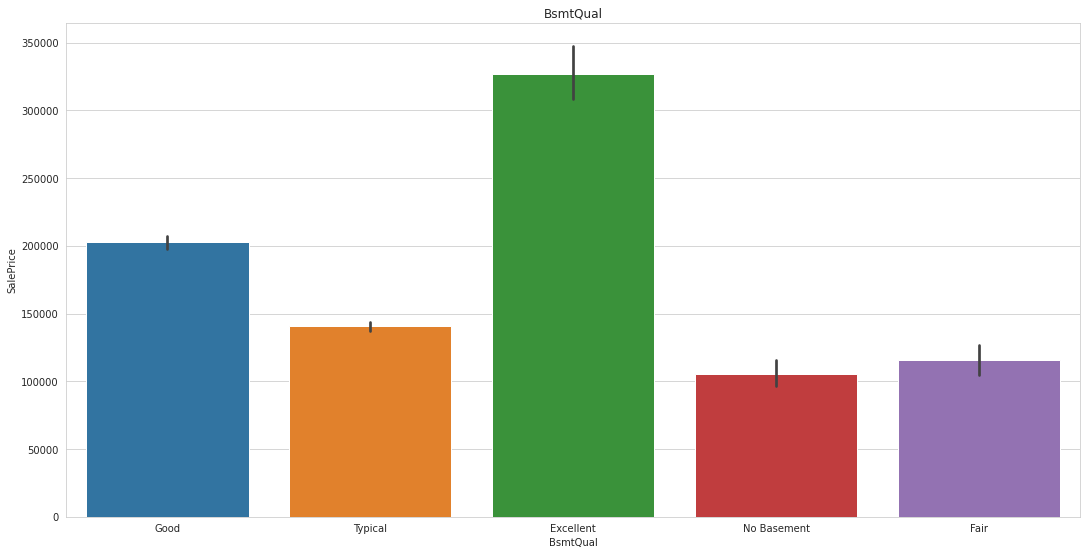

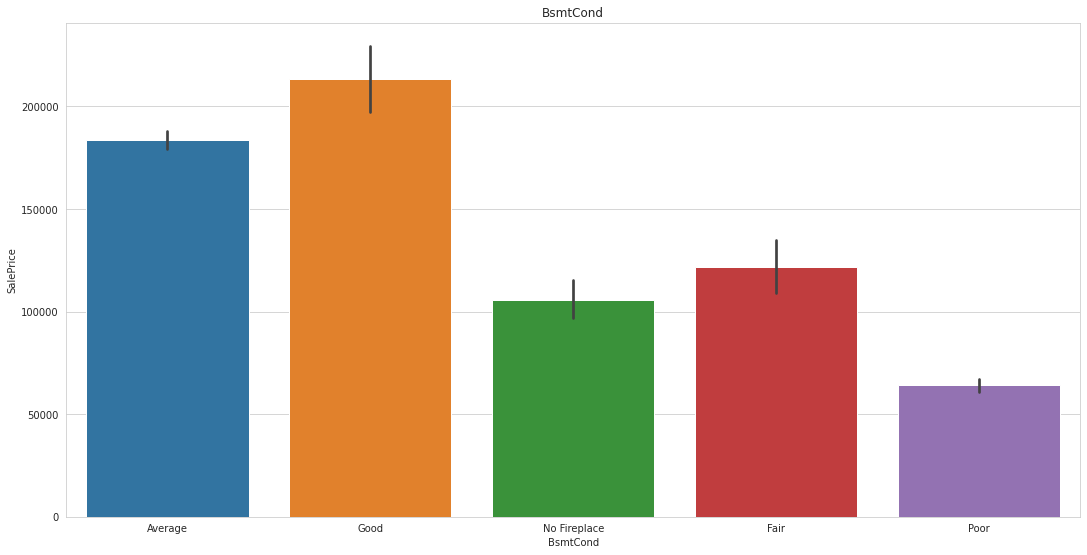

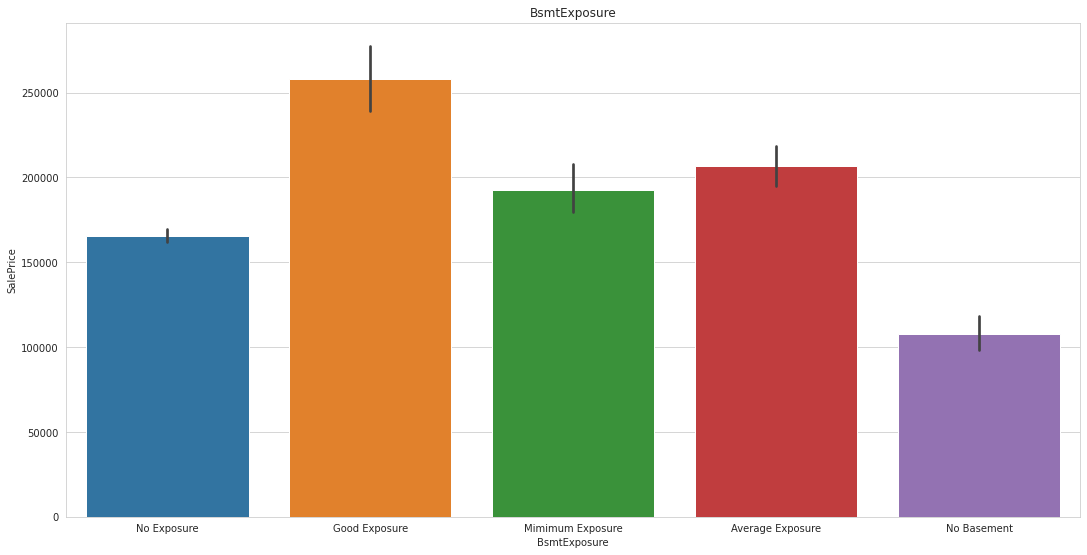

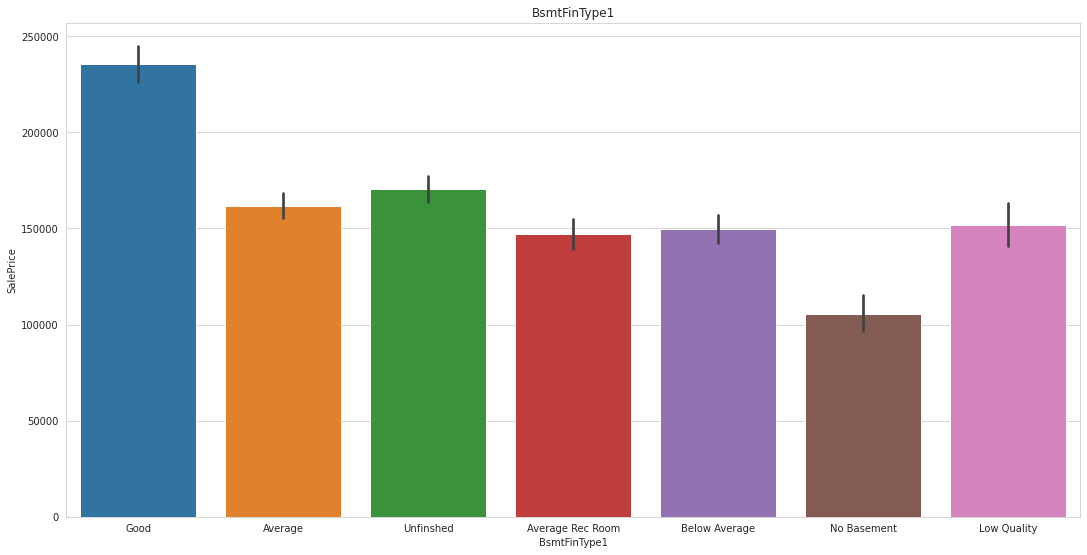

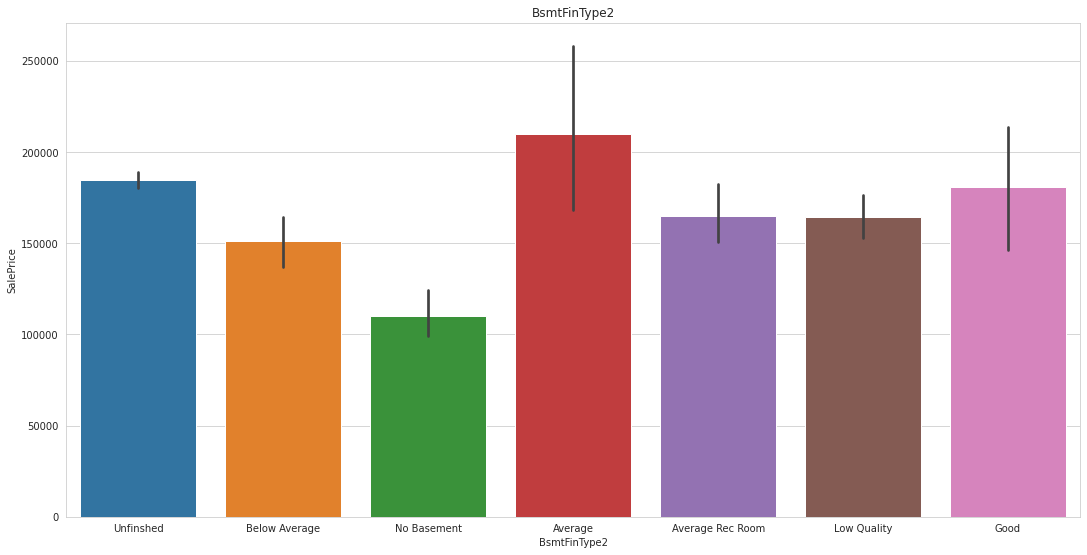

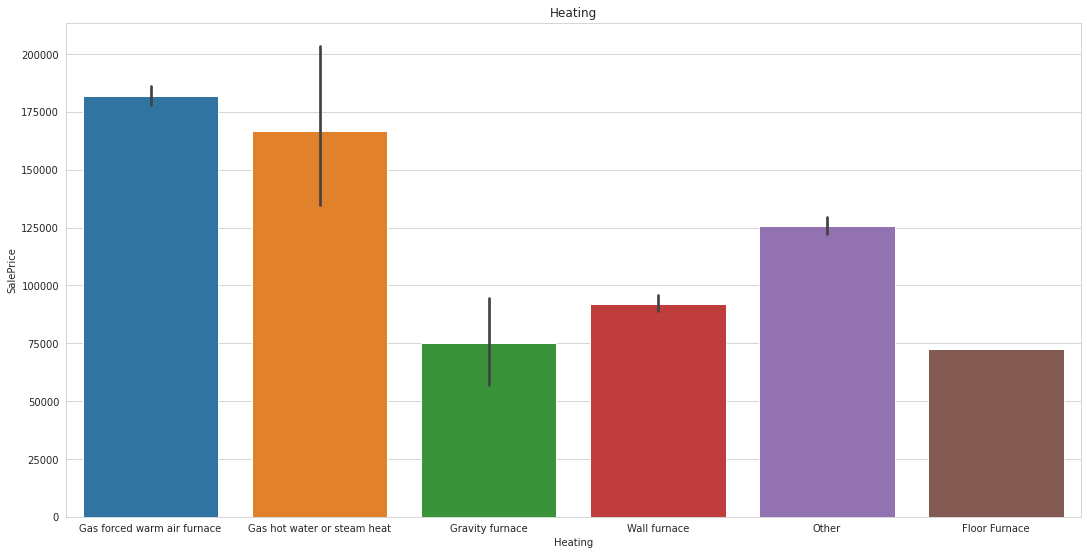

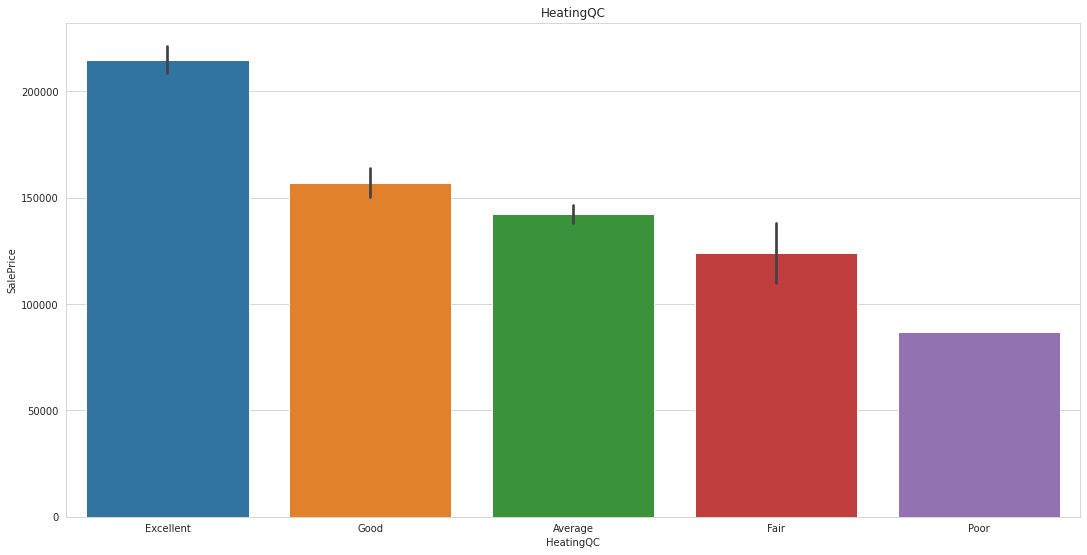

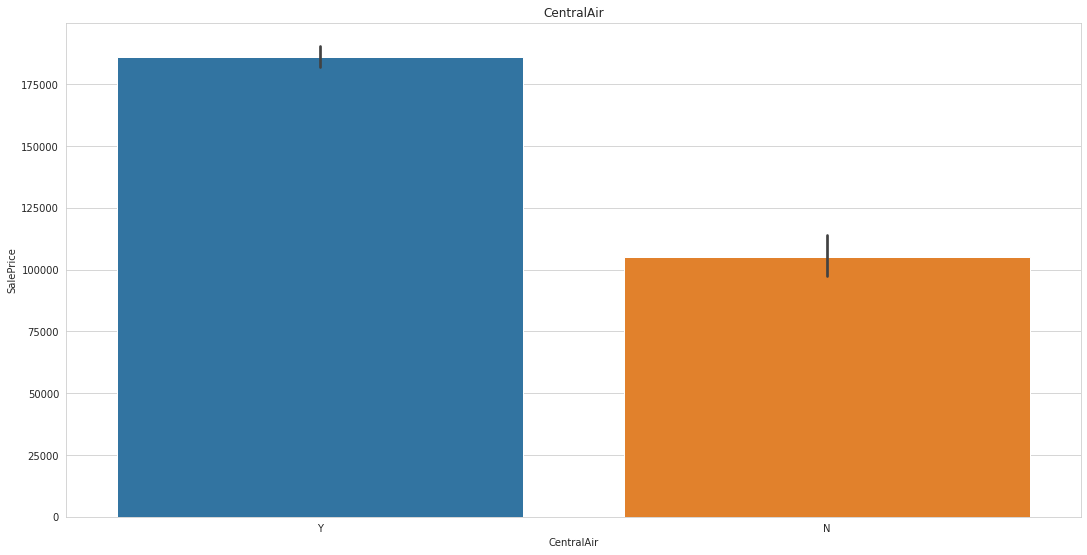

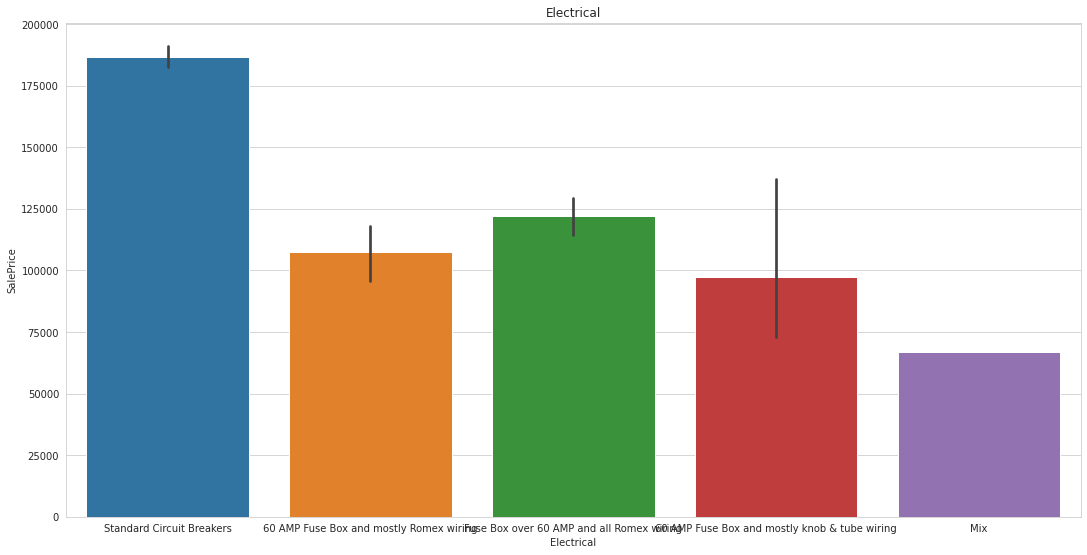

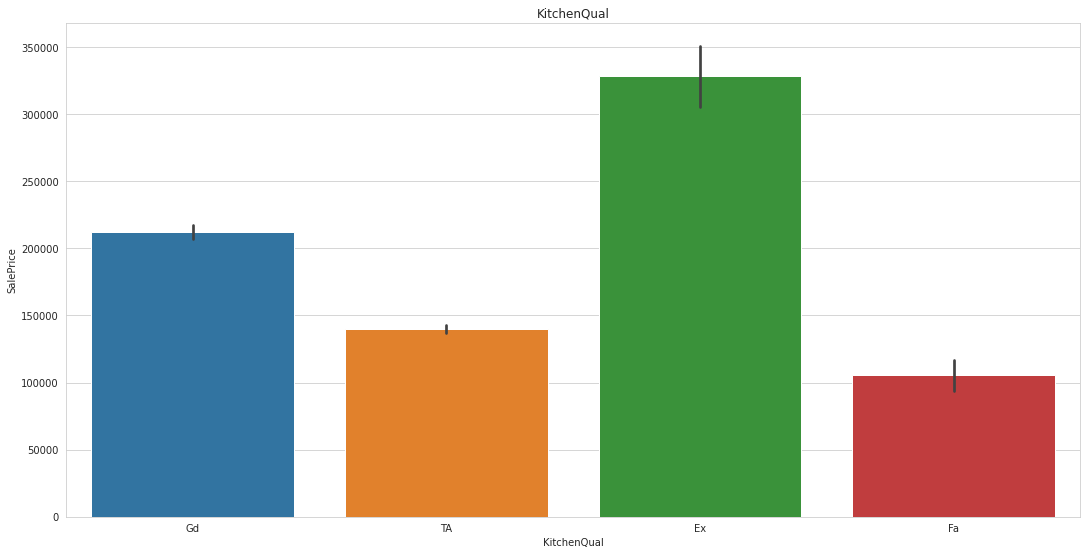

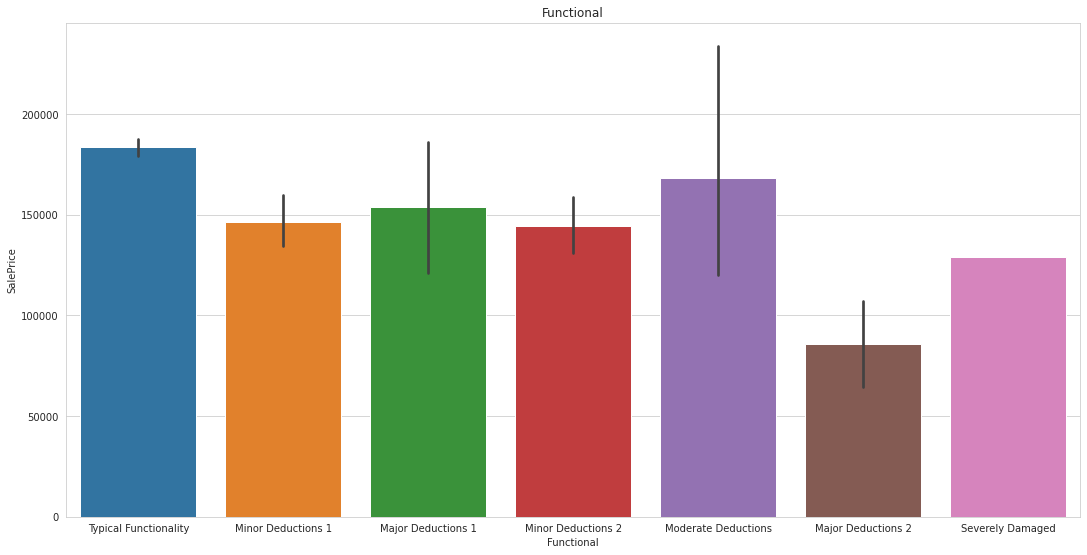

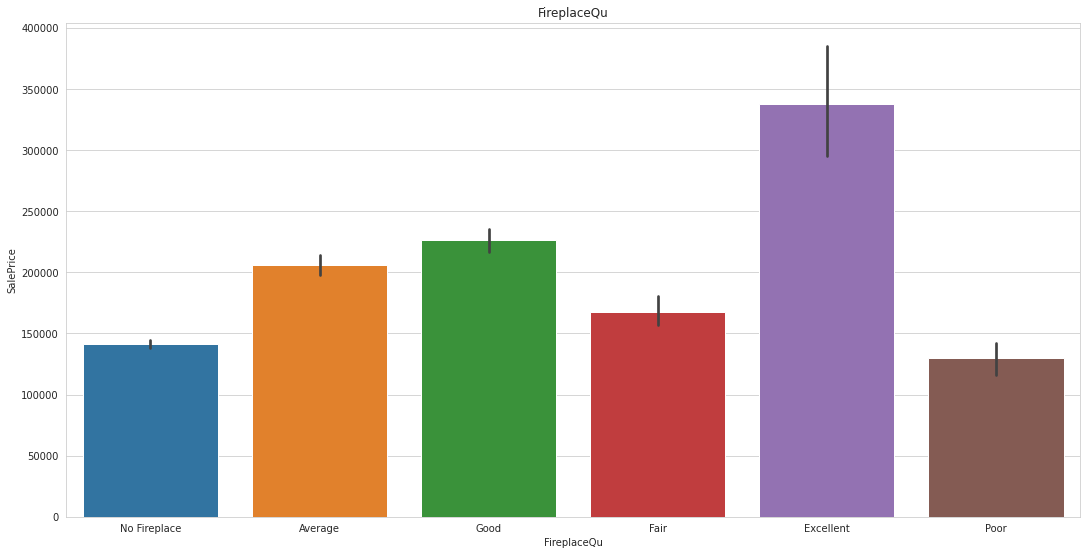

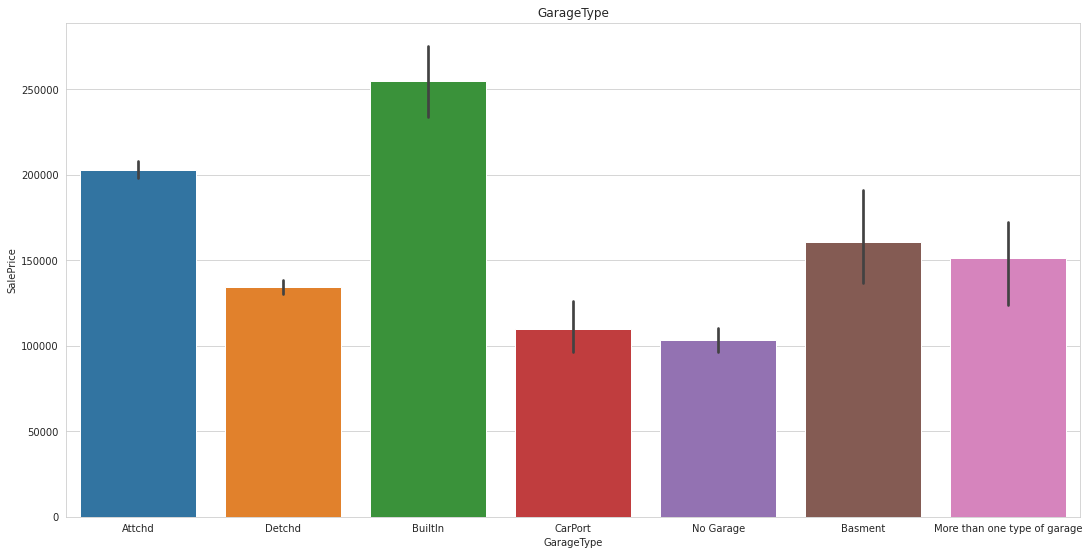

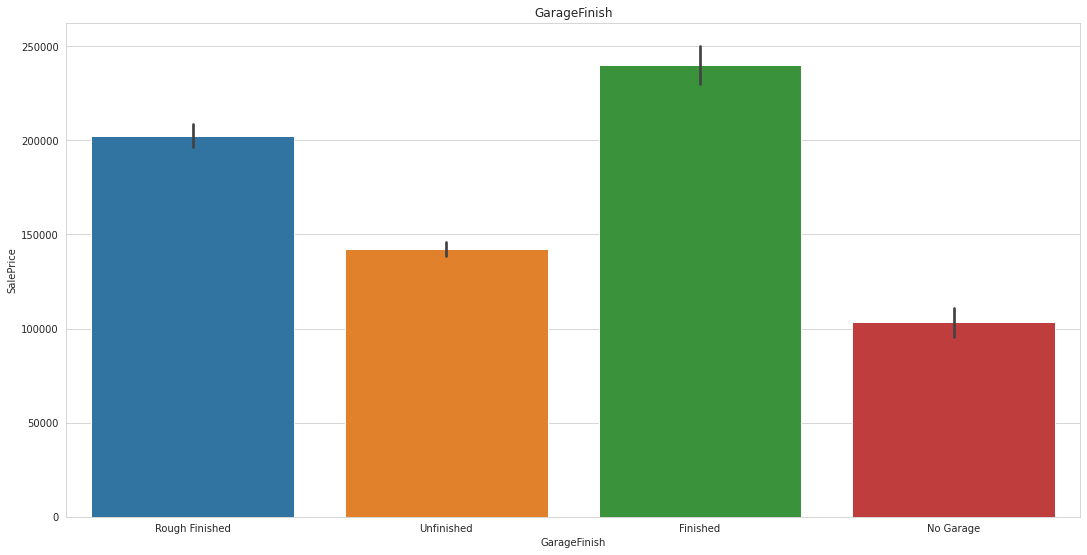

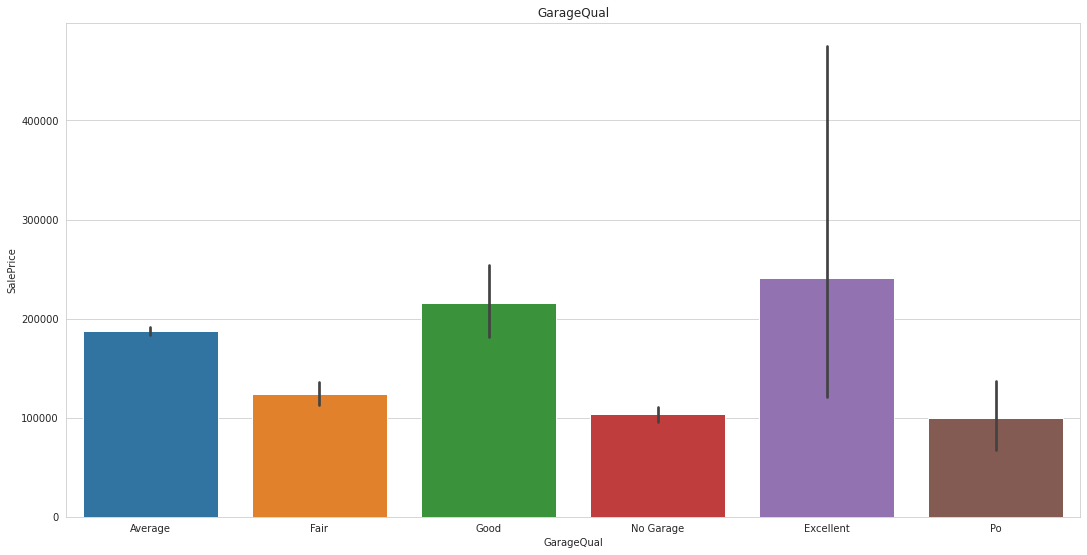

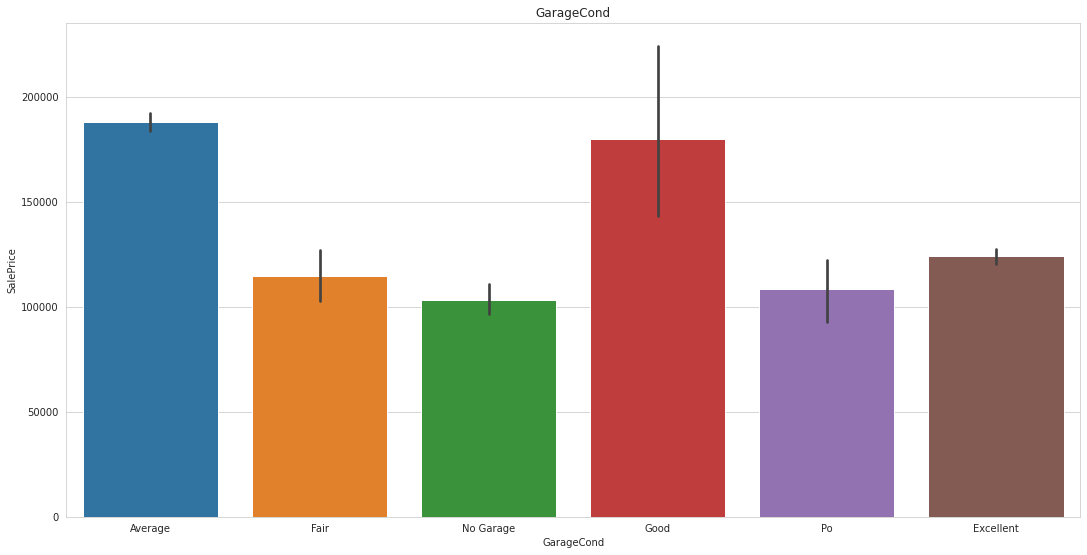

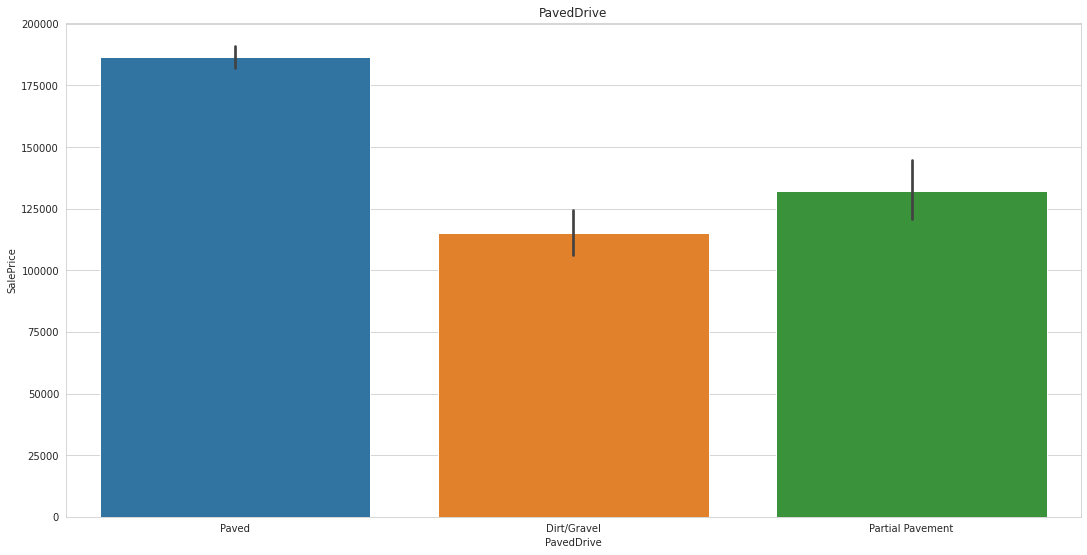

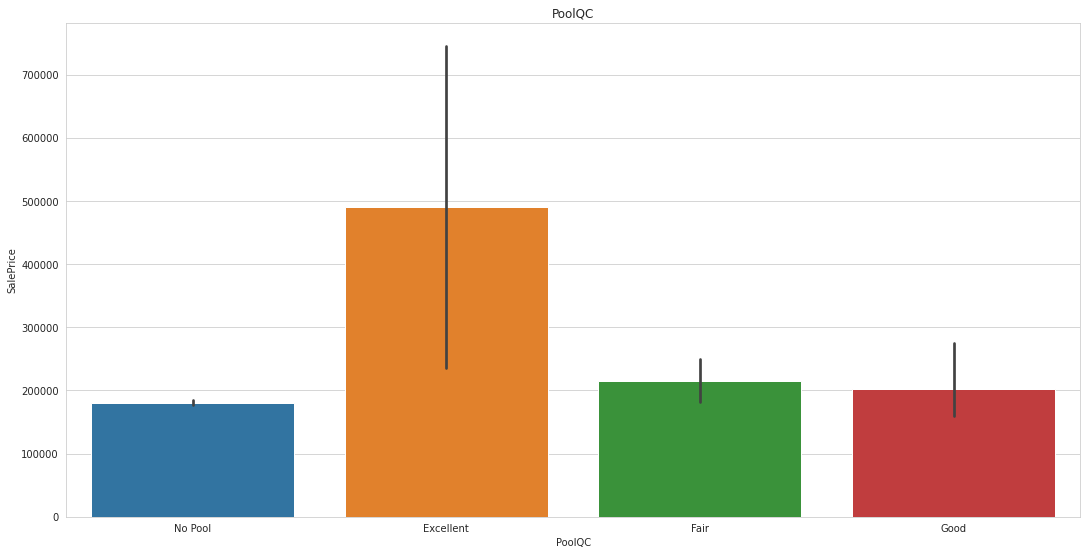

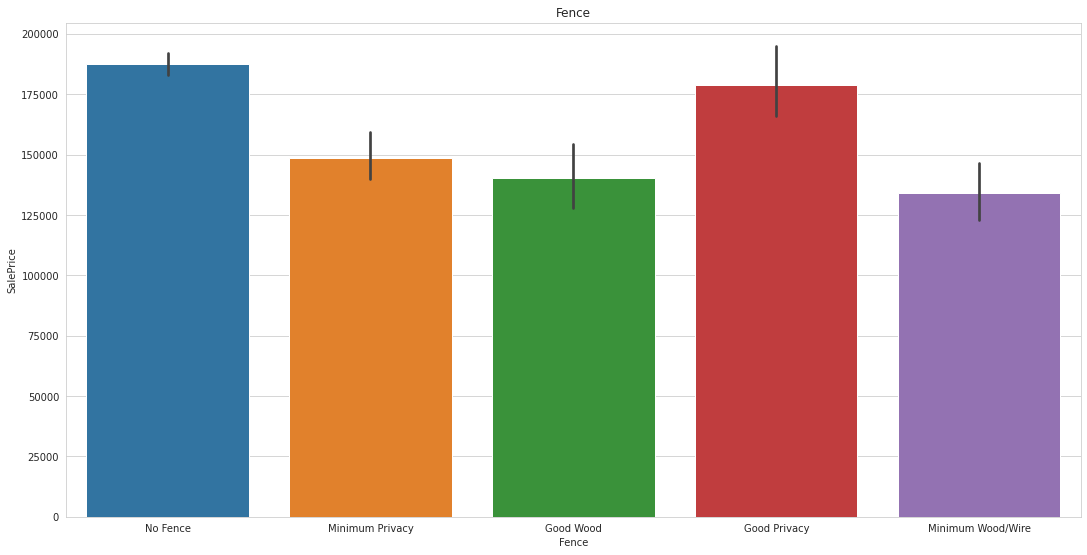

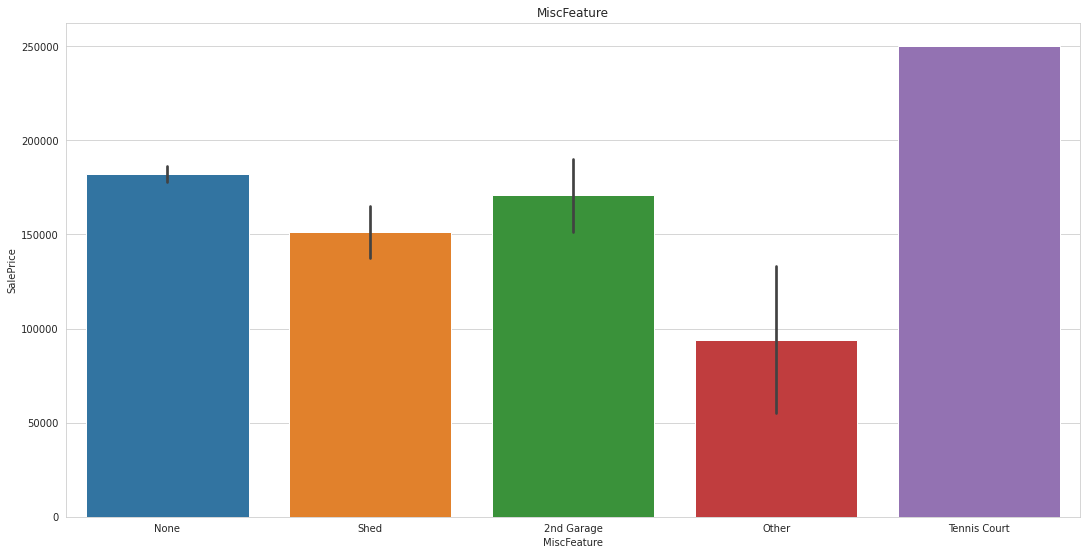

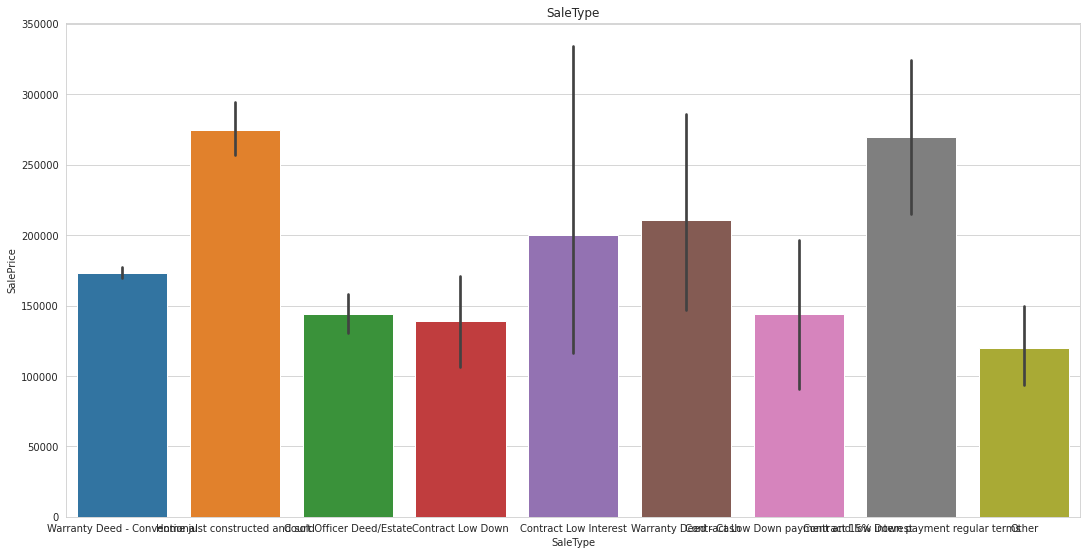

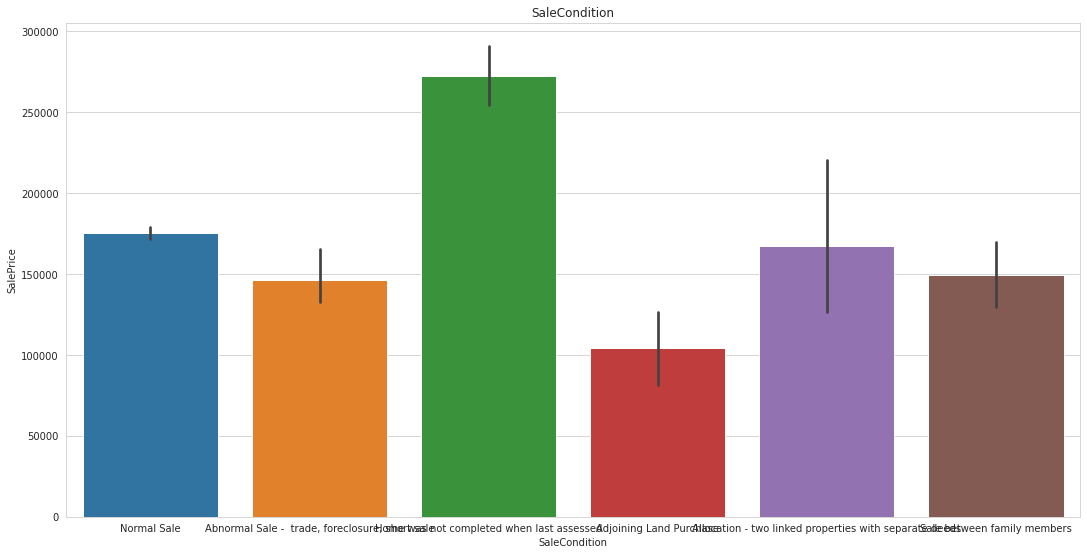

In [78]:
for i in df.columns:
  x = df[i].dtypes
  if x == 'object':
    #print('yes')
    plt.figure(figsize=(40, 20))
    plt.subplot(2,2,1)
    sns.barplot(data= df, x= i , y= 'SalePrice')
    plt.ylabel("SalePrice")
    plt.title(i)
    
    plt.show()

From the above analysis it is evident that column - utilitites and PoolQC contain only one value therefore droping those columns.

In [79]:
df= df.drop(['PoolQC', 'Utilities'], axis =1)

Analysis the distribution in independent variable.

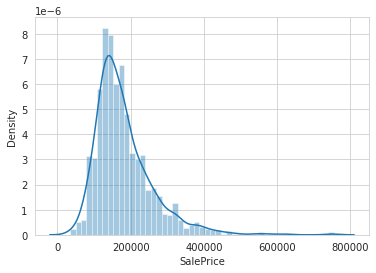

In [80]:
sns.distplot(df['SalePrice']);

In [81]:
print(df['SalePrice'].skew())
print(df['SalePrice'].kurtosis())

1.8828757597682129
6.536281860064529


Both skew and kurtosis is greater than 1 therefore performing the log transform 

In [82]:
df['SalePrice'] = np.log(df['SalePrice'])

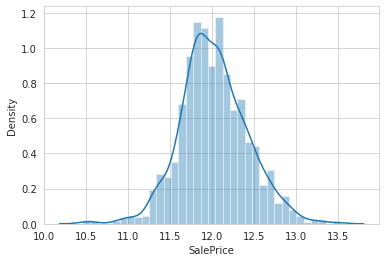

In [83]:
sns.distplot(df['SalePrice']);

#### Analysising the distribution of all numerical features

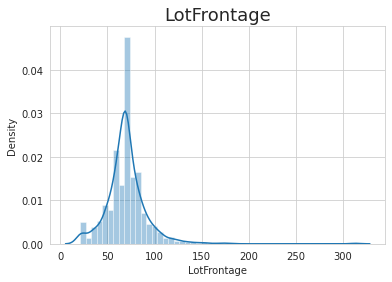

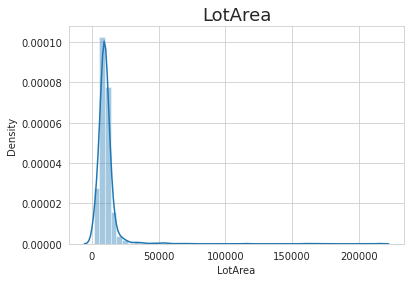

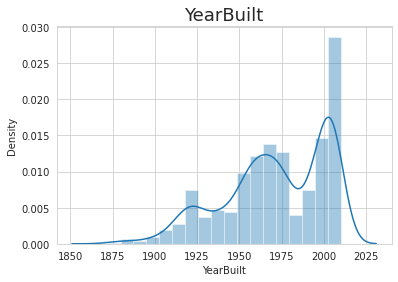

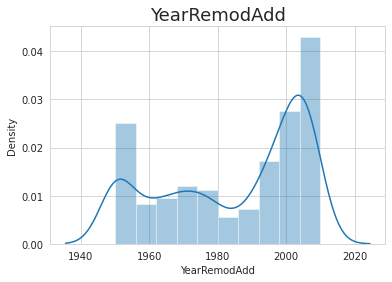

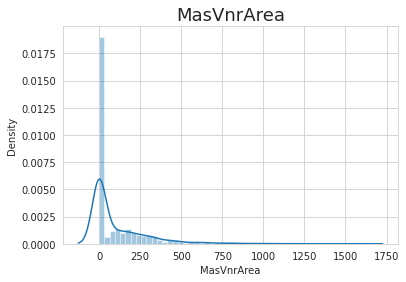

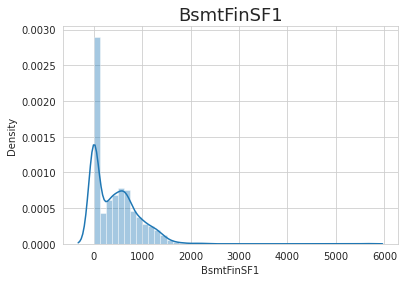

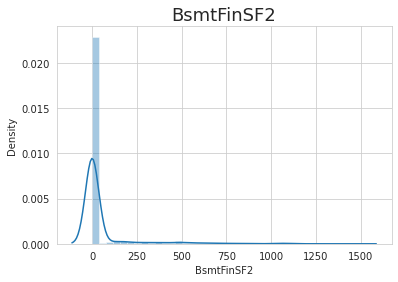

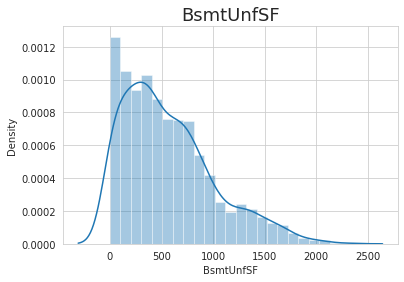

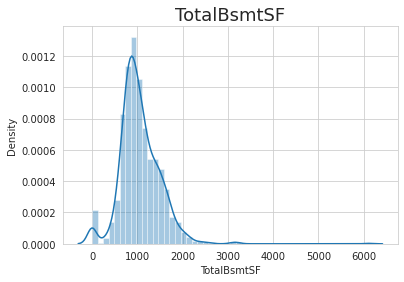

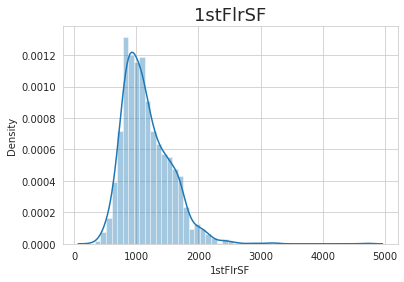

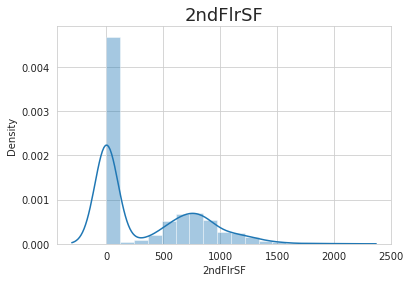

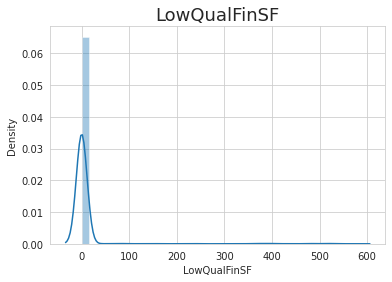

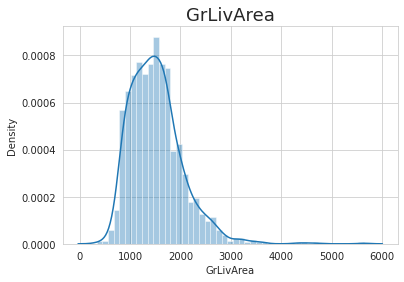

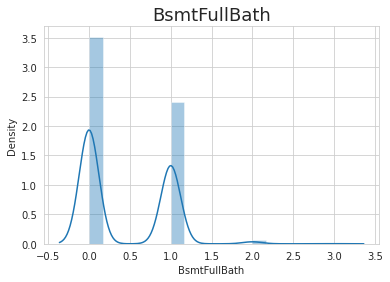

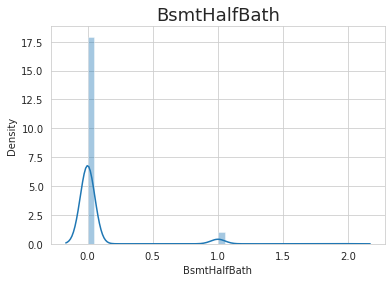

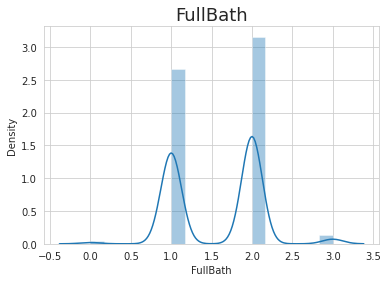

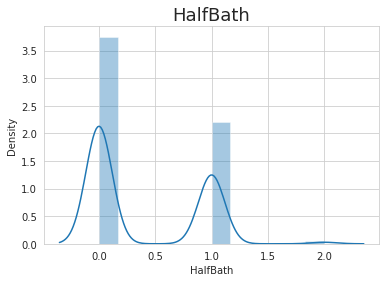

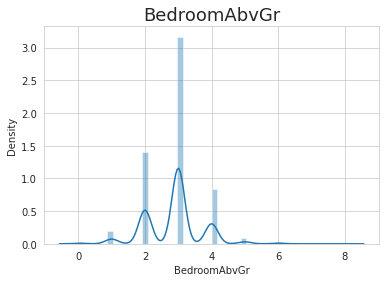

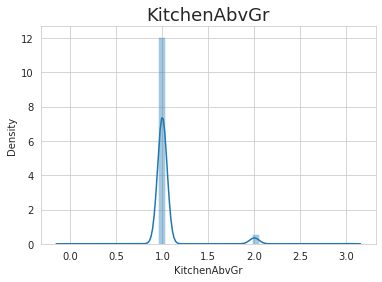

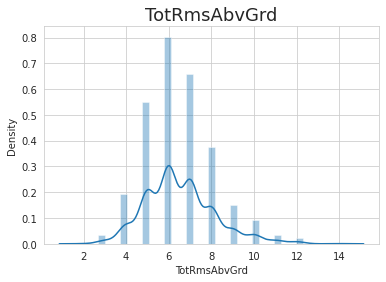

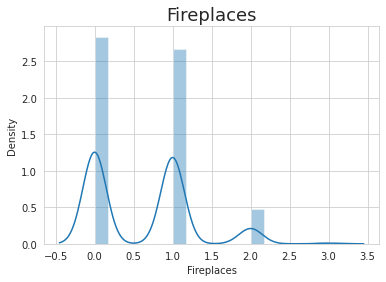

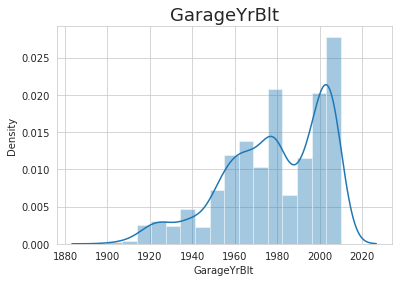

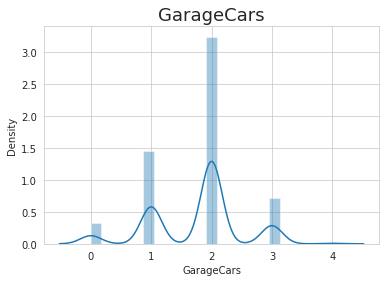

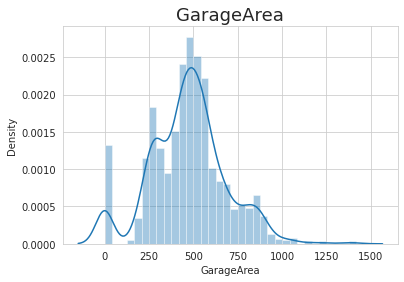

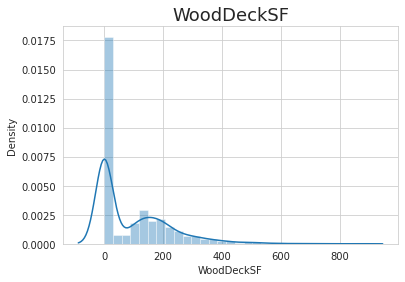

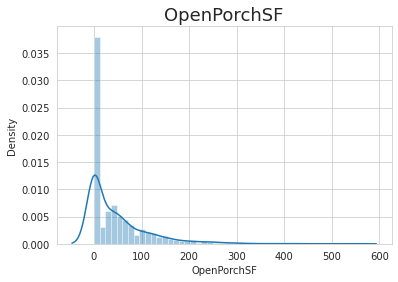

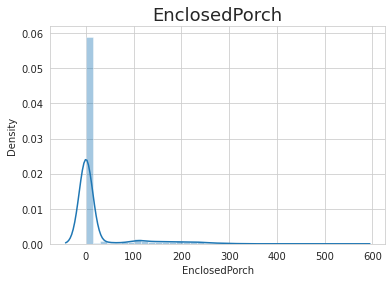

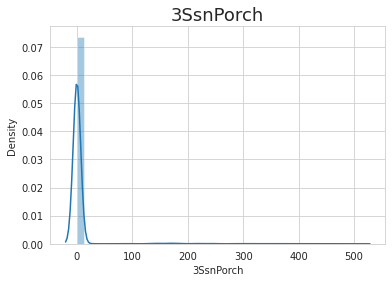

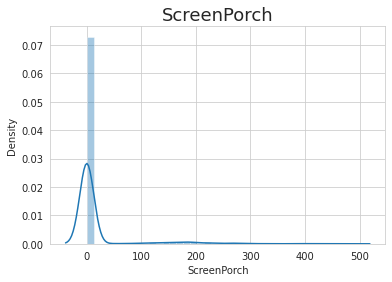

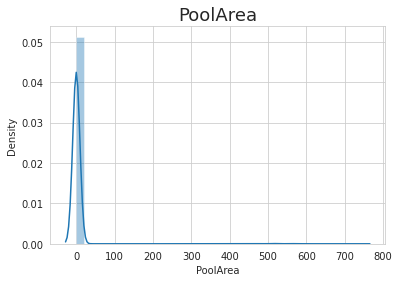

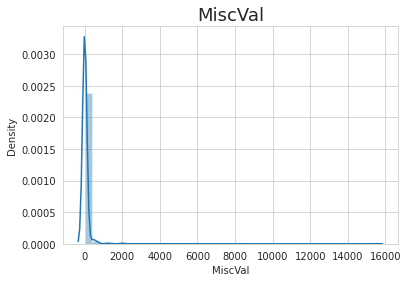

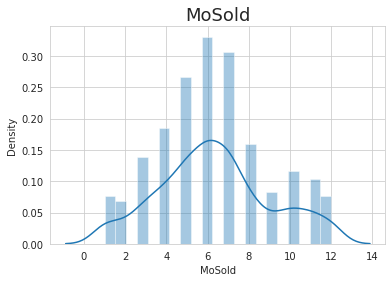

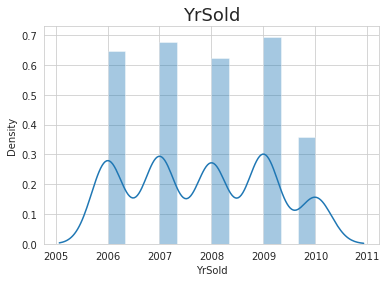

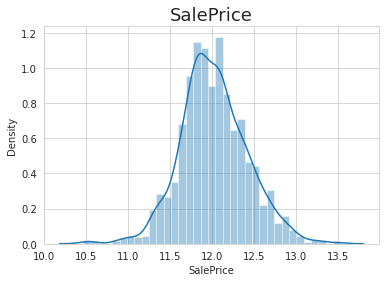

In [84]:
for i in df.select_dtypes(['int64','float64']):
  plt.title(i, fontdict={'fontsize': 18})
  sns.distplot(df[i])
  plt.show()

Looking for outliers.

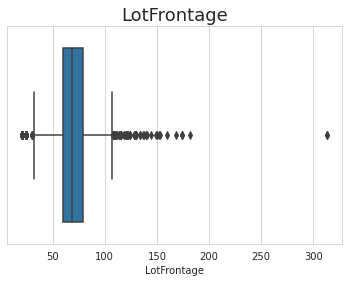

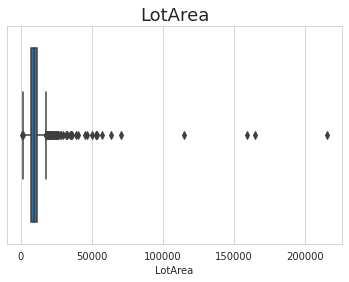

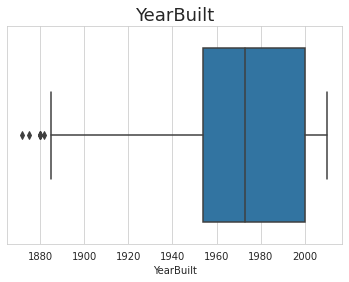

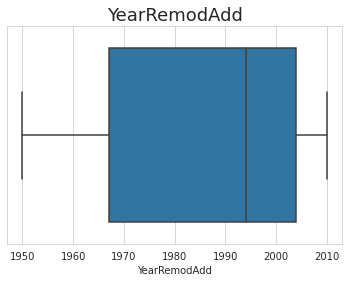

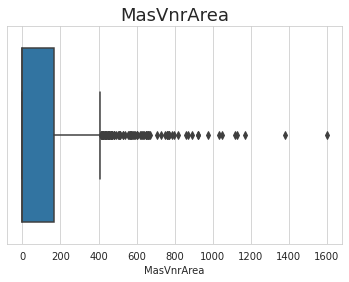

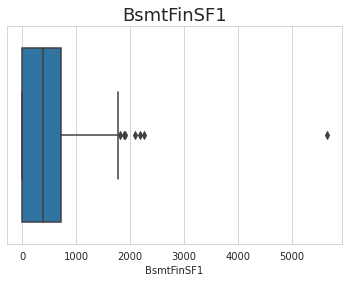

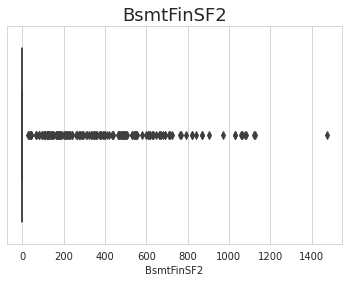

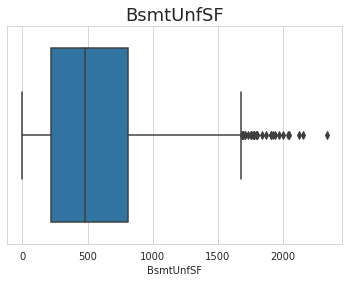

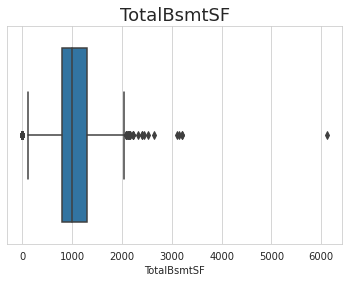

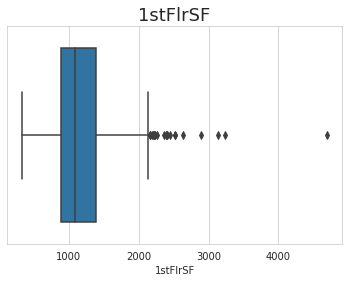

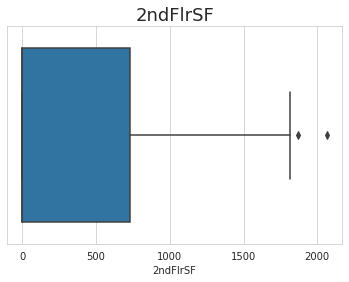

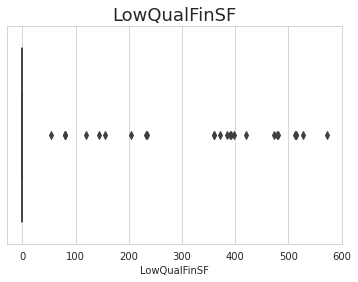

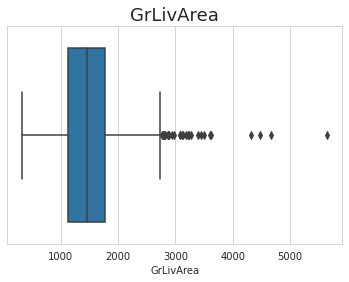

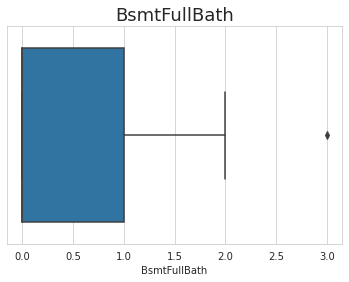

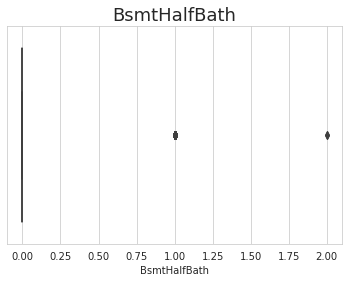

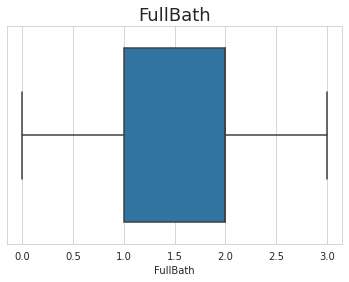

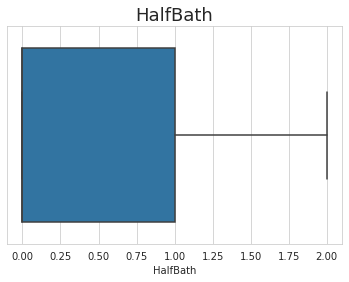

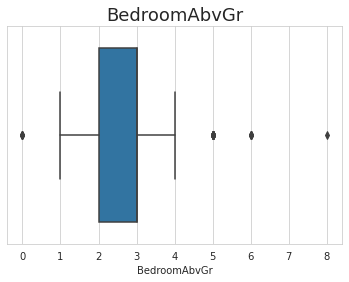

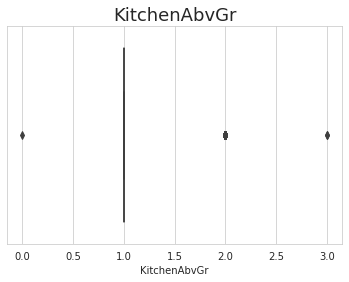

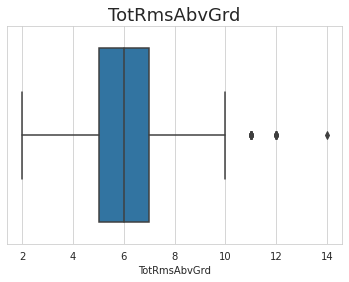

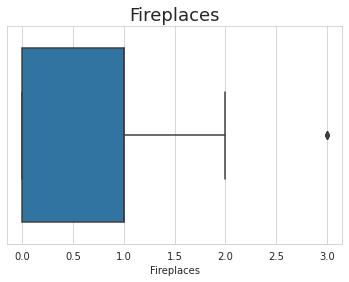

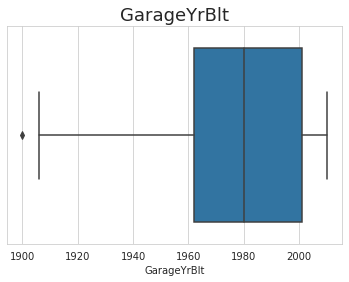

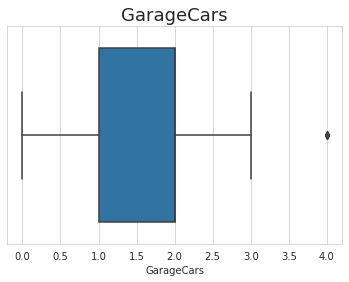

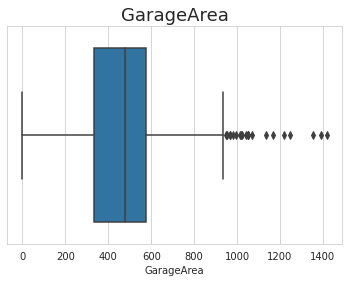

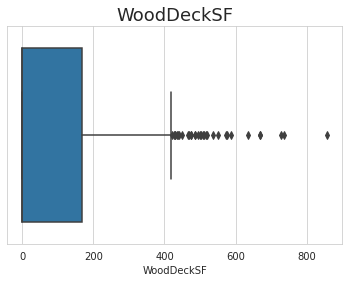

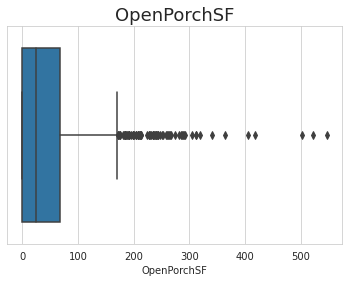

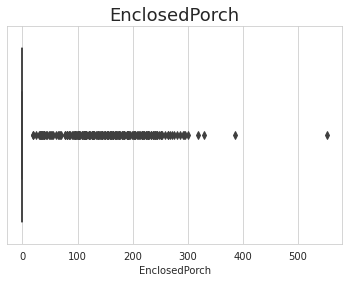

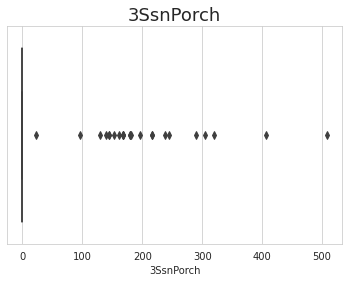

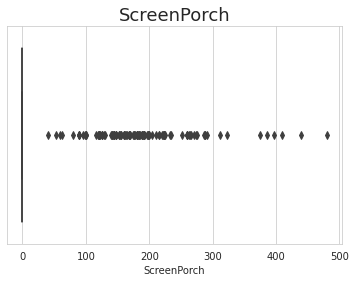

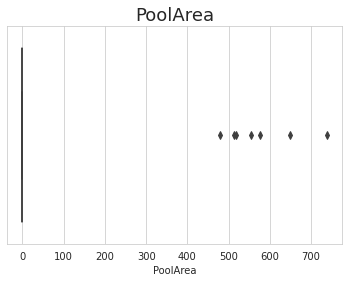

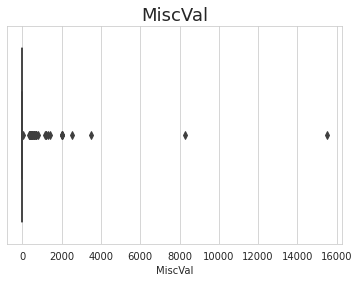

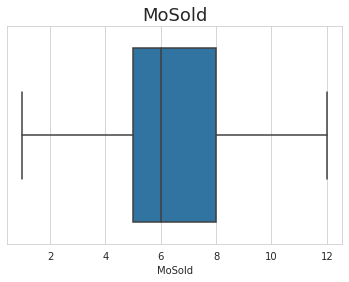

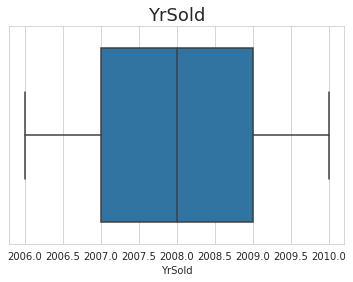

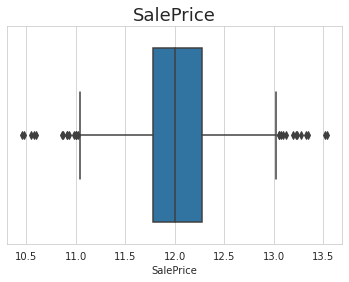

In [85]:
for i in df.select_dtypes(['int64','float64']):
  plt.title(i, fontdict={'fontsize': 18})
  sns.boxplot(df[i])
  plt.show()

From the above analysis on numerical data, it is evident that the Outliers are present in few features and Also, most of the columns are not normally distributed.

### Outlier

In [86]:
Outlier_col = ['MasVnrArea','LotFrontage','LotArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','BsmtFullBath','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']

In [87]:
df[Outlier_col].describe()

,MasVnrArea,LotFrontage,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,103.117123,69.863699,10516.828082,443.639726,46.549315,567.240411,0.425342,1057.429452,1162.626712,346.992466,5.844521,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041
std,180.731373,22.027677,9981.264932,456.098091,161.319273,441.866955,0.518911,438.705324,386.587738,436.528436,48.623081,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024
min,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,60.000000,7553.500000,0.000000,0.000000,223.000000,0.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,69.000000,9478.500000,383.500000,0.000000,477.500000,0.000000,991.500000,1087.000000,0.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,164.250000,79.000000,11601.500000,712.250000,0.000000,808.000000,1.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1600.000000,313.000000,215245.000000,5644.000000,1474.000000,2336.000000,3.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000


Handling the outliers

In [88]:
for i in Outlier_col:
  df[i][df[i] <= df[i].quantile(0.05)] = df[i].quantile(0.05)
  df[i][df[i] >= df[i].quantile(0.95)] = df[i].quantile(0.95)
  #print(df[i])

In [89]:
df[Outlier_col].describe()

,MasVnrArea,LotFrontage,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.0,1460.0
mean,92.047945,69.112568,9682.319212,431.089041,32.931233,556.537671,0.413699,1055.950616,1151.861370,337.731267,0.0,1498.922123,468.187877,88.889726,42.864829,19.154075,0.0,11.580822,0.0,0.0
std,140.590668,16.509008,3469.967624,412.214952,100.569218,414.582219,0.492665,346.901853,333.684061,415.255848,0.0,450.732225,202.064708,109.391899,53.144211,50.385647,0.0,40.117506,0.0,0.0
min,0.000000,35.950000,3311.700000,0.000000,0.000000,0.000000,0.000000,519.300000,672.950000,0.000000,0.0,848.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
25%,0.000000,60.000000,7553.500000,0.000000,0.000000,223.000000,0.000000,795.750000,882.000000,0.000000,0.0,1129.500000,334.500000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
50%,0.000000,69.000000,9478.500000,383.500000,0.000000,477.500000,0.000000,991.500000,1087.000000,0.000000,0.0,1464.000000,480.000000,0.000000,25.000000,0.000000,0.0,0.000000,0.0,0.0
75%,164.250000,79.000000,11601.500000,712.250000,0.000000,808.000000,1.000000,1298.250000,1391.250000,728.000000,0.0,1776.750000,576.000000,168.000000,68.000000,0.000000,0.0,0.000000,0.0,0.0
max,456.000000,104.000000,17401.150000,1274.000000,396.200000,1468.000000,1.000000,1753.000000,1831.250000,1141.050000,0.0,2466.100000,850.100000,335.000000,175.050000,180.150000,0.0,160.000000,0.0,0.0


dropping the columns - LowQualFinSF, 3SsnPorch, ScreenPorch, PoolArea, Miscval because the all the values in this column is 0 after the removing the outliers.

In [90]:
df = df.drop(['LowQualFinSF','3SsnPorch', 'PoolArea', 'MiscVal'], axis =1)

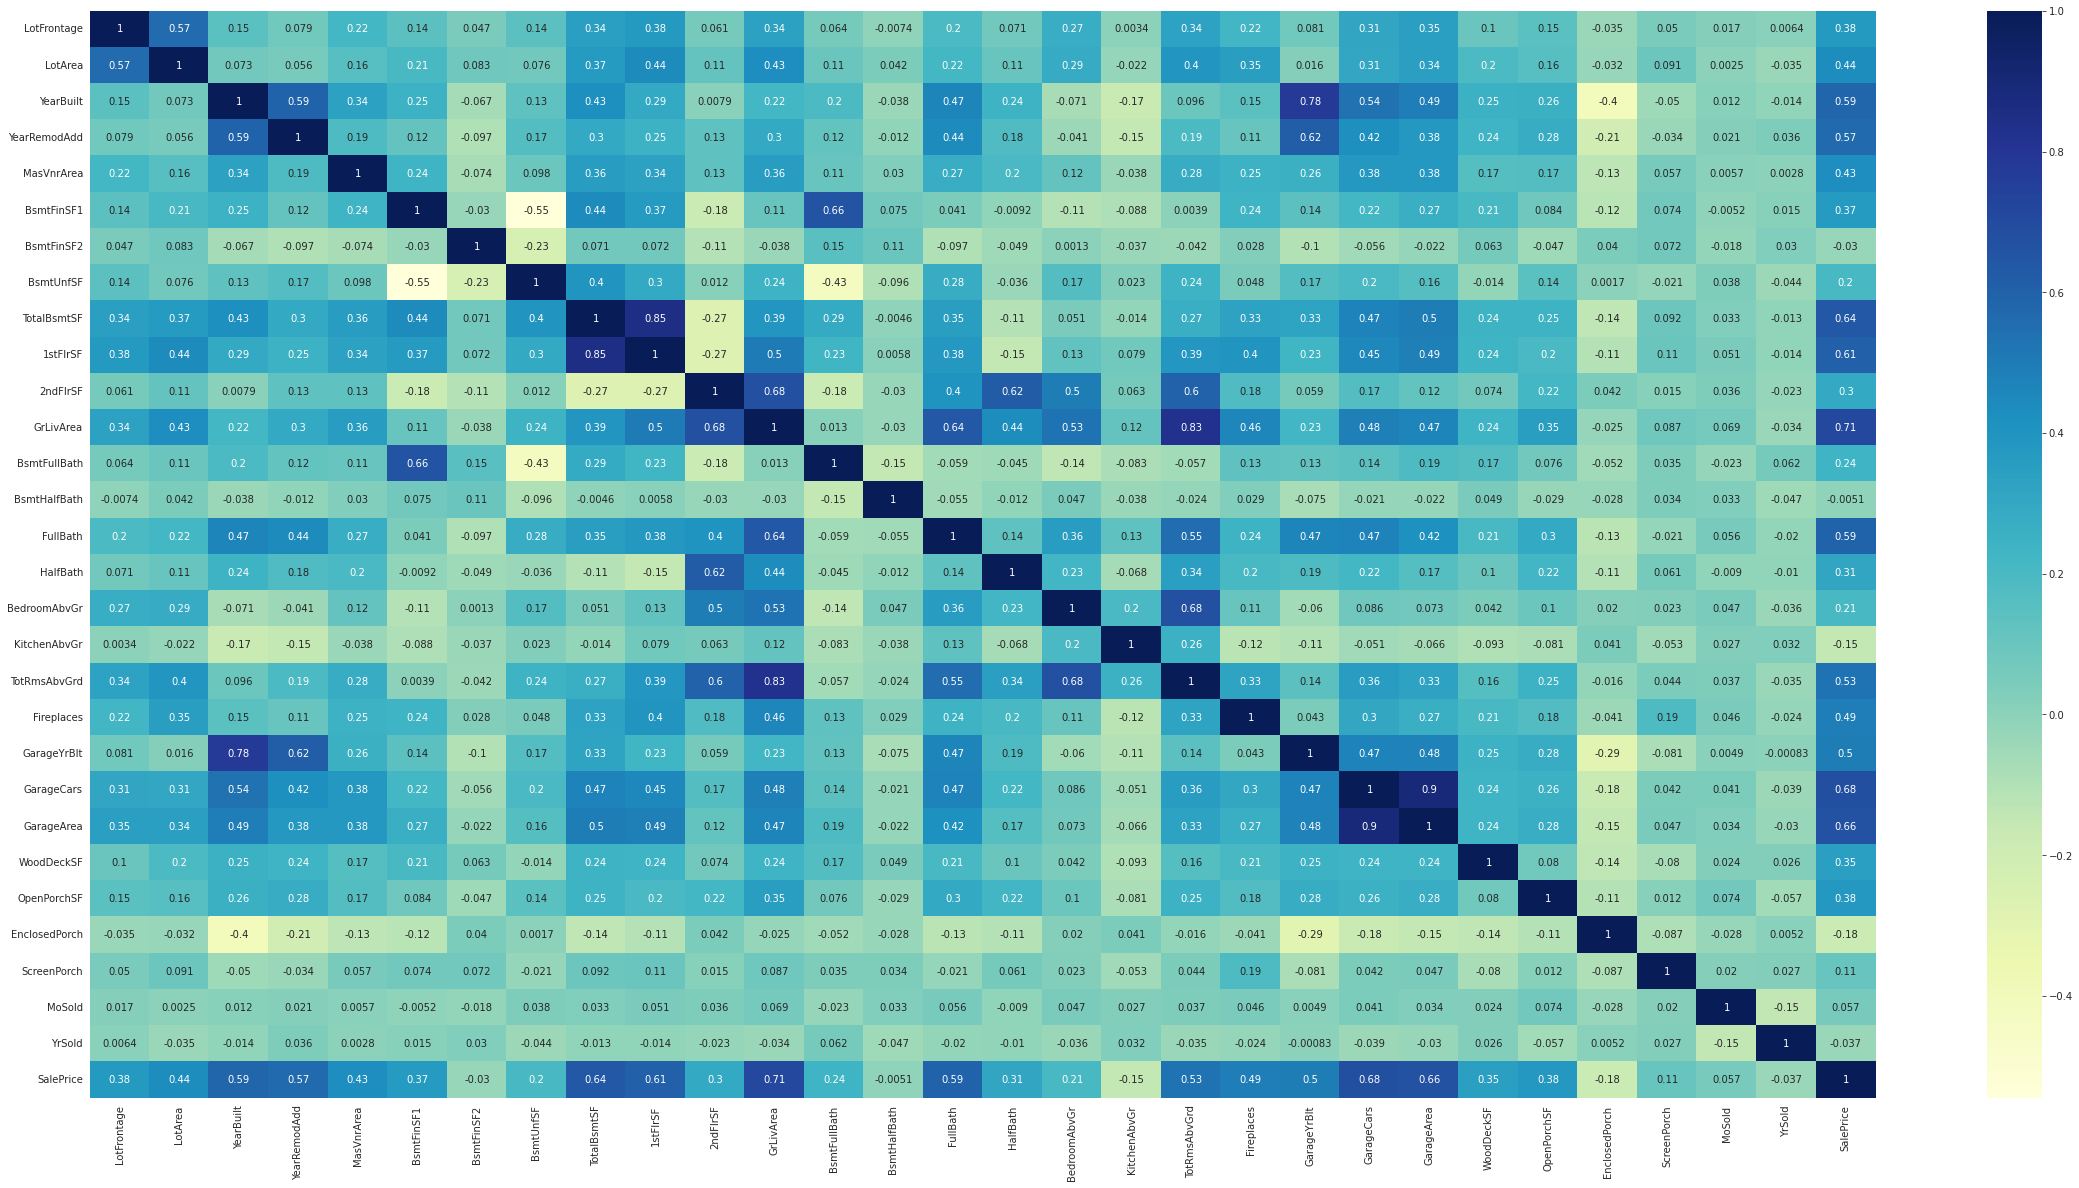

In [91]:
sns.set_style("whitegrid")
plt.figure(figsize=(40, 20))
sns.heatmap(data=df.corr(), cmap='YlGnBu', annot=True)
plt.show()

Multicollinearity is present in the data. Removing the columns with high correlation.

In [92]:
df = df.drop(['GrLivArea','GarageCars', 'TotalBsmtSF'],axis =1)

### Derived Columns

In [93]:
df_cat = pd.get_dummies(df.select_dtypes(include='object'), drop_first=True)

In [94]:
data = pd.concat([df.select_dtypes(include=['int64','float64']),df_cat], axis=1)

In [95]:
data.head(5)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,...,SaleType_Court Officer Deed/Estate,SaleType_Home just constructed and sold,SaleType_Other,SaleType_Warranty Deed - Cash,SaleType_Warranty Deed - Conventional,SaleCondition_Adjoining Land Purchase,SaleCondition_Allocation - two linked properties with separate deeds,SaleCondition_Home was not completed when last assessed,SaleCondition_Normal Sale,SaleCondition_Sale between family members
0,65.0,8450.0,2003,2003,196.0,706,0.0,150,856.0,854.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600.0,1976,1976,0.0,978,0.0,284,1262.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250.0,2001,2002,162.0,486,0.0,434,920.0,866.0,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550.0,1915,1970,0.0,216,0.0,540,961.0,756.0,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260.0,2000,2000,350.0,655,0.0,490,1145.0,1053.0,...,0,0,0,0,1,0,0,0,1,0


In [96]:
X = data.drop('SalePrice', axis =1)
y = data['SalePrice']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

Model 1


In [98]:
from sklearn.preprocessing import MinMaxScaler

In [99]:
scale = StandardScaler()

X_train[list(X_train.select_dtypes(include=['int64','float64']))] = scale.fit_transform(X_train[list(X_train.select_dtypes(include=['int64','float64']))])
X_test[list(X_test.select_dtypes(include=['int64','float64']))] = scale.transform(X_test[list(X_test.select_dtypes(include=['int64','float64']))])

### Model Building and Evaluation using Lasso

In [100]:
params = {'alpha': [0.000001,0.00001,0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 0.6, 0.7, 1.0,
                    2.0, 7.0, 10.0, 100, 500, 1000]}
Lass = Lasso()
LassoSearch = GridSearchCV(Lass, params, scoring= 'r2',return_train_score=True)
LassoSearch.fit(X_train,y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1,
                                   0.5, 0.6, 0.7, 1.0, 2.0, 7.0, 10.0, 100, 500,
                                   1000]},
             return_train_score=True, scoring='r2')

In [101]:
Column = list(X_train.columns)
Column

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '1stFlrSF',
 '2ndFlrSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MoSold',
 'YrSold',
 'MSSubClass_1-1/2 STORY FINISHED ALL AGES',
 'MSSubClass_1-STORY 1945 & OLDER',
 'MSSubClass_1-STORY 1946 & NEWER ALL STYLES',
 'MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
 'MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES',
 'MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES',
 'MSSubClass_2-1/2 STORY ALL AGES',
 'MSSubClass_2-STORY 1945 & OLDER',
 'MSSubClass_2-STORY 1946 & NEWER',
 'MSSubClass_2-STORY PUD - 1946 & NEWER',
 'MSSubClass_DUPLEX - ALL STYLES AND AGES',
 'MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
 'MSSubClass_SPLIT FOYER',
 'MSSubClass_SPLIT OR MULTI-LEVEL

In [102]:
LassoSearch.cv_results_


{'mean_fit_time': array([0.28443398, 0.32360449, 0.13447356, 0.04267812, 0.01861749,
        0.01776404, 0.01612296, 0.01709929, 0.01513577, 0.01656246,
        0.01634474, 0.01597748, 0.01590853, 0.01519675, 0.01581507,
        0.01785512, 0.01568174]),
 'std_fit_time': array([0.04723264, 0.02070723, 0.05654739, 0.01501417, 0.00057975,
        0.00067457, 0.00062844, 0.00228363, 0.00094182, 0.00235638,
        0.00221354, 0.00084907, 0.00151867, 0.00086343, 0.00215318,
        0.0065725 , 0.00091893]),
 'mean_score_time': array([0.00716271, 0.01093102, 0.00934315, 0.00724931, 0.00712886,
        0.00744653, 0.00712399, 0.0071106 , 0.00742044, 0.01007328,
        0.00736718, 0.00711045, 0.00719981, 0.00829349, 0.00790753,
        0.00701637, 0.00735536]),
 'std_score_time': array([0.00031314, 0.00441517, 0.00296861, 0.00043635, 0.00041234,
        0.00072857, 0.00082442, 0.00035765, 0.0005457 , 0.00220513,
        0.00073143, 0.00041566, 0.00082851, 0.00087087, 0.0017064 ,
        0.00

In [103]:
LassoSearchCV = pd.DataFrame(LassoSearch.cv_results_)
LassoSearchCV

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.284434,0.047233,0.007163,0.000313,0.000001,{'alpha': 1e-06},0.863649,0.782959,0.857669,0.827826,...,0.834460,0.028705,4,0.952108,0.956584,0.949702,0.956331,0.950711,0.953087,0.002857
1,0.323604,0.020707,0.010931,0.004415,0.00001,{'alpha': 1e-05},0.875235,0.791207,0.862611,0.839047,...,0.843204,0.028795,3,0.951825,0.956382,0.949350,0.955917,0.950452,0.952785,0.002861
2,0.134474,0.056547,0.009343,0.002969,0.0001,{'alpha': 0.0001},0.899129,0.839946,0.867891,0.865498,...,0.872542,0.020756,2,0.944616,0.950719,0.945649,0.948263,0.944877,0.946825,0.002336
3,0.042678,0.015014,0.007249,0.000436,0.001,{'alpha': 0.001},0.909192,0.859697,0.864406,0.901011,...,0.888009,0.021405,1,0.910437,0.920606,0.916910,0.911706,0.911789,0.914290,0.003861
4,0.018617,0.000580,0.007129,0.000412,0.01,{'alpha': 0.01},0.841791,0.788351,0.797158,0.847085,...,0.825809,0.027439,5,0.833818,0.844125,0.847787,0.834898,0.836135,0.839353,0.005563
5,0.017764,0.000675,0.007447,0.000729,0.05,{'alpha': 0.05},0.755822,0.713816,0.713693,0.752264,...,0.740030,0.021823,6,0.745842,0.756880,0.745535,0.746243,0.745717,0.748043,0.004425
6,0.016123,0.000628,0.007124,0.000824,0.1,{'alpha': 0.1},0.618095,0.584685,0.552938,0.605590,...,0.595581,0.024437,7,0.600937,0.614334,0.585831,0.603877,0.608384,0.602673,0.009557
7,0.017099,0.002284,0.007111,0.000358,0.5,{'alpha': 0.5},-0.000299,-0.016652,-0.014785,-0.002270,...,-0.007154,0.007047,8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.015136,0.000942,0.007420,0.000546,0.6,{'alpha': 0.6},-0.000299,-0.016652,-0.014785,-0.002270,...,-0.007154,0.007047,8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.016562,0.002356,0.010073,0.002205,0.7,{'alpha': 0.7},-0.000299,-0.016652,-0.014785,-0.002270,...,-0.007154,0.007047,8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


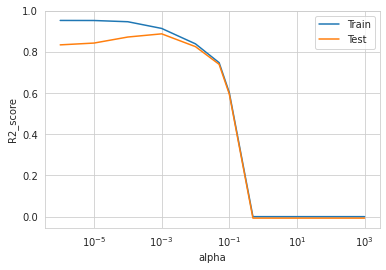

In [104]:
LassoSearchCV['param_alpha'] = LassoSearchCV['param_alpha'].astype('float32')

plt.plot(LassoSearchCV['param_alpha'], LassoSearchCV['mean_train_score'], label='Train')
plt.plot(LassoSearchCV['param_alpha'], LassoSearchCV['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

From the graph it it evident that the Re2 sqaure error stated decreasing at 10^-3.

In [105]:
LassoSearch.best_estimator_

Lasso(alpha=0.001)

In [106]:
alpha = 0.001
Lass =Lasso(alpha =0.001)
Lass.fit(X_train,y_train)
y_pred_test = Lass.predict(X_test)
y_pred_train = Lass.predict(X_train)


In [107]:
'''alpha = 0.001
Lass =Lasso(alpha =0.002)
Lass.fit(X_train,y_train)
y_pred_test = Lass.predict(X_test)
y_pred_train = Lass.predict(X_train)'''


'alpha = 0.001\nLass =Lasso(alpha =0.002)\nLass.fit(X_train,y_train)\ny_pred_test = Lass.predict(X_test)\ny_pred_train = Lass.predict(X_train)'

referred from: https://intellipaat.com/community/16404/how-to-find-the-features-names-of-the-coefficients-using-scikit-linear-regression

In [108]:
coef_dict = {}

for coef, feat in zip(Lass.coef_,Column):

    coef_dict[feat] = coef

print(sorted(coef_dict.items(), key=lambda kv:(kv[1], kv[0])))

[('OverallCond_Fair', -0.1435159820789363), ('OverallQual_Fair', -0.0956376196999198), ('MSSubClass_1-STORY 1945 & OLDER', -0.06565194508571448), ('OverallCond_Below Average', -0.06505910727854658), ('BsmtCond_Fair', -0.043965445578357486), ('OverallQual_Below Average', -0.0419888172473351), ('Neighborhood_Edwards', -0.0407348913111533), ('MSSubClass_2-STORY PUD - 1946 & NEWER', -0.03913258349020938), ('GarageType_No Garage', -0.037908933773313634), ('Neighborhood_MeadowV', -0.03473573637185293), ('OverallCond_Average', -0.0335414977093895), ('Fence_Good Wood', -0.028978854539151517), ('KitchenAbvGr', -0.024509082239380902), ('MSZoning_Residential Medium Density', -0.02324696581002717), ('KitchenQual_TA', -0.021000894777522486), ('BsmtQual_Typical', -0.01989556909289661), ('ExterQual_Typical', -0.017660909869989472), ('BsmtExposure_No Exposure', -0.015395991586789498), ('KitchenQual_Gd', -0.013497805944339058), ('OverallQual_Average', -0.013348212639849156), ('RoofStyle_Gable', -0.0087

In [109]:
Lass.coef_

array([ 3.56507482e-03,  2.41126297e-02,  3.72667552e-02,  3.37596525e-02,
        0.00000000e+00,  6.70865690e-02,  1.42041997e-02,  4.12896298e-02,
        9.34765978e-02,  9.20909194e-02,  1.12154178e-02, -0.00000000e+00,
        2.05214267e-02,  1.62996557e-02, -0.00000000e+00, -2.45090822e-02,
        1.76966961e-02,  2.01804366e-02, -5.06477324e-05,  3.64104235e-02,
        1.16957688e-02,  6.68499142e-03,  4.19611593e-03,  1.27573013e-02,
       -0.00000000e+00, -2.64438046e-03, -0.00000000e+00, -6.56519451e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.58751862e-02, -1.54016854e-05, -3.91325835e-02,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -2.32469658e-02,
        0.00000000e+00, -0.00000000e+00,  7.85144953e-03,  1.02275758e-02,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  1.78964151e-02,
        0.00000000e+00,  

In [110]:
ls =[]
for i in list(Lass.coef_):
  if i !=0:
    ls.append(i)
print("The number of features used by Lasso:", len(ls))

The number of features used by Lasso: 87


In [111]:
#Lass.score(X_train,y_train)
print("Lasso training R2 score :", Lass.score(X_train,y_train))
print("Lasso testing R2 score:", Lass.score(X_test,y_test))


Lasso training R2 score : 0.9112291479456479
Lasso testing R2 score: 0.8892070241832615


In [112]:
rss =np.sum(np.square(y_train-y_pred_train))
print("The RSS value of Taining data:", rss)
mse = mean_squared_error(y_train,y_pred_train)
print("The MSE value of Taining data:",mse)
rmse = mse**0.5
print("The RMSE value of Taining data:",rmse)

The RSS value of Taining data: 15.806098104951376
The MSE value of Taining data: 0.013532618240540561
The RMSE value of Taining data: 0.1163297822594909


In [113]:
Adj_r2 = 1-(1-Lass.score(X_train,y_train))*(len(y_train)-1)/(len(y_train)-100-1)
Adj_r2

0.9029094804616411

In [114]:
rss =np.sum(np.square(y_test-y_pred_test))
print("The RSS value of Test data:",rss)
mse = mean_squared_error(y_test,y_pred_test)
print("The mse value of Test data:",mse)
rmse = mse**0.5
print("The RMSE value of Test data:",rmse)

The RSS value of Test data: 6.037236368180126
The mse value of Test data: 0.020675467014315503
The RMSE value of Test data: 0.1437896624042059


In [115]:
Adj_r2 = 1-(1-Lass.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-100-1)
Adj_r2

0.8312002305619324

### Ridge Ligression

In [116]:
params = {'alpha': [0.000001,0.00001,0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 0.6, 0.7, 1.0,
                    2.0, 7.0, 10.0, 100, 500, 1000]}
ridgeRegg = Ridge()
RidgeSearch = GridSearchCV(ridgeRegg, params, scoring= 'r2',return_train_score=True)
RidgeSearch.fit(X_train,y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1,
                                   0.5, 0.6, 0.7, 1.0, 2.0, 7.0, 10.0, 100, 500,
                                   1000]},
             return_train_score=True, scoring='r2')

In [117]:
RidgeSearch.cv_results_


{'mean_fit_time': array([0.02335081, 0.01985164, 0.01998472, 0.02077298, 0.02277122,
        0.02007914, 0.02226567, 0.02359371, 0.02415862, 0.02114229,
        0.02344337, 0.02177973, 0.02150941, 0.02099233, 0.02151179,
        0.02134342, 0.02045846]),
 'std_fit_time': array([0.00427654, 0.00065341, 0.0005034 , 0.00267518, 0.00447219,
        0.00080833, 0.00471861, 0.00348522, 0.00851761, 0.00155884,
        0.00352355, 0.00140262, 0.00146006, 0.00271268, 0.00365449,
        0.00471495, 0.00111269]),
 'mean_score_time': array([0.00721364, 0.00713596, 0.00769272, 0.00765195, 0.00747576,
        0.00792761, 0.00729094, 0.00754113, 0.00711756, 0.00755248,
        0.00755963, 0.00841479, 0.00755744, 0.00829773, 0.0070766 ,
        0.00774608, 0.00749946]),
 'std_score_time': array([0.00060618, 0.00055813, 0.0009388 , 0.00122694, 0.00083986,
        0.00146589, 0.00072285, 0.00079094, 0.00039531, 0.00082432,
        0.00109793, 0.0022971 , 0.00097285, 0.00118461, 0.0006988 ,
        0.00

In [118]:
RidgeSearchCV = pd.DataFrame(RidgeSearch.cv_results_)
RidgeSearchCV

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.023351,0.004277,0.007214,0.000606,0.000001,{'alpha': 1e-06},0.851290,0.775912,0.853579,0.806074,...,0.825325,0.029978,16,0.952140,0.956592,0.949778,0.956476,0.950732,0.953144,0.002869
1,0.019852,0.000653,0.007136,0.000558,0.00001,{'alpha': 1e-05},0.851308,0.775925,0.853585,0.806101,...,0.825340,0.029975,15,0.952140,0.956592,0.949778,0.956476,0.950732,0.953144,0.002869
2,0.019985,0.000503,0.007693,0.000939,0.0001,{'alpha': 0.0001},0.851486,0.776052,0.853644,0.806362,...,0.825484,0.029951,14,0.952140,0.956592,0.949778,0.956476,0.950732,0.953144,0.002869
3,0.020773,0.002675,0.007652,0.001227,0.001,{'alpha': 0.001},0.853143,0.777298,0.854198,0.808784,...,0.826849,0.029720,13,0.952139,0.956591,0.949777,0.956473,0.950731,0.953142,0.002868
4,0.022771,0.004472,0.007476,0.000840,0.01,{'alpha': 0.01},0.862845,0.787942,0.857810,0.822313,...,0.835977,0.027790,12,0.952041,0.956526,0.949723,0.956320,0.950665,0.953055,0.002848
5,0.020079,0.000808,0.007928,0.001466,0.05,{'alpha': 0.05},0.874331,0.813746,0.862651,0.836885,...,0.851428,0.022845,10,0.951111,0.955695,0.949402,0.955151,0.949932,0.952258,0.002648
6,0.022266,0.004719,0.007291,0.000723,0.1,{'alpha': 0.1},0.879056,0.827376,0.864255,0.844219,...,0.859177,0.020646,9,0.949950,0.954502,0.949073,0.953796,0.948931,0.951251,0.002403
7,0.023594,0.003485,0.007541,0.000791,0.5,{'alpha': 0.5},0.889180,0.848734,0.866127,0.869629,...,0.874541,0.017750,7,0.944942,0.949401,0.947265,0.948101,0.944224,0.946787,0.001937
8,0.024159,0.008518,0.007118,0.000395,0.6,{'alpha': 0.6},0.890141,0.850287,0.866333,0.872725,...,0.875941,0.017617,6,0.944198,0.948705,0.946915,0.947238,0.943501,0.946111,0.001955
9,0.021142,0.001559,0.007552,0.000824,0.7,{'alpha': 0.7},0.890921,0.851526,0.866532,0.875267,...,0.877074,0.017535,5,0.943547,0.948104,0.946588,0.946474,0.942863,0.945515,0.001984


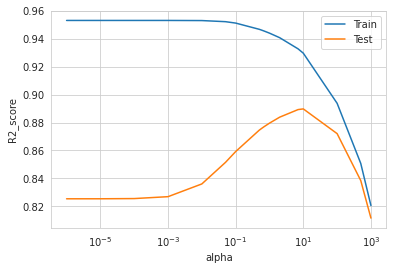

In [119]:
RidgeSearchCV['param_alpha'] = RidgeSearchCV['param_alpha'].astype('float32')

plt.plot(RidgeSearchCV['param_alpha'], RidgeSearchCV['mean_train_score'], label='Train')
plt.plot(RidgeSearchCV['param_alpha'], RidgeSearchCV['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

From the graph, the R2 error for both train and test data started decreasing at 10. Therefore, 10 is the best Lamba.

In [120]:
RidgeSearch.best_estimator_

Ridge(alpha=10.0)

Selecting the 100 features from columns using RFE

In [121]:
#https://machinelearningmastery.com/rfe-feature-selection-in-python/

lm =Ridge(alpha = 10) 
lm.fit(X_train,y_train)
rfe =  RFE(estimator=lm, n_features_to_select=100)           
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 116),
 ('LotArea', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', True, 1),
 ('MasVnrArea', False, 150),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('BsmtFullBath', False, 55),
 ('BsmtHalfBath', False, 147),
 ('FullBath', False, 8),
 ('HalfBath', False, 9),
 ('BedroomAbvGr', False, 127),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 21),
 ('Fireplaces', False, 86),
 ('GarageYrBlt', False, 165),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 81),
 ('OpenPorchSF', False, 99),
 ('EnclosedPorch', False, 120),
 ('ScreenPorch', False, 75),
 ('MoSold', False, 160),
 ('YrSold', False, 132),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', False, 125),
 ('MSSubClass_1-STORY 1945 & OLDER', True, 1),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', False, 30),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
  False,
  20),
 ('MSSubClass_1-STORY W/FINISHED ATT

In [122]:
Col_supported = X_train.columns[rfe.support_]
Col_supported

Index(['LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'KitchenAbvGr', 'GarageArea',
       'MSSubClass_1-STORY 1945 & OLDER', 'MSSubClass_2-1/2 STORY ALL AGES',
       'MSSubClass_2-STORY 1945 & OLDER',
       'MSSubClass_2-STORY PUD - 1946 & NEWER',
       'MSZoning_Floating Village Residential',
       'MSZoning_Residential High Density', 'MSZoning_Residential Low Density',
       'Alley_Paved', 'LotShape_Moderately Irregular', 'LandContour_Hillside',
       'LandContour_Near Flat/Level', 'LotConfig_Cul-de-sac',
       'LotConfig_Frontage on 2 sidest', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'Condition1_Norm', 'Condition1_RRAe',
       'Condition1_RRAn', 'Condition2_Norm',

In [123]:
#Creating a dataframe with selected 15 features for further building the model.
X_train_rfe_col = X_train[Col_supported]
X_test_rfe_col = X_test[Col_supported]


In [124]:
'''alpha = 10.0
ridgeRegg =Ridge(alpha =10.0)
ridgeRegg.fit(X_train_rfe_col,y_train)
y_pred_test = ridgeRegg.predict(X_test_rfe_col)
y_pred_train = ridgeRegg.predict(X_train_rfe_col)'''


'alpha = 10.0\nridgeRegg =Ridge(alpha =10.0)\nridgeRegg.fit(X_train_rfe_col,y_train)\ny_pred_test = ridgeRegg.predict(X_test_rfe_col)\ny_pred_train = ridgeRegg.predict(X_train_rfe_col)'

In [125]:
alpha = 10.0
ridgeRegg =Ridge(alpha =20.0)
ridgeRegg.fit(X_train_rfe_col,y_train)
y_pred_test = ridgeRegg.predict(X_test_rfe_col)
y_pred_train = ridgeRegg.predict(X_train_rfe_col)


In [126]:
coef_dict = {}

for coef, feat in zip(ridgeRegg.coef_,Column):

    coef_dict[feat] = coef

print(sorted(coef_dict.items(), key=lambda kv:(kv[1], kv[0])))

[('LandContour_Hillside', -0.08760916134120515), ('BsmtFullBath', -0.059918789423205276), ('MSZoning_Residential Medium Density', -0.05743888317367364), ('Neighborhood_Gilbert', -0.05616623919147914), ('Neighborhood_Sawyer', -0.05477362869494825), ('LotShape_Slightly irregular', -0.054617939498529514), ('MSSubClass_1-STORY 1945 & OLDER', -0.051255655475747064), ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.049419674910124174), ('HalfBath', -0.04864153044432418), ('Condition1_Feedr', -0.04719263643002253), ('Neighborhood_Edwards', -0.04716906933290225), ('Neighborhood_SWISU', -0.04311853939309612), ('Condition2_Norm', -0.04081674513969606), ('LotShape_Moderately Irregular', -0.0378856737329534), ('MSZoning_Residential High Density', -0.03726351125706219), ('Condition2_PosN', -0.034551481648862785), ('MSSubClass_SPLIT FOYER', -0.0338496436428145), ('Neighborhood_CollgCr', -0.03331036672325913), ('Condition1_Norm', -0.03319606626731573), ('Neighborhood_NWAmes', -0.033078062346785744), (

In [127]:
ridgeRegg.coef_

array([ 0.02989317,  0.0531682 ,  0.03302372,  0.07812818,  0.02058282,
        0.04544556,  0.10834318,  0.12357795, -0.0214096 ,  0.03564645,
       -0.05991879,  0.03061552,  0.03619062, -0.04864153,  0.04381226,
        0.0263248 ,  0.03106941,  0.02599345,  0.02601958,  0.0460787 ,
        0.0159926 ,  0.02349447, -0.01674265,  0.02995399,  0.02922069,
        0.06888471, -0.04941967, -0.05125566, -0.02969464,  0.04143201,
        0.05664304,  0.04214379,  0.07029478,  0.02519386,  0.04365245,
       -0.03302428,  0.01587164,  0.02814442, -0.03384964, -0.02563808,
        0.02208922, -0.03726351,  0.09649426, -0.05743888,  0.02446434,
        0.04688386,  0.07044392, -0.03788567, -0.03019678, -0.05461794,
        0.06063637, -0.08760916,  0.03635521,  0.03485514,  0.01820411,
        0.03658019, -0.0167796 ,  0.07873307,  0.01790754, -0.02444605,
       -0.02543813,  0.03710501, -0.01611384, -0.03331037, -0.01838153,
       -0.04716907, -0.05616624,  0.0430674 , -0.02272903, -0.01

In [128]:
#Lass.score(X_train,y_train)
print("Ridge training R2 score :", ridgeRegg.score(X_train_rfe_col,y_train))
print("Ridge testing R2 score:", ridgeRegg.score(X_test_rfe_col,y_test))


Ridge training R2 score : 0.9133219009720528
Ridge testing R2 score: 0.8875286145660839


In [129]:
r2score = r2_score(y_train,y_pred_train)
rss =np.sum(np.square(y_train-y_pred_train))
print("The RSS value of Taining data:", rss)
mse = mean_squared_error(y_train,y_pred_train)
print("The MSE value of Taining data:",mse)
rmse = mse**0.5
print("The RMSE value of Taining data:",rmse)

The RSS value of Taining data: 15.433472869535866
The MSE value of Taining data: 0.013213589785561529
The RMSE value of Taining data: 0.11495037966688726


In [130]:
Adj_r2 = 1-(1-r2score)*(len(y_train)-1)/(len(y_train)-100-1)
Adj_r2

0.9051983677923015

In [131]:
r2score = r2_score(y_test,y_pred_test)
#print(r2score)
rss =np.sum(np.square(y_test-y_pred_test))
print("The RSS value of Test data:",rss)
mse = mean_squared_error(y_test,y_pred_test)
print("The mse value of Test data:",mse)
rmse = mse**0.5
print("The RMSE value of Test data:",rmse)

The RSS value of Test data: 6.128694833907129
The mse value of Test data: 0.020988680938038115
The RMSE value of Test data: 0.14487470772373665


In [132]:
Adj_r2 = 1-(1-r2score)*(len(y_test)-1)/(len(y_test)-100-1)
Adj_r2

0.828643072454086

## Conclusion

### Top 5 significant features as per Lasso Regression:
* ('OverallQual_Excellent', 0.1428)
* ('Functional_Typical Functionality', 0.0958)
* ('Exterior1st_BrkFace', 0.0946)
* ('1stFlrSF', 0.0935)
* ('2ndFlrSF', 0.0921)

#### Metrices for Training data for Lasso Regression:
* Lasso testing R2 score: 0.889
* The RSS value of Test data: 6.037
* The mse value of Test data: 0.021
* The RMSE value of Test data: 0.144
* Adjusted R square: 0.831

#### Metrices for Testing data for Lasso Regression:
* Lasso training R2 score : 0.911
* The RSS value of Taining data: 15.806
* The MSE value of Taining data: 0.014
* The RMSE value of Taining data: 0.116
* Adjusted R Square: 0.903

### Top 5 significant features as per Ridge Regression:
* ('BsmtUnfSF', 0.123) 
* ('MSZoning_Residential Low Density', 0.1184) 
* ('BsmtFinSF2', 0.1072)
* ('MSSubClass_2-1/2 STORY ALL AGES', 0.0932)
* ('LandSlope_Moderate', 0.0922)

#### Metrices for Training data for Ridge Regression:
* Ridge training R2 score : 0.916
* The RSS value of Taining data: 14.937
* The MSE value of Taining data: 0.0128
* The RMSE value of Taining data: 0.113
*  Adjusted R square: 0.908


#### Metrices for Testing data for Ridge Regression:
* Ridge testing R2 score: 0.891
* The RSS value of Test data: 5.945
* The mse value of Test data: 0.020
* The RMSE value of Test data: 0.143
* Adjusted R square: 0.872

Both Lasso and Ridge regression worked well for this model but I will choose Ridge Regression as it works well with multicollinearity of data and use RFE to select the features.